In [1]:
# to auto reload the modified module
% load_ext autoreload
% autoreload 2

In [2]:
import tensorflow as tf
import numpy as np
import random
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import gc

from utils import *
from data import MnistTF
from nn_kd import *
from layers import *
# from models import *

/home/deep3072/anaconda2/envs/tu36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
Using TensorFlow backend.


In [3]:
# check_available_device()
# seed settings
set_rand_seed(0)
gpu_id = '1'

In [4]:
# read Mnist data
try_cls2 = True
if try_cls2:
    mnist = MnistTF()
    X_train, y_train = mnist.get_train_data()
    X_val, y_val = mnist.get_validation_data()
    X_test, y_test = mnist.get_test_data()
    print_obj(X_train, 'X_train')
    print_obj(y_train, 'y_train')
    print_obj(X_val, 'X_val')
    print_obj(y_val, 'y_val')
    print_obj(X_test, 'X_test')
    print_obj(y_test, 'y_test')
    input_dims = X_train.shape[1]
    output_dims = y_train.shape[1]
    print_obj(input_dims, 'input_dims')
    print_obj(output_dims, 'output_dims')


Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
X_train <class 'numpy.ndarray'> (55000, 784)
y_train <class 'numpy.ndarray'> (55000, 10)
X_val <class 'numpy.ndarray'> (5000, 784)
y_val <class 'numpy.ndarray'> (5000, 10)
X_test <class 'numpy.ndarray'> (10000, 784)
y_test <class 'numpy.ndarray'> (10000, 10)
input_dims <class 'int'> 784
output_dims <class 'int'> 10


In [5]:
def build_big_model(input_dims, output_dims, gpu_id):#, session):
    # session settings
    session = create_session(gpu_id=gpu_id)
#     tf.reset_default_graph()
    bigmodel = SoftenedNN(
        input_dims=input_dims
        , output_dims=output_dims
        , session=session
        , dtype_X=tf.float32
        , dtype_y=tf.float32)

    bigmodel.add_layer(
        Dropout(inputs=bigmodel.h[-1], keep_prob=0.6))
    bigmodel.add_layer(
        FC(inputs=bigmodel.h[-1],out_dims=1200, activation_fn=tf.nn.relu))
    bigmodel.add_layer(
        Dropout(inputs=bigmodel.h[-1], keep_prob=0.5))
    bigmodel.add_layer(
        FC(inputs=bigmodel.h[-1],out_dims=1200, activation_fn=tf.nn.relu))
    bigmodel.add_layer(
        Dropout(inputs=bigmodel.h[-1], keep_prob=0.5))
    bigmodel.add_layer(
        FC(inputs=bigmodel.h[-1],out_dims=output_dims, activation_fn=tf.nn.softmax))

    bigmodel.compile_nn(
        loss=tf.losses.softmax_cross_entropy(bigmodel.ys,bigmodel.logits)
        , opt=tf.train.AdamOptimizer(learning_rate=1e-3)
        , metrics = ['acc'])

    return bigmodel

In [6]:
if try_cls2:
#     teacher = build_big_model(input_dims, output_dims, session)
    teacher = build_big_model(input_dims, output_dims, gpu_id)
    teacher.train(
        X=X_train
        ,y=y_train
        ,val_set=[X_val,y_val]
        ,batch_size=100
        ,n_epochs=100
        ,display_steps=100
        ,earlystop_params={'monitor':'val_acc', 'patience':10}
    )

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17778331712551737490
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7855056487
locality {
  bus_id: 1
}
incarnation: 8216175640911241722
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 17.648985 , acc = 0.29 
Epoch 1 , step 100 , loss= 1.5099895 , acc = 0.9 
Epoch 1 , step 200 , loss= 0.8691318 , acc = 0.93 
Epoch 1 , step 300 , loss= 0.6633571 , acc = 0.94 
Epoch 1 , step 400 , loss= 0.85643315 , acc = 0.93 
Epoch 1 , step 500 , loss= 0.6056333 , acc = 0.97 
Epoch 1 , step 549 , loss= 0.5355988 val_loss= 0.23150666 , acc = 0.89 val acc = 0.941 
Epoch 1 finished, loss= 1.3927087 val loss= 0.23150666 ,  acc = 0.8986 val acc = 0.941
val_acc improved. 
Epoch 2 , step 50 , loss= 0.53346246 , acc = 0.96 
Epoch 2 , step 150 , loss= 0.48905316 , acc = 0.95 
Epoch 2 , step 250 , loss= 0.51038694 , acc = 

Epoch 17 , step 400 , loss= 0.057627063 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.23357779 , acc = 0.97 
Epoch 17 , step 549 , loss= 0.17952536 val_loss= 0.061499976 , acc = 0.97 val acc = 0.981 
Epoch 17 finished, loss= 0.1431923 val loss= 0.061499976 ,  acc = 0.98792726 val acc = 0.981

Epoch 18 , step 50 , loss= 0.17408076 , acc = 0.99 
Epoch 18 , step 150 , loss= 0.108120985 , acc = 0.99 
Epoch 18 , step 250 , loss= 0.15572466 , acc = 0.99 
Epoch 18 , step 350 , loss= 0.12400734 , acc = 0.99 
Epoch 18 , step 450 , loss= 0.12150839 , acc = 0.99 
Epoch 18 , step 549 , loss= 0.17580752 val_loss= 0.066666014 , acc = 0.99 val acc = 0.98 
Epoch 18 finished, loss= 0.14410272 val loss= 0.066666014 ,  acc = 0.9882727 val acc = 0.98

Epoch 19 , step 0 , loss= 0.41471726 , acc = 0.96 
Epoch 19 , step 100 , loss= 0.1081949 , acc = 1.0 
Epoch 19 , step 200 , loss= 0.10120594 , acc = 0.97 
Epoch 19 , step 300 , loss= 0.1295909 , acc = 0.99 
Epoch 19 , step 400 , loss= 0.018737603 , acc = 0.99 


Epoch 34 , step 549 , loss= 0.22226465 val_loss= 0.062208813 , acc = 0.99 val acc = 0.9838 
Epoch 34 finished, loss= 0.110416576 val loss= 0.062208813 ,  acc = 0.99372727 val acc = 0.9838

Epoch 35 , step 0 , loss= 0.022164535 , acc = 1.0 
Epoch 35 , step 100 , loss= 0.28387475 , acc = 0.98 
Epoch 35 , step 200 , loss= 0.19521958 , acc = 0.97 
Epoch 35 , step 300 , loss= 0.10163303 , acc = 1.0 
Epoch 35 , step 400 , loss= 0.1741704 , acc = 0.98 
Epoch 35 , step 500 , loss= 0.11316429 , acc = 0.99 
Epoch 35 , step 549 , loss= 0.114557914 val_loss= 0.055120338 , acc = 0.99 val acc = 0.9852 
Epoch 35 finished, loss= 0.11007897 val loss= 0.055120338 ,  acc = 0.99412733 val acc = 0.9852

Epoch 36 , step 50 , loss= 0.023536526 , acc = 0.99 
Epoch 36 , step 150 , loss= 0.12240841 , acc = 0.99 
Epoch 36 , step 250 , loss= 0.18798561 , acc = 0.98 
Epoch 36 , step 350 , loss= 0.17276257 , acc = 1.0 
Epoch 36 , step 450 , loss= 0.04214072 , acc = 1.0 
Epoch 36 , step 549 , loss= 0.08789601 val_lo

Plotting loss...


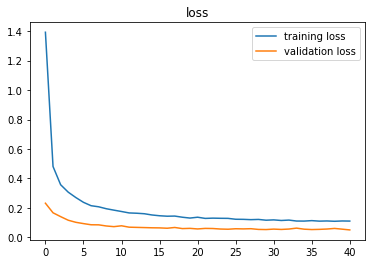

Plotting metrics...


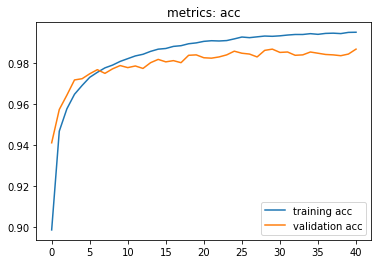

train {'acc': 0.9953455}
test {'acc': 0.9845}


In [7]:
if try_cls2:
#     gc.collect()
    teacher.plt_loss()
    teacher.plt_metrics()
    train_metric = teacher.get_metrics(X_train, y_train)
    test_metric = teacher.get_metrics(X_test, y_test)
    print('train',train_metric)
    print('test',test_metric)

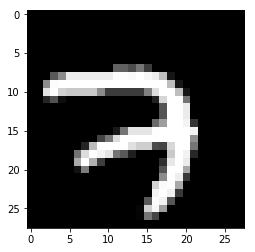

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[3.0016785e-12 4.9326165e-09 4.0590938e-05 5.7046730e-03 9.5024518e-08
 3.5660421e-09 6.6049295e-16 9.9423683e-01 3.2208640e-09 1.7754459e-05]


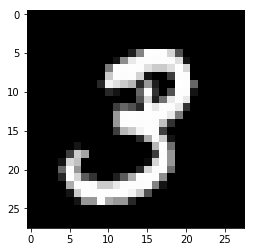

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[4.5047340e-13 5.5985577e-10 2.4311200e-08 9.9997425e-01 7.4835225e-12
 6.2700700e-08 9.3778439e-17 2.8307476e-09 1.2716445e-05 1.2946433e-05]


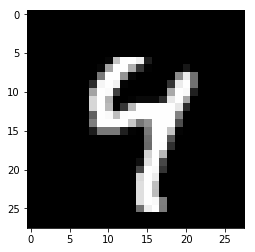

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[3.0605383e-06 2.3834078e-05 1.8114535e-05 3.1212552e-05 7.5771934e-01
 1.1144456e-04 6.7920280e-07 1.9229621e-02 3.8714963e-04 2.2247554e-01]


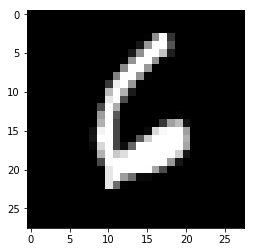

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[3.7569478e-10 2.1215451e-13 1.2178729e-10 1.4403768e-10 3.7885343e-08
 4.0287837e-06 9.9999595e-01 2.1956417e-18 3.3603055e-08 2.3499530e-10]


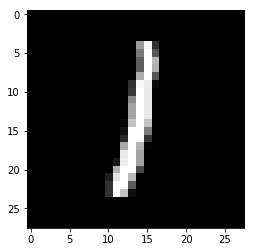

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[3.4126494e-16 1.0000000e+00 2.3737978e-10 2.9296949e-14 2.9751218e-10
 2.1833189e-14 2.6826191e-11 3.6043976e-10 3.4603125e-09 3.0124123e-15]


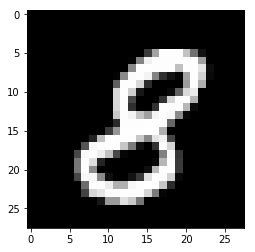

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[5.3443029e-05 3.1071545e-06 1.1399188e-04 4.4822809e-04 2.5387865e-07
 2.1490749e-05 1.0387773e-06 1.1538866e-07 9.9935323e-01 5.1540969e-06]


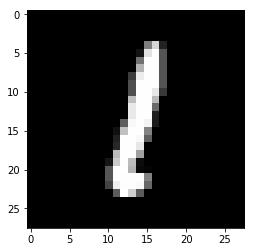

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[4.4609525e-13 1.0000000e+00 1.1507395e-09 1.2480848e-13 3.2596451e-10
 4.0333161e-14 4.2483067e-10 4.5580432e-11 4.7417114e-08 6.7812550e-14]


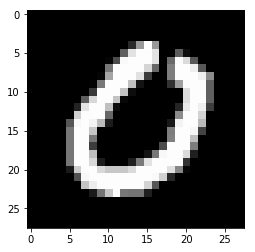

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1.0000000e+00 1.0341392e-30 1.7049113e-13 2.1448724e-16 2.9092984e-17
 1.0953521e-15 1.0323536e-15 8.1754874e-20 1.3888271e-17 3.0184142e-13]


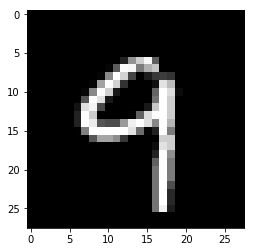

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[3.8888158e-13 9.2289281e-14 2.6691104e-12 9.7247250e-09 1.1656807e-05
 3.8502804e-10 4.7468106e-19 4.6651976e-06 3.1558254e-09 9.9998367e-01]


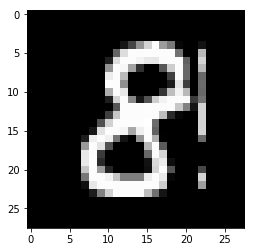

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[1.9765046e-06 9.3651451e-08 1.2157681e-05 1.9547767e-04 2.9456711e-08
 2.3398534e-06 2.6058117e-07 2.3529526e-10 9.9978584e-01 1.8212894e-06]


In [8]:
if try_cls2:
    n_samples = 10
    t = 5
    X_show, y_show = X_train.copy(), y_train.copy()
    model = teacher
    
    y_pred = model.predict(X_show)
    y_pred_soft = model.predict_softened(X_show, t)
    
    plot_mnist(X_show, y_show, y_pred, n_samples)
    
    X_show, y_show = None, None
#     gc.collect()

## Small Model and Student Model

In [9]:

def build_small_model(input_dims, output_dims, is_student, gpu_id):#, session):
    # session settings
    session = create_session(gpu_id=gpu_id)
#     tf.reset_default_graph()
    smallmodel = StudentNN(
        input_dims=input_dims
        , output_dims=output_dims
        , session=session
        , dtype_X=tf.float32
        , dtype_y=tf.float32)

    smallmodel.add_layer(
        FC(inputs=smallmodel.h[-1],out_dims=800,activation_fn=tf.nn.relu))
    smallmodel.add_layer(
        FC(inputs=smallmodel.h[-1],out_dims=800,activation_fn=tf.nn.relu))
    smallmodel.add_layer(
        FC(inputs=smallmodel.h[-1],out_dims=output_dims, activation_fn=tf.nn.softmax))

    if is_student:
        smallmodel.compile_student(
            loss_standard=tf.losses.softmax_cross_entropy(smallmodel.ys,smallmodel.logits)
            , opt=tf.train.AdamOptimizer(learning_rate=1e-3) #TODO: learning rate
            , metrics = ['acc']
        )
    else:
        smallmodel.compile_nn(
            loss=tf.losses.softmax_cross_entropy(smallmodel.ys,smallmodel.logits)
            , opt=tf.train.AdamOptimizer(learning_rate=1e-3)
            , metrics = ['acc']
        )
    return smallmodel

### Training Small Model without Teacher

In [10]:
train_small = True
# gc.collect()
if try_cls2 and train_small:
#     small = build_small_model(input_dims, output_dims, session, is_student=False)
    small = build_small_model(input_dims, output_dims, is_student=False, gpu_id=gpu_id)
    small.train(
        X=X_train
        ,y=y_train
        ,val_set=[X_val,y_val]
        ,batch_size=100
        ,n_epochs=50
        ,display_steps=100
        ,earlystop_params={'monitor':'val_acc', 'patience':10}
    )

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3543202449068617191
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 4615942986162126617
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 5.9027224 , acc = 0.26 
Epoch 1 , step 100 , loss= 0.24611278 , acc = 0.95 
Epoch 1 , step 200 , loss= 0.17023817 , acc = 0.96 
Epoch 1 , step 300 , loss= 0.08987652 , acc = 0.98 
Epoch 1 , step 400 , loss= 0.17790136 , acc = 0.96 
Epoch 1 , step 500 , loss= 0.14147396 , acc = 0.97 
Epoch 1 , step 549 , loss= 0.16568996 val_loss= 0.10269974 , acc = 0.96 val acc = 0.9684 
Epoch 1 finished, loss= 0.22937056 val loss= 0.10269974 ,  acc = 0.9496183 val acc = 0.9684
val_acc improved. 
Epoch 2 , step 50 , loss= 0.1717996 , acc = 0.96 
Epoch 2 , step 150 , loss= 0.031402543 , acc = 1.0 
Epoch 2 , step 250 , loss= 0.0498666

Epoch 17 , step 300 , loss= 0.035525404 , acc = 1.0 
Epoch 17 , step 400 , loss= 0.044971272 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.09232481 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.0015594399 val_loss= 0.11015115 , acc = 1.0 val acc = 0.9796 
Epoch 17 finished, loss= 0.011557087 val loss= 0.11015115 ,  acc = 0.99963623 val acc = 0.9796

Epoch 18 , step 50 , loss= 0.017198421 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.000414955 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.00077624904 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.0031225288 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.016468782 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.035154257 val_loss= 0.12045411 , acc = 1.0 val acc = 0.981 
Epoch 18 finished, loss= 0.010749292 val loss= 0.12045411 ,  acc = 0.9996544 val acc = 0.981

Epoch 19 , step 0 , loss= 0.00014032886 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.0011968602 , acc = 1.0 
Epoch 19 , step 200 , loss= 1.8600444e-05 , acc = 1.0 
Epoch 19 , step 300 , loss= 0.03421837 , 

Epoch 34 , step 250 , loss= 0.00012005627 , acc = 1.0 
Epoch 34 , step 350 , loss= 9.782986e-06 , acc = 1.0 
Epoch 34 , step 450 , loss= 6.8128516e-06 , acc = 1.0 
Epoch 34 , step 549 , loss= 2.3010818e-05 val_loss= 0.1452075 , acc = 1.0 val acc = 0.983 
Epoch 34 finished, loss= 0.005612862 val loss= 0.1452075 ,  acc = 0.9998908 val acc = 0.983

Epoch 35 , step 0 , loss= 5.455917e-06 , acc = 1.0 
Epoch 35 , step 100 , loss= 8.6067956e-07 , acc = 1.0 
Epoch 35 , step 200 , loss= 5.876876e-07 , acc = 1.0 
Epoch 35 , step 300 , loss= 7.405158e-06 , acc = 1.0 
Epoch 35 , step 400 , loss= 0.06356476 , acc = 1.0 
Epoch 35 , step 500 , loss= 3.1887546e-06 , acc = 1.0 
Epoch 35 , step 549 , loss= 4.3272559e-07 val_loss= 0.13619232 , acc = 1.0 val acc = 0.9844 
Epoch 35 finished, loss= 0.005505436 val loss= 0.13619232 ,  acc = 0.9998909 val acc = 0.9844

Epoch 36 , step 50 , loss= 1.2112203e-05 , acc = 1.0 
Epoch 36 , step 150 , loss= 0.00023938941 , acc = 1.0 
Epoch 36 , step 250 , loss= 0.000

Small model
Plotting loss...


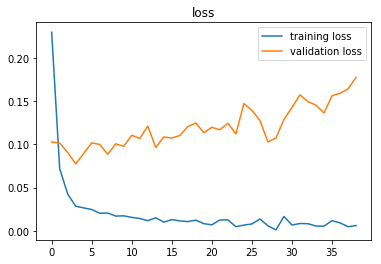

Plotting metrics...


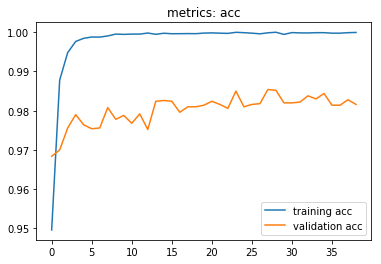

train {'acc': 0.9960909}
test {'acc': 0.9798}


In [11]:
if try_cls2 and train_small:
    print('Small model')
    small.plt_loss()
    small.plt_metrics()
    train_metric = small.get_metrics(X_train, y_train)
    test_metric = small.get_metrics(X_test, y_test)
    print('train',train_metric)
    print('test',test_metric)

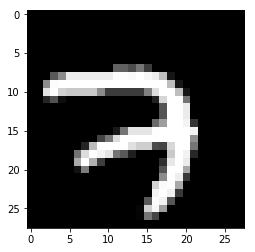

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[6.2552275e-27 1.2493039e-32 2.4531089e-11 1.2109590e-10 7.2826548e-32
 4.3271797e-23 0.0000000e+00 1.0000000e+00 8.6723602e-30 1.5203564e-16]


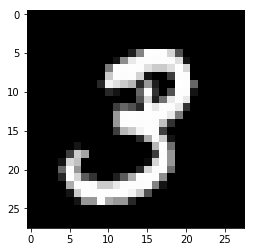

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[2.9271186e-26 3.6841056e-22 1.1475367e-25 1.0000000e+00 4.6469477e-27
 9.0605228e-21 3.1372769e-32 3.7529864e-22 4.7948004e-14 8.1990770e-14]


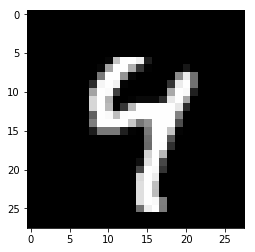

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[1.6359520e-24 2.9941473e-17 9.7824110e-23 1.4751340e-21 1.0000000e+00
 4.4480561e-20 1.0486081e-20 9.3598057e-13 2.2409064e-16 1.0034383e-09]


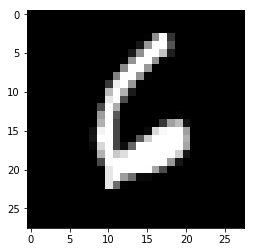

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[4.5086828e-21 4.4240079e-21 2.0132846e-16 7.2954433e-25 3.7338781e-23
 7.9310383e-18 1.0000000e+00 6.2099658e-25 2.9846142e-17 8.0464747e-18]


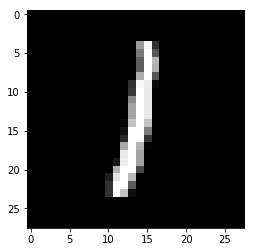

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1.0949577e-33 1.0000000e+00 2.1791763e-28 0.0000000e+00 2.6824285e-27
 1.4063719e-33 1.9123604e-30 6.8582250e-24 6.2011217e-22 1.5270831e-29]


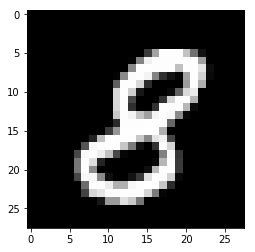

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[9.2783808e-24 2.2132793e-23 1.2720375e-22 5.7527605e-22 4.2954374e-31
 2.6948662e-37 3.4069635e-32 2.6517789e-31 1.0000000e+00 6.0301430e-25]


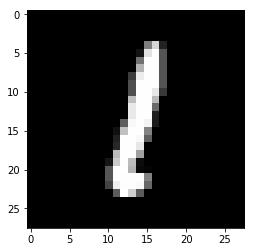

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1.7292262e-34 1.0000000e+00 2.4634404e-28 0.0000000e+00 6.9542265e-31
 6.2630538e-36 3.1941302e-32 2.7726003e-25 9.2484693e-20 6.5862394e-31]


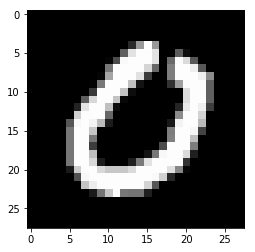

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1.0000000e+00 0.0000000e+00 1.0547634e-33 0.0000000e+00 7.8976955e-36
 0.0000000e+00 2.2625226e-34 0.0000000e+00 1.8215225e-33 5.3697879e-33]


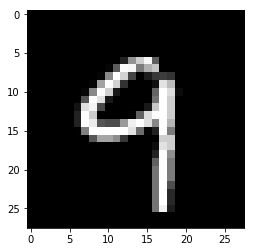

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[4.2353907e-19 2.4278475e-22 3.9807306e-16 1.8841426e-14 3.2315935e-08
 5.0289653e-17 4.2398621e-22 3.9399868e-12 8.3285787e-13 1.0000000e+00]


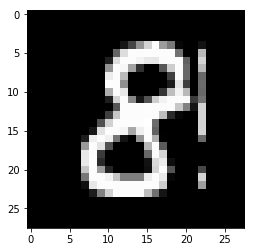

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[7.5773533e-18 1.5547609e-16 2.5152319e-19 7.7518947e-19 3.0684516e-24
 2.4877698e-26 4.3949516e-24 7.3752199e-25 1.0000000e+00 2.7486151e-22]


In [12]:
if try_cls2 and train_small:
    n_samples = 10
    t = 5
    X_show, y_show = X_train.copy(), y_train.copy()
    model = small
    
    y_pred = model.predict(X_show)
    y_pred_soft = model.predict_softened(X_show, t)
    
    plot_mnist(X_show, y_show, y_pred, n_samples)
    
    X_show, y_show = None, None
#     gc.collect()

## Experiments on Students

In [13]:
temperatures = [2,4,6,8,10,15,20]#[5,10,15,20,25,30]
coef_soft_losses = [0.0, 0.25, 0.5, 0.75, 1.0]#[1.0, 0.75, 0.5, 0.25, 0.0]

### Experiments on Students without Effect of $T^2$

Training student with temperature = 2 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9594556790749534595
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 16840705975267032665
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 3.6346002 , acc = 0.54 
Epoch 1 , step 100 , loss= 0.14688405 , acc = 0.97 
Epoch 1 , step 200 , loss= 0.10804593 , acc = 0.98 
Epoch 1 , step 300 , loss= 0.079801135 , acc = 0.99 
Epoch 1 , step 400 , loss= 0.1852094 , acc = 0.99 
Epoch 1 , step 500 , loss= 0.17742538 , acc = 0.96 
Epoch 1 , step 549 , loss= 0.11787424 val_loss= 0.08908347 , acc = 0.97 val acc = 0.9754 
Epoch 1 finished, loss= 0.21797344 val loss= 0.08908347 ,  acc = 0.9524182 val acc = 0.9754
val_acc improved. 
Epoch 2 , step 50 , loss= 0.02794648

Epoch 17 , step 100 , loss= 0.0004745976 , acc = 1.0 
Epoch 17 , step 200 , loss= 0.010961912 , acc = 1.0 
Epoch 17 , step 300 , loss= 0.008778558 , acc = 1.0 
Epoch 17 , step 400 , loss= 0.004289342 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.05174388 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.00014156794 val_loss= 0.12619655 , acc = 1.0 val acc = 0.9774 
Epoch 17 finished, loss= 0.011746868 val loss= 0.12619655 ,  acc = 0.9996181 val acc = 0.9774

Epoch 18 , step 50 , loss= 7.858612e-05 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.06866266 , acc = 0.99 
Epoch 18 , step 250 , loss= 0.0002747603 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.0004326798 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.0003095587 , acc = 1.0 
Epoch 18 , step 549 , loss= 3.0336854e-05 val_loss= 0.103357114 , acc = 1.0 val acc = 0.9824 
Epoch 18 finished, loss= 0.00929025 val loss= 0.103357114 ,  acc = 0.99969083 val acc = 0.9824

Epoch 19 , step 0 , loss= 0.08012837 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.01859678 

Epoch 34 , step 50 , loss= 2.7298047e-05 , acc = 1.0 
Epoch 34 , step 150 , loss= 0.0013433679 , acc = 1.0 
Epoch 34 , step 250 , loss= 5.065864e-06 , acc = 1.0 
Epoch 34 , step 350 , loss= 6.5245215e-05 , acc = 1.0 
Epoch 34 , step 450 , loss= 0.00088351866 , acc = 1.0 
Epoch 34 , step 549 , loss= 9.811325e-05 val_loss= 0.12312177 , acc = 1.0 val acc = 0.9856 
Epoch 34 finished, loss= 0.0051300023 val loss= 0.12312177 ,  acc = 0.9998726 val acc = 0.9856
val_acc improved. 
Epoch 35 , step 0 , loss= 0.00017054375 , acc = 1.0 
Epoch 35 , step 100 , loss= 5.777722e-05 , acc = 1.0 
Epoch 35 , step 200 , loss= 0.005567267 , acc = 1.0 
Epoch 35 , step 300 , loss= 0.006166377 , acc = 1.0 
Epoch 35 , step 400 , loss= 0.01121647 , acc = 1.0 
Epoch 35 , step 500 , loss= 0.010448691 , acc = 1.0 
Epoch 35 , step 549 , loss= 7.718814e-05 val_loss= 0.13799956 , acc = 1.0 val acc = 0.9842 
Epoch 35 finished, loss= 0.012337749 val loss= 0.13799956 ,  acc = 0.999709 val acc = 0.9842

Epoch 36 , step 50

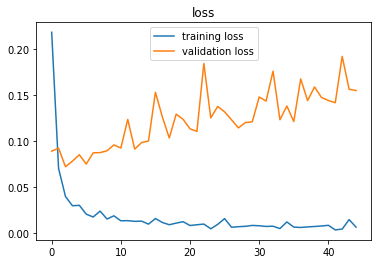

Plotting metrics...


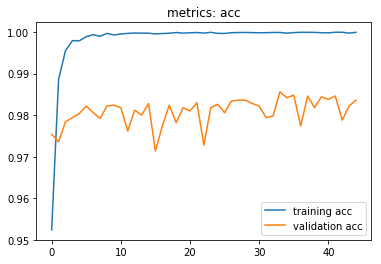

train {'acc': 0.9995091}
test {'acc': 0.9827}

Training student with temperature = 2 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17067210022681372118
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 6216267856752641032
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 5.451011 , acc = 0.26 
Epoch 1 , step 100 , loss= 0.2932913 , acc = 0.92 
Epoch 1 , step 200 , loss= 0.21949369 , acc = 0.98 
Epoch 1 , step 300 , loss= 0.11361916 , acc = 0.97 
Epoch 1 , step 400 , loss= 0.116741225 , acc = 0.97 
Epoch 1 , step 500 , loss= 0.1991053 , acc = 0.96 
Epoch 1 , step 549 , loss= 0.13734107 val_loss= 0.15184788 , acc = 0.97 val acc = 0.965 
Epoch 1 finished, loss= 0.28170255 val loss= 0.15184788 ,  acc = 0.9490727 val acc = 0.965
val_acc im

Epoch 17 , step 200 , loss= 0.046311088 , acc = 1.0 
Epoch 17 , step 300 , loss= 0.06302328 , acc = 1.0 
Epoch 17 , step 400 , loss= 0.049003877 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.05782244 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.06802076 val_loss= 0.087345906 , acc = 1.0 val acc = 0.9862 
Epoch 17 finished, loss= 0.05265516 val loss= 0.087345906 ,  acc = 0.9999636 val acc = 0.9862

Epoch 18 , step 50 , loss= 0.032849286 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.05902742 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.05511977 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.073173486 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.050274335 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.05577818 val_loss= 0.083795525 , acc = 1.0 val acc = 0.9866 
Epoch 18 finished, loss= 0.050417088 val loss= 0.083795525 ,  acc = 0.9999818 val acc = 0.9866

Epoch 19 , step 0 , loss= 0.04154938 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.037543457 , acc = 1.0 
Epoch 19 , step 200 , loss= 0.04518093 , acc = 1.0 


Epoch 34 , step 549 , loss= 0.056723595 val_loss= 0.08521292 , acc = 1.0 val acc = 0.9868 
Epoch 34 finished, loss= 0.051042974 val loss= 0.08521292 ,  acc = 0.9999818 val acc = 0.9868

Stop training, val_acc didn't improve more than 10 epoch. 
Student performance with {'coef_softloss': 0.25, 'coef_hardloss': 0.75, 'temperature': 2, 'temperature_effect': 1, 'train_acc': 0.9996727, 'test_acc': 0.986}
Plotting loss...


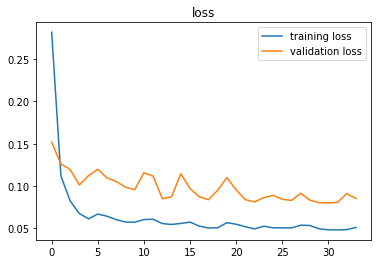

Plotting metrics...


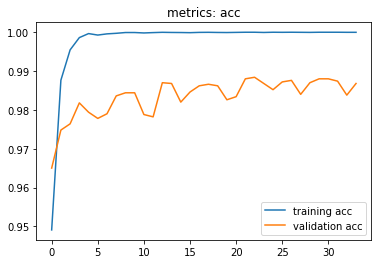

train {'acc': 0.9996727}
test {'acc': 0.986}

Training student with temperature = 2 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13060175554930352612
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 17468724230367642547
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 3.946644 , acc = 0.35 
Epoch 1 , step 100 , loss= 0.280577 , acc = 0.96 
Epoch 1 , step 200 , loss= 0.27955452 , acc = 0.95 
Epoch 1 , step 300 , loss= 0.14407855 , acc = 0.97 
Epoch 1 , step 400 , loss= 0.22838043 , acc = 0.97 
Epoch 1 , step 500 , loss= 0.13129917 , acc = 1.0 
Epoch 1 , step 549 , loss= 0.2320883 val_loss= 0.18117556 , acc = 0.96 val acc = 0.9682 
Epoch 1 finished, loss= 0.28696296 val loss= 0.18117556 ,  acc = 0.9526182 val acc = 0.9682
val_acc impro

Epoch 17 , step 200 , loss= 0.08470424 , acc = 1.0 
Epoch 17 , step 300 , loss= 0.16202343 , acc = 1.0 
Epoch 17 , step 400 , loss= 0.10710839 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.07440891 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.098435864 val_loss= 0.124482475 , acc = 1.0 val acc = 0.9828 
Epoch 17 finished, loss= 0.097472064 val loss= 0.124482475 ,  acc = 0.9999272 val acc = 0.9828

Epoch 18 , step 50 , loss= 0.122909494 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.07501716 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.13383111 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.064581975 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.09500782 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.104463704 val_loss= 0.122723415 , acc = 1.0 val acc = 0.9838 
Epoch 18 finished, loss= 0.09680731 val loss= 0.122723415 ,  acc = 0.9998908 val acc = 0.9838

Epoch 19 , step 0 , loss= 0.06954578 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.10020575 , acc = 1.0 
Epoch 19 , step 200 , loss= 0.1003269 , acc = 1.0 
Epo

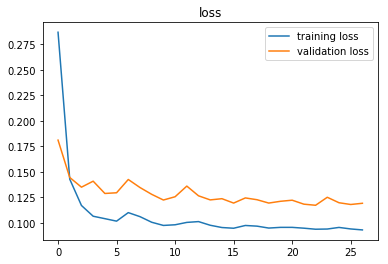

Plotting metrics...


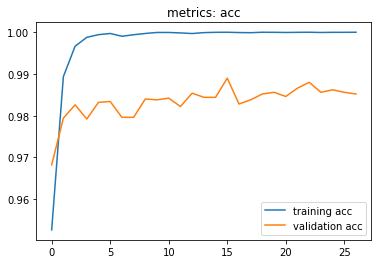

train {'acc': 0.9995818}
test {'acc': 0.9853}

Training student with temperature = 2 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11714261565846379467
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 12093453944091295374
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 3.520907 , acc = 0.44 
Epoch 1 , step 100 , loss= 0.21889381 , acc = 0.98 
Epoch 1 , step 200 , loss= 0.26185608 , acc = 0.95 
Epoch 1 , step 300 , loss= 0.19998273 , acc = 1.0 
Epoch 1 , step 400 , loss= 0.15582336 , acc = 0.97 
Epoch 1 , step 500 , loss= 0.27749252 , acc = 0.97 
Epoch 1 , step 549 , loss= 0.22848497 val_loss= 0.19918397 , acc = 0.98 val acc = 0.9732 
Epoch 1 finished, loss= 0.2932685 val loss= 0.19918397 ,  acc = 0.9567091 val acc = 0.9732
val_acc 

Epoch 17 , step 400 , loss= 0.12936592 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.150566 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.12850453 val_loss= 0.15172812 , acc = 1.0 val acc = 0.9864 
Epoch 17 finished, loss= 0.13664378 val loss= 0.15172812 ,  acc = 0.99945456 val acc = 0.9864
val_acc improved. 
Epoch 18 , step 50 , loss= 0.103348605 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.09286187 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.12638125 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.1120533 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.123647004 , acc = 0.99 
Epoch 18 , step 549 , loss= 0.09712791 val_loss= 0.15090689 , acc = 1.0 val acc = 0.986 
Epoch 18 finished, loss= 0.13678841 val loss= 0.15090689 ,  acc = 0.9993819 val acc = 0.986

Epoch 19 , step 0 , loss= 0.12407629 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.11288497 , acc = 1.0 
Epoch 19 , step 200 , loss= 0.16815309 , acc = 1.0 
Epoch 19 , step 300 , loss= 0.116826296 , acc = 1.0 
Epoch 19 , step 400 , loss= 0.12858164 , acc 

Epoch 35 , step 100 , loss= 0.1489528 , acc = 1.0 
Epoch 35 , step 200 , loss= 0.1130414 , acc = 1.0 
Epoch 35 , step 300 , loss= 0.13049673 , acc = 1.0 
Epoch 35 , step 400 , loss= 0.14346403 , acc = 1.0 
Epoch 35 , step 500 , loss= 0.11197788 , acc = 1.0 
Epoch 35 , step 549 , loss= 0.20598812 val_loss= 0.14914887 , acc = 1.0 val acc = 0.986 
Epoch 35 finished, loss= 0.13339657 val loss= 0.14914887 ,  acc = 0.9997636 val acc = 0.986

Epoch 36 , step 50 , loss= 0.14465061 , acc = 0.99 
Epoch 36 , step 150 , loss= 0.1078119 , acc = 1.0 
Epoch 36 , step 250 , loss= 0.14149489 , acc = 1.0 
Epoch 36 , step 350 , loss= 0.116289146 , acc = 1.0 
Epoch 36 , step 450 , loss= 0.18178746 , acc = 1.0 
Epoch 36 , step 549 , loss= 0.10257391 val_loss= 0.14811262 , acc = 1.0 val acc = 0.987 
Epoch 36 finished, loss= 0.13314606 val loss= 0.14811262 ,  acc = 0.999709 val acc = 0.987

Epoch 37 , step 0 , loss= 0.15876988 , acc = 1.0 
Epoch 37 , step 100 , loss= 0.111830726 , acc = 1.0 
Epoch 37 , step 

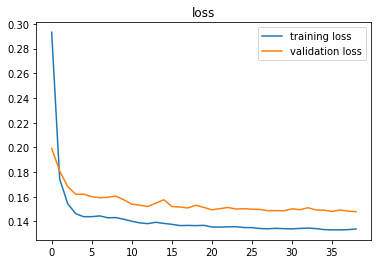

Plotting metrics...


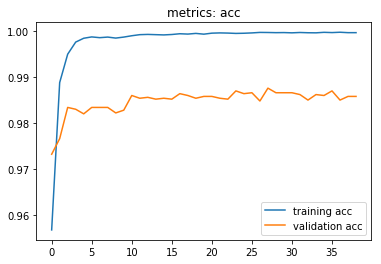

train {'acc': 0.9991818}
test {'acc': 0.9842}

Training student with temperature = 2 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13447560734561161417
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 10469048010995263580
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 3.5148687 , acc = 0.36 
Epoch 1 , step 100 , loss= 0.41117528 , acc = 0.95 
Epoch 1 , step 200 , loss= 0.29690662 , acc = 0.96 
Epoch 1 , step 300 , loss= 0.24629076 , acc = 1.0 
Epoch 1 , step 400 , loss= 0.13895546 , acc = 0.99 
Epoch 1 , step 500 , loss= 0.16517505 , acc = 0.99 
Epoch 1 , step 549 , loss= 0.24320406 val_loss= 0.21518947 , acc = 0.95 val acc = 0.9768 
Epoch 1 finished, loss= 0.31987017 val loss= 0.21518947 ,  acc = 0.9526182 val acc = 0.9768
val_acc 

Epoch 17 , step 300 , loss= 0.15534778 , acc = 0.99 
Epoch 17 , step 400 , loss= 0.22872446 , acc = 0.99 
Epoch 17 , step 500 , loss= 0.13926269 , acc = 0.99 
Epoch 17 , step 549 , loss= 0.2141702 val_loss= 0.18328726 , acc = 1.0 val acc = 0.9866 
Epoch 17 finished, loss= 0.17617795 val loss= 0.18328726 ,  acc = 0.99412733 val acc = 0.9866
val_acc improved. 
Epoch 18 , step 50 , loss= 0.17366213 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.23487553 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.16194832 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.105056524 , acc = 0.99 
Epoch 18 , step 450 , loss= 0.14220819 , acc = 0.99 
Epoch 18 , step 549 , loss= 0.19175875 val_loss= 0.18163602 , acc = 1.0 val acc = 0.9836 
Epoch 18 finished, loss= 0.1753027 val loss= 0.18163602 ,  acc = 0.9943273 val acc = 0.9836

Epoch 19 , step 0 , loss= 0.1410523 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.20703158 , acc = 1.0 
Epoch 19 , step 200 , loss= 0.16216841 , acc = 0.99 
Epoch 19 , step 300 , loss= 0.19953835 ,

Epoch 35 , step 100 , loss= 0.14164981 , acc = 1.0 
Epoch 35 , step 200 , loss= 0.34259588 , acc = 0.99 
Epoch 35 , step 300 , loss= 0.15303712 , acc = 0.99 
Epoch 35 , step 400 , loss= 0.15471898 , acc = 0.99 
Epoch 35 , step 500 , loss= 0.16673933 , acc = 1.0 
Epoch 35 , step 549 , loss= 0.15877484 val_loss= 0.17920391 , acc = 1.0 val acc = 0.9868 
Epoch 35 finished, loss= 0.17304592 val loss= 0.17920391 ,  acc = 0.99478185 val acc = 0.9868

Epoch 36 , step 50 , loss= 0.16351283 , acc = 1.0 
Epoch 36 , step 150 , loss= 0.13672936 , acc = 1.0 
Epoch 36 , step 250 , loss= 0.18357235 , acc = 0.99 
Epoch 36 , step 350 , loss= 0.18462475 , acc = 0.99 
Epoch 36 , step 450 , loss= 0.16222942 , acc = 1.0 
Epoch 36 , step 549 , loss= 0.1337535 val_loss= 0.18127558 , acc = 0.99 val acc = 0.9858 
Epoch 36 finished, loss= 0.17308488 val loss= 0.18127558 ,  acc = 0.9946727 val acc = 0.9858

Epoch 37 , step 0 , loss= 0.1838566 , acc = 0.98 
Epoch 37 , step 100 , loss= 0.20241089 , acc = 0.99 
Epoc

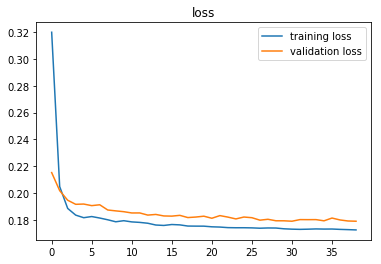

Plotting metrics...


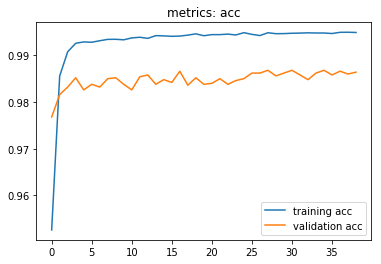

train {'acc': 0.99456364}
test {'acc': 0.9839}

Training student with temperature = 4 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9275978751170798151
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 1304268129534527294
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 5.403261 , acc = 0.26 
Epoch 1 , step 100 , loss= 0.16131431 , acc = 0.95 
Epoch 1 , step 200 , loss= 0.15254176 , acc = 0.96 
Epoch 1 , step 300 , loss= 0.13116434 , acc = 0.96 
Epoch 1 , step 400 , loss= 0.16382273 , acc = 0.99 
Epoch 1 , step 500 , loss= 0.24133077 , acc = 0.96 
Epoch 1 , step 549 , loss= 0.09800651 val_loss= 0.09918252 , acc = 0.98 val acc = 0.9732 
Epoch 1 finished, loss= 0.24979226 val loss= 0.09918252 ,  acc = 0.9481636 val acc = 0.9732
val_acc i

Epoch 17 , step 100 , loss= 0.00012225645 , acc = 1.0 
Epoch 17 , step 200 , loss= 0.014291275 , acc = 1.0 
Epoch 17 , step 300 , loss= 0.00022447716 , acc = 1.0 
Epoch 17 , step 400 , loss= 0.0019672797 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.01536307 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.00034858656 val_loss= 0.11878143 , acc = 1.0 val acc = 0.9798 
Epoch 17 finished, loss= 0.006837905 val loss= 0.11878143 ,  acc = 0.99983644 val acc = 0.9798

Epoch 18 , step 50 , loss= 0.061993405 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.038736578 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.03358637 , acc = 1.0 
Epoch 18 , step 350 , loss= 6.9784954e-05 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.06284848 , acc = 0.99 
Epoch 18 , step 549 , loss= 0.055630684 val_loss= 0.10986177 , acc = 1.0 val acc = 0.98 
Epoch 18 finished, loss= 0.019609056 val loss= 0.10986177 ,  acc = 0.99941814 val acc = 0.98

Epoch 19 , step 0 , loss= 0.0023355396 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.0011625629 ,

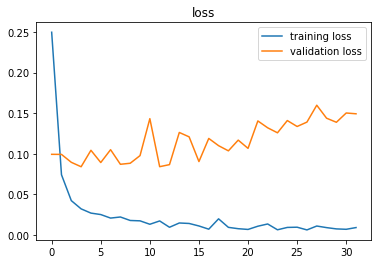

Plotting metrics...


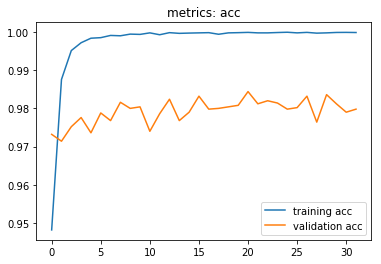

train {'acc': 0.9973091}
test {'acc': 0.9794}

Training student with temperature = 4 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11927047475359501691
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 12757335828396719005
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 3.4994454 , acc = 0.47 
Epoch 1 , step 100 , loss= 0.43674546 , acc = 0.93 
Epoch 1 , step 200 , loss= 0.2845086 , acc = 0.99 
Epoch 1 , step 300 , loss= 0.31708726 , acc = 0.94 
Epoch 1 , step 400 , loss= 0.466356 , acc = 0.95 
Epoch 1 , step 500 , loss= 0.32982823 , acc = 0.98 
Epoch 1 , step 549 , loss= 0.22957538 val_loss= 0.26145965 , acc = 0.98 val acc = 0.9648 
Epoch 1 finished, loss= 0.37829778 val loss= 0.26145965 ,  acc = 0.9518 val acc = 0.9648
val_acc imp

Epoch 17 , step 400 , loss= 0.13730055 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.13986796 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.14754613 val_loss= 0.18421817 , acc = 1.0 val acc = 0.986 
Epoch 17 finished, loss= 0.15246852 val loss= 0.18421817 ,  acc = 1.0 val acc = 0.986

Epoch 18 , step 50 , loss= 0.1711872 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.13676348 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.18379663 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.14671133 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.17387573 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.16077098 val_loss= 0.18205461 , acc = 1.0 val acc = 0.986 
Epoch 18 finished, loss= 0.15041873 val loss= 0.18205461 ,  acc = 1.0 val acc = 0.986

Epoch 19 , step 0 , loss= 0.15647061 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.1408182 , acc = 1.0 
Epoch 19 , step 200 , loss= 0.12228138 , acc = 1.0 
Epoch 19 , step 300 , loss= 0.14818762 , acc = 1.0 
Epoch 19 , step 400 , loss= 0.15143558 , acc = 1.0 
Epoch 19 , step 500 , loss= 0

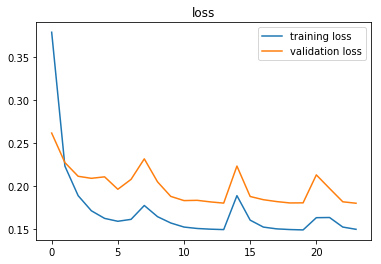

Plotting metrics...


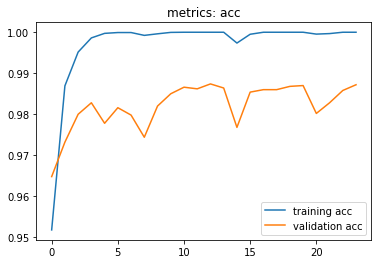

train {'acc': 1.0}
test {'acc': 0.9856}

Training student with temperature = 4 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17557317001426600208
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 14289955839859877496
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 3.8531828 , acc = 0.4 
Epoch 1 , step 100 , loss= 0.43710658 , acc = 0.97 
Epoch 1 , step 200 , loss= 0.5372849 , acc = 0.96 
Epoch 1 , step 300 , loss= 0.311169 , acc = 0.99 
Epoch 1 , step 400 , loss= 0.5031094 , acc = 0.94 
Epoch 1 , step 500 , loss= 0.3211524 , acc = 0.98 
Epoch 1 , step 549 , loss= 0.32166293 val_loss= 0.37033403 , acc = 1.0 val acc = 0.9706 
Epoch 1 finished, loss= 0.49916816 val loss= 0.37033403 ,  acc = 0.95349085 val acc = 0.9706
val_acc improved. 


Epoch 17 , step 400 , loss= 0.3209524 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.2876761 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.27863 val_loss= 0.31226894 , acc = 1.0 val acc = 0.9862 
Epoch 17 finished, loss= 0.29646128 val loss= 0.31226894 ,  acc = 1.0 val acc = 0.9862

Epoch 18 , step 50 , loss= 0.3091066 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.24642457 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.34579876 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.2563678 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.21901014 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.3381604 val_loss= 0.3132183 , acc = 1.0 val acc = 0.9862 
Epoch 18 finished, loss= 0.29622 val loss= 0.3132183 ,  acc = 1.0 val acc = 0.9862

Epoch 19 , step 0 , loss= 0.24686755 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.2474371 , acc = 1.0 
Epoch 19 , step 200 , loss= 0.2587602 , acc = 1.0 
Epoch 19 , step 300 , loss= 0.28654304 , acc = 1.0 
Epoch 19 , step 400 , loss= 0.3307793 , acc = 1.0 
Epoch 19 , step 500 , loss= 0.36026374 

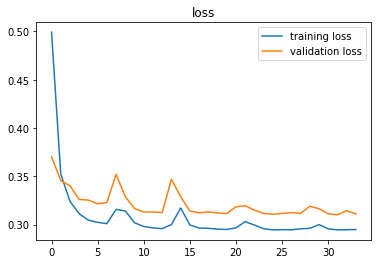

Plotting metrics...


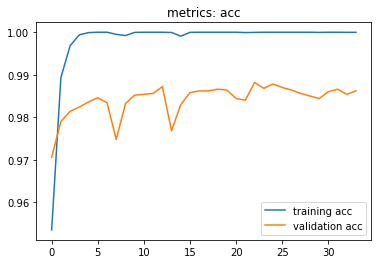

train {'acc': 1.0}
test {'acc': 0.986}

Training student with temperature = 4 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5909201376203692399
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 11711741485970247767
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 3.5140831 , acc = 0.38 
Epoch 1 , step 100 , loss= 0.56093454 , acc = 0.97 
Epoch 1 , step 200 , loss= 0.6285046 , acc = 0.97 
Epoch 1 , step 300 , loss= 0.6499847 , acc = 0.97 
Epoch 1 , step 400 , loss= 0.4056342 , acc = 0.99 
Epoch 1 , step 500 , loss= 0.42471227 , acc = 1.0 
Epoch 1 , step 549 , loss= 0.46198183 val_loss= 0.4827394 , acc = 0.98 val acc = 0.975 
Epoch 1 finished, loss= 0.60244 val loss= 0.4827394 ,  acc = 0.95360005 val acc = 0.975
val_acc improved. 
Epoc

Epoch 17 , step 400 , loss= 0.40655875 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.4376158 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.45516527 val_loss= 0.44353545 , acc = 1.0 val acc = 0.9854 
Epoch 17 finished, loss= 0.44194892 val loss= 0.44353545 ,  acc = 0.9999818 val acc = 0.9854

Epoch 18 , step 50 , loss= 0.39283696 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.44622082 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.39248556 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.48612553 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.4222146 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.57822627 val_loss= 0.44347936 , acc = 1.0 val acc = 0.9838 
Epoch 18 finished, loss= 0.44175997 val loss= 0.44347936 ,  acc = 1.0 val acc = 0.9838

Epoch 19 , step 0 , loss= 0.4983135 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.4208694 , acc = 1.0 
Epoch 19 , step 200 , loss= 0.4162752 , acc = 1.0 
Epoch 19 , step 300 , loss= 0.4143849 , acc = 1.0 
Epoch 19 , step 400 , loss= 0.5210714 , acc = 1.0 
Epoch 19 , step 500 , lo

Epoch 35 , step 100 , loss= 0.42752883 , acc = 1.0 
Epoch 35 , step 200 , loss= 0.47852042 , acc = 1.0 
Epoch 35 , step 300 , loss= 0.40946367 , acc = 1.0 
Epoch 35 , step 400 , loss= 0.4118287 , acc = 1.0 
Epoch 35 , step 500 , loss= 0.3884994 , acc = 1.0 
Epoch 35 , step 549 , loss= 0.38460773 val_loss= 0.4416117 , acc = 1.0 val acc = 0.9846 
Epoch 35 finished, loss= 0.4395894 val loss= 0.4416117 ,  acc = 1.0 val acc = 0.9846

Epoch 36 , step 50 , loss= 0.43699294 , acc = 1.0 
Epoch 36 , step 150 , loss= 0.34869498 , acc = 1.0 
Epoch 36 , step 250 , loss= 0.53252095 , acc = 1.0 
Epoch 36 , step 350 , loss= 0.5195508 , acc = 1.0 
Epoch 36 , step 450 , loss= 0.44262898 , acc = 1.0 
Epoch 36 , step 549 , loss= 0.39682212 val_loss= 0.44089612 , acc = 1.0 val acc = 0.9866 
Epoch 36 finished, loss= 0.43945906 val loss= 0.44089612 ,  acc = 1.0 val acc = 0.9866

Epoch 37 , step 0 , loss= 0.4318669 , acc = 1.0 
Epoch 37 , step 100 , loss= 0.42002288 , acc = 1.0 
Epoch 37 , step 200 , loss= 0.

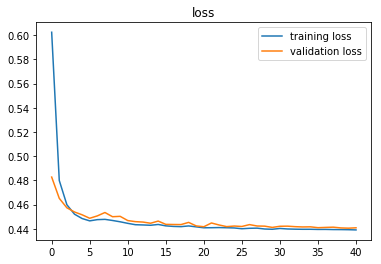

Plotting metrics...


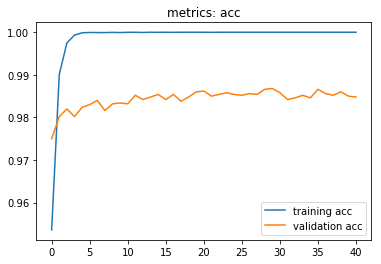

train {'acc': 0.9999091}
test {'acc': 0.9848}

Training student with temperature = 4 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3326946558620871685
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 4810168288376428388
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.4397433 , acc = 0.5 
Epoch 1 , step 100 , loss= 0.63657874 , acc = 0.92 
Epoch 1 , step 200 , loss= 0.63197607 , acc = 0.96 
Epoch 1 , step 300 , loss= 0.66759765 , acc = 0.96 
Epoch 1 , step 400 , loss= 0.602449 , acc = 0.96 
Epoch 1 , step 500 , loss= 0.57913125 , acc = 0.97 
Epoch 1 , step 549 , loss= 0.5560838 val_loss= 0.5990994 , acc = 0.99 val acc = 0.971 
Epoch 1 finished, loss= 0.6841715 val loss= 0.5990994 ,  acc = 0.95358187 val acc = 0.971
val_acc improved.

Epoch 17 , step 400 , loss= 0.6337584 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.61272705 , acc = 0.99 
Epoch 17 , step 549 , loss= 0.57369304 val_loss= 0.57167876 , acc = 0.99 val acc = 0.9832 
Epoch 17 finished, loss= 0.5846084 val loss= 0.57167876 ,  acc = 0.99381816 val acc = 0.9832

Epoch 18 , step 50 , loss= 0.7095569 , acc = 0.98 
Epoch 18 , step 150 , loss= 0.60882014 , acc = 0.99 
Epoch 18 , step 250 , loss= 0.6462598 , acc = 0.99 
Epoch 18 , step 350 , loss= 0.56526047 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.5107075 , acc = 0.99 
Epoch 18 , step 549 , loss= 0.5100239 val_loss= 0.5713281 , acc = 0.99 val acc = 0.9834 
Epoch 18 finished, loss= 0.5844712 val loss= 0.5713281 ,  acc = 0.9942727 val acc = 0.9834
val_acc improved. 
Epoch 19 , step 0 , loss= 0.46262288 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.4958124 , acc = 1.0 
Epoch 19 , step 200 , loss= 0.5931265 , acc = 1.0 
Epoch 19 , step 300 , loss= 0.5259299 , acc = 1.0 
Epoch 19 , step 400 , loss= 0.5656739 , acc = 1.0

Epoch 35 , step 100 , loss= 0.6085802 , acc = 0.97 
Epoch 35 , step 200 , loss= 0.64990455 , acc = 1.0 
Epoch 35 , step 300 , loss= 0.6587236 , acc = 1.0 
Epoch 35 , step 400 , loss= 0.6482479 , acc = 0.97 
Epoch 35 , step 500 , loss= 0.5470296 , acc = 1.0 
Epoch 35 , step 549 , loss= 0.5379534 val_loss= 0.5697542 , acc = 1.0 val acc = 0.9842 
Epoch 35 finished, loss= 0.58276254 val loss= 0.5697542 ,  acc = 0.99474543 val acc = 0.9842

Epoch 36 , step 50 , loss= 0.53580207 , acc = 1.0 
Epoch 36 , step 150 , loss= 0.5705168 , acc = 0.99 
Epoch 36 , step 250 , loss= 0.5784491 , acc = 1.0 
Epoch 36 , step 350 , loss= 0.51775014 , acc = 0.99 
Epoch 36 , step 450 , loss= 0.47104034 , acc = 1.0 
Epoch 36 , step 549 , loss= 0.5820593 val_loss= 0.56947786 , acc = 1.0 val acc = 0.9854 
Epoch 36 finished, loss= 0.58281523 val loss= 0.56947786 ,  acc = 0.99460006 val acc = 0.9854

Epoch 37 , step 0 , loss= 0.6385824 , acc = 1.0 
Epoch 37 , step 100 , loss= 0.60707575 , acc = 1.0 
Epoch 37 , step 

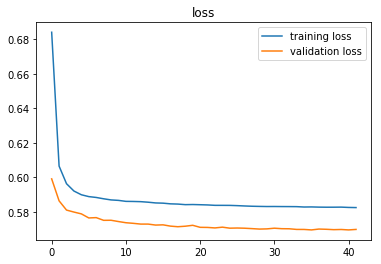

Plotting metrics...


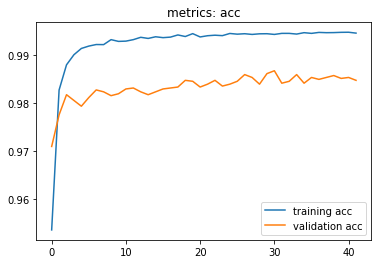

train {'acc': 0.99472725}
test {'acc': 0.9831}

Training student with temperature = 6 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 18404506031044303084
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 1903007157438358874
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 5.532167 , acc = 0.53 
Epoch 1 , step 100 , loss= 0.17521483 , acc = 0.97 
Epoch 1 , step 200 , loss= 0.1215345 , acc = 0.98 
Epoch 1 , step 300 , loss= 0.116871044 , acc = 0.97 
Epoch 1 , step 400 , loss= 0.15611245 , acc = 0.97 
Epoch 1 , step 500 , loss= 0.15559582 , acc = 0.97 
Epoch 1 , step 549 , loss= 0.09762452 val_loss= 0.10881439 , acc = 0.96 val acc = 0.9658 
Epoch 1 finished, loss= 0.25787836 val loss= 0.10881439 ,  acc = 0.94769084 val acc = 0.9658
val_acc

Epoch 17 , step 100 , loss= 0.0007523552 , acc = 1.0 
Epoch 17 , step 200 , loss= 0.0007682202 , acc = 1.0 
Epoch 17 , step 300 , loss= 0.006274754 , acc = 1.0 
Epoch 17 , step 400 , loss= 0.00050816784 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.023434628 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.05692719 val_loss= 0.11834141 , acc = 0.99 val acc = 0.9806 
Epoch 17 finished, loss= 0.011665537 val loss= 0.11834141 ,  acc = 0.9996181 val acc = 0.9806

Epoch 18 , step 50 , loss= 3.5018966e-05 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.00010546717 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.0010690123 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.0054895473 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.002740526 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.0017137132 val_loss= 0.10839073 , acc = 1.0 val acc = 0.9802 
Epoch 18 finished, loss= 0.0079142265 val loss= 0.10839073 ,  acc = 0.9998908 val acc = 0.9802

Epoch 19 , step 0 , loss= 0.008075066 , acc = 1.0 
Epoch 19 , step 100 , loss= 1.595650

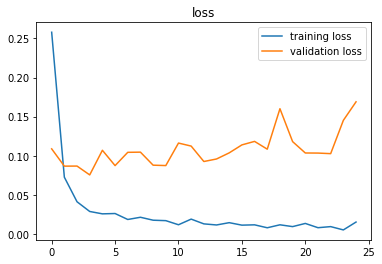

Plotting metrics...


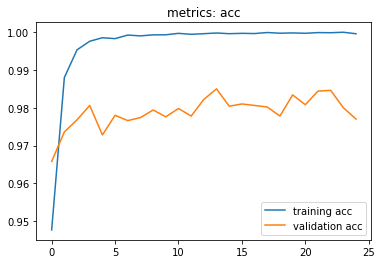

train {'acc': 0.99485457}
test {'acc': 0.976}

Training student with temperature = 6 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7908743499488565325
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 7764081921129740314
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 4.921515 , acc = 0.28 
Epoch 1 , step 100 , loss= 0.67321104 , acc = 0.93 
Epoch 1 , step 200 , loss= 0.40649787 , acc = 0.95 
Epoch 1 , step 300 , loss= 0.3846296 , acc = 0.97 
Epoch 1 , step 400 , loss= 0.50914043 , acc = 0.95 
Epoch 1 , step 500 , loss= 0.5362046 , acc = 0.96 
Epoch 1 , step 549 , loss= 0.33394456 val_loss= 0.36780733 , acc = 0.99 val acc = 0.9694 
Epoch 1 finished, loss= 0.49977416 val loss= 0.36780733 ,  acc = 0.9474364 val acc = 0.9694
val_acc im

Epoch 17 , step 300 , loss= 0.26514918 , acc = 1.0 
Epoch 17 , step 400 , loss= 0.24468558 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.23250651 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.25161836 val_loss= 0.28569072 , acc = 1.0 val acc = 0.9866 
Epoch 17 finished, loss= 0.25410604 val loss= 0.28569072 ,  acc = 1.0 val acc = 0.9866

Epoch 18 , step 50 , loss= 0.23292421 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.27810398 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.2734676 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.2689624 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.24735779 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.27941635 val_loss= 0.28657854 , acc = 1.0 val acc = 0.987 
Epoch 18 finished, loss= 0.25391197 val loss= 0.28657854 ,  acc = 1.0 val acc = 0.987

Epoch 19 , step 0 , loss= 0.2204905 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.28180403 , acc = 1.0 
Epoch 19 , step 200 , loss= 0.25743288 , acc = 1.0 
Epoch 19 , step 300 , loss= 0.2740835 , acc = 1.0 
Epoch 19 , step 400 , loss= 0

Epoch 35 , step 100 , loss= 0.2751704 , acc = 1.0 
Epoch 35 , step 200 , loss= 0.22787859 , acc = 1.0 
Epoch 35 , step 300 , loss= 0.25626865 , acc = 1.0 
Epoch 35 , step 400 , loss= 0.26284325 , acc = 1.0 
Epoch 35 , step 500 , loss= 0.24970882 , acc = 1.0 
Epoch 35 , step 549 , loss= 0.2588847 val_loss= 0.28467545 , acc = 1.0 val acc = 0.9886 
Epoch 35 finished, loss= 0.25384316 val loss= 0.28467545 ,  acc = 1.0 val acc = 0.9886

Epoch 36 , step 50 , loss= 0.25007626 , acc = 1.0 
Epoch 36 , step 150 , loss= 0.27975488 , acc = 1.0 
Epoch 36 , step 250 , loss= 0.24233082 , acc = 1.0 
Epoch 36 , step 350 , loss= 0.25204456 , acc = 1.0 
Epoch 36 , step 450 , loss= 0.24236083 , acc = 1.0 
Epoch 36 , step 549 , loss= 0.24838819 val_loss= 0.28513885 , acc = 1.0 val acc = 0.9878 
Epoch 36 finished, loss= 0.25356293 val loss= 0.28513885 ,  acc = 1.0 val acc = 0.9878

Epoch 37 , step 0 , loss= 0.24738877 , acc = 1.0 
Epoch 37 , step 100 , loss= 0.26893005 , acc = 1.0 
Epoch 37 , step 200 , los

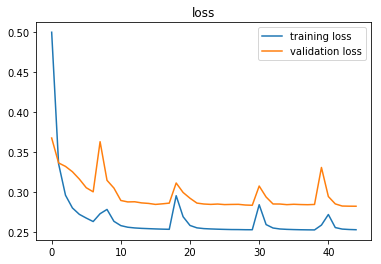

Plotting metrics...


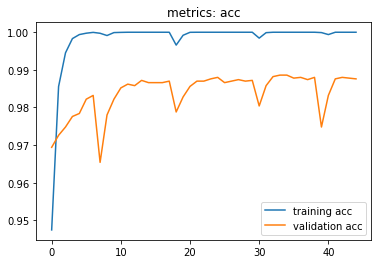

train {'acc': 1.0}
test {'acc': 0.9846}

Training student with temperature = 6 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10323804842545215933
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 13850068259360422095
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 3.3343177 , acc = 0.29 
Epoch 1 , step 100 , loss= 0.7751447 , acc = 0.93 
Epoch 1 , step 200 , loss= 0.6451558 , acc = 0.97 
Epoch 1 , step 300 , loss= 0.64316064 , acc = 0.98 
Epoch 1 , step 400 , loss= 0.6735712 , acc = 0.96 
Epoch 1 , step 500 , loss= 0.74154824 , acc = 0.94 
Epoch 1 , step 549 , loss= 0.6398023 val_loss= 0.5965987 , acc = 0.97 val acc = 0.9646 
Epoch 1 finished, loss= 0.7082482 val loss= 0.5965987 ,  acc = 0.9509091 val acc = 0.9646
val_acc improved. 
E

Epoch 17 , step 500 , loss= 0.48569322 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.48704138 val_loss= 0.5203614 , acc = 1.0 val acc = 0.986 
Epoch 17 finished, loss= 0.50620306 val loss= 0.5203614 ,  acc = 1.0 val acc = 0.986

Epoch 18 , step 50 , loss= 0.5055243 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.57678896 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.534121 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.5678103 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.56116277 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.55776006 val_loss= 0.5336641 , acc = 1.0 val acc = 0.9838 
Epoch 18 finished, loss= 0.5328991 val loss= 0.5336641 ,  acc = 0.9984 val acc = 0.9838

Epoch 19 , step 0 , loss= 0.5155957 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.523262 , acc = 1.0 
Epoch 19 , step 200 , loss= 0.5153941 , acc = 1.0 
Epoch 19 , step 300 , loss= 0.53094536 , acc = 1.0 
Epoch 19 , step 400 , loss= 0.5689002 , acc = 1.0 
Epoch 19 , step 500 , loss= 0.43809062 , acc = 1.0 
Epoch 19 , step 549 , loss= 0.534927

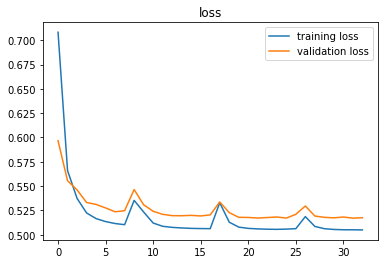

Plotting metrics...


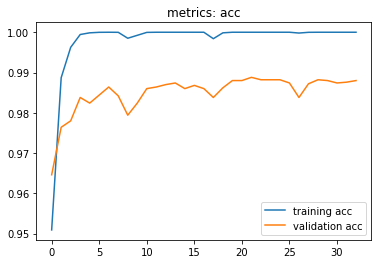

train {'acc': 1.0}
test {'acc': 0.9854}

Training student with temperature = 6 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3804814112787087250
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 10920148098929577827
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.915092 , acc = 0.34 
Epoch 1 , step 100 , loss= 0.99392533 , acc = 0.92 
Epoch 1 , step 200 , loss= 0.8876748 , acc = 0.96 
Epoch 1 , step 300 , loss= 0.95918655 , acc = 0.94 
Epoch 1 , step 400 , loss= 0.7461297 , acc = 0.99 
Epoch 1 , step 500 , loss= 0.85644495 , acc = 0.98 
Epoch 1 , step 549 , loss= 0.8004887 val_loss= 0.79838175 , acc = 0.99 val acc = 0.9694 
Epoch 1 finished, loss= 0.900698 val loss= 0.79838175 ,  acc = 0.9556909 val acc = 0.9694
val_acc improved. 

Epoch 17 , step 500 , loss= 0.77280587 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.734366 val_loss= 0.75725514 , acc = 1.0 val acc = 0.985 
Epoch 17 finished, loss= 0.7598458 val loss= 0.75725514 ,  acc = 1.0 val acc = 0.985

Epoch 18 , step 50 , loss= 0.66253567 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.7513368 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.6982836 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.8254321 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.79908425 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.7618835 val_loss= 0.75545496 , acc = 1.0 val acc = 0.986 
Epoch 18 finished, loss= 0.75854194 val loss= 0.75545496 ,  acc = 1.0 val acc = 0.986

Epoch 19 , step 0 , loss= 0.7947217 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.7419326 , acc = 1.0 
Epoch 19 , step 200 , loss= 0.7858674 , acc = 1.0 
Epoch 19 , step 300 , loss= 0.82436585 , acc = 1.0 
Epoch 19 , step 400 , loss= 0.7382809 , acc = 1.0 
Epoch 19 , step 500 , loss= 0.76616955 , acc = 1.0 
Epoch 19 , step 549 , loss= 0.72607106

Epoch 35 , step 400 , loss= 0.69936293 , acc = 1.0 
Epoch 35 , step 500 , loss= 0.79376954 , acc = 1.0 
Epoch 35 , step 549 , loss= 0.7381861 val_loss= 0.7526441 , acc = 1.0 val acc = 0.9878 
Epoch 35 finished, loss= 0.7564589 val loss= 0.7526441 ,  acc = 1.0 val acc = 0.9878

Epoch 36 , step 50 , loss= 0.6920874 , acc = 1.0 
Epoch 36 , step 150 , loss= 0.7439996 , acc = 1.0 
Epoch 36 , step 250 , loss= 0.7979151 , acc = 1.0 
Epoch 36 , step 350 , loss= 0.75232404 , acc = 1.0 
Epoch 36 , step 450 , loss= 0.7898455 , acc = 1.0 
Epoch 36 , step 549 , loss= 0.79124546 val_loss= 0.7522802 , acc = 1.0 val acc = 0.987 
Epoch 36 finished, loss= 0.75633025 val loss= 0.7522802 ,  acc = 1.0 val acc = 0.987

Epoch 37 , step 0 , loss= 0.7486914 , acc = 1.0 
Epoch 37 , step 100 , loss= 0.783734 , acc = 1.0 
Epoch 37 , step 200 , loss= 0.70848465 , acc = 1.0 
Epoch 37 , step 300 , loss= 0.71902984 , acc = 1.0 
Epoch 37 , step 400 , loss= 0.69492507 , acc = 1.0 
Epoch 37 , step 500 , loss= 0.7477505 

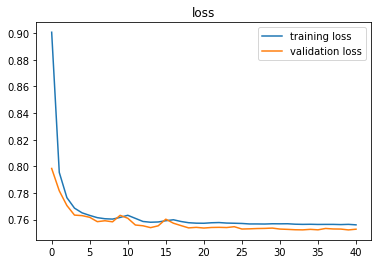

Plotting metrics...


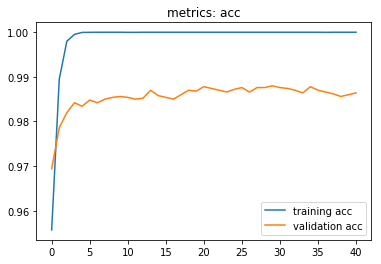

train {'acc': 0.9999818}
test {'acc': 0.9855}

Training student with temperature = 6 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1558579571944855915
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 13445828936647397390
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3887 , acc = 0.48 
Epoch 1 , step 100 , loss= 1.0643458 , acc = 0.96 
Epoch 1 , step 200 , loss= 1.0956192 , acc = 0.92 
Epoch 1 , step 300 , loss= 1.0885441 , acc = 0.96 
Epoch 1 , step 400 , loss= 0.9878249 , acc = 1.0 
Epoch 1 , step 500 , loss= 0.97571564 , acc = 0.99 
Epoch 1 , step 549 , loss= 0.9186454 val_loss= 1.0069851 , acc = 1.0 val acc = 0.973 
Epoch 1 finished, loss= 1.085383 val loss= 1.0069851 ,  acc = 0.9489272 val acc = 0.973
val_acc improved. 
Epoch

Epoch 17 , step 400 , loss= 0.9940453 , acc = 0.97 
Epoch 17 , step 500 , loss= 0.98371774 , acc = 0.98 
Epoch 17 , step 549 , loss= 0.93853384 val_loss= 0.987221 , acc = 0.99 val acc = 0.9824 
Epoch 17 finished, loss= 1.0077363 val loss= 0.987221 ,  acc = 0.99381816 val acc = 0.9824

Epoch 18 , step 50 , loss= 1.1237732 , acc = 0.98 
Epoch 18 , step 150 , loss= 1.0399725 , acc = 0.99 
Epoch 18 , step 250 , loss= 1.0693657 , acc = 1.0 
Epoch 18 , step 350 , loss= 1.0494484 , acc = 0.99 
Epoch 18 , step 450 , loss= 0.9953968 , acc = 0.99 
Epoch 18 , step 549 , loss= 0.97870153 val_loss= 0.98726434 , acc = 0.99 val acc = 0.9834 
Epoch 18 finished, loss= 1.0076199 val loss= 0.98726434 ,  acc = 0.9934909 val acc = 0.9834
val_acc improved. 
Epoch 19 , step 0 , loss= 1.0312694 , acc = 1.0 
Epoch 19 , step 100 , loss= 1.0056785 , acc = 0.99 
Epoch 19 , step 200 , loss= 1.1263626 , acc = 0.99 
Epoch 19 , step 300 , loss= 0.95587766 , acc = 1.0 
Epoch 19 , step 400 , loss= 1.1098152 , acc = 1.0

Epoch 35 , step 100 , loss= 0.9945279 , acc = 1.0 
Epoch 35 , step 200 , loss= 1.0194328 , acc = 0.99 
Epoch 35 , step 300 , loss= 1.1642864 , acc = 1.0 
Epoch 35 , step 400 , loss= 0.8869888 , acc = 1.0 
Epoch 35 , step 500 , loss= 1.0768555 , acc = 1.0 
Epoch 35 , step 549 , loss= 1.0572764 val_loss= 0.9859114 , acc = 1.0 val acc = 0.9842 
Epoch 35 finished, loss= 1.0064632 val loss= 0.9859114 ,  acc = 0.99460006 val acc = 0.9842
val_acc improved. 
Epoch 36 , step 50 , loss= 1.074552 , acc = 0.99 
Epoch 36 , step 150 , loss= 1.0183176 , acc = 1.0 
Epoch 36 , step 250 , loss= 0.9504748 , acc = 1.0 
Epoch 36 , step 350 , loss= 1.0432166 , acc = 0.99 
Epoch 36 , step 450 , loss= 0.96282846 , acc = 1.0 
Epoch 36 , step 549 , loss= 1.0650764 val_loss= 0.98603964 , acc = 1.0 val acc = 0.9834 
Epoch 36 finished, loss= 1.0064087 val loss= 0.98603964 ,  acc = 0.99460006 val acc = 0.9834

Epoch 37 , step 0 , loss= 1.0247895 , acc = 0.99 
Epoch 37 , step 100 , loss= 0.9150077 , acc = 1.0 
Epoch

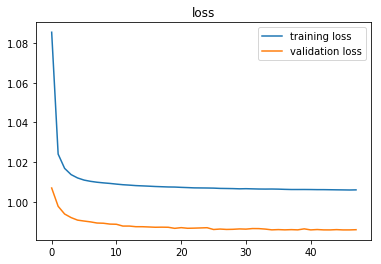

Plotting metrics...


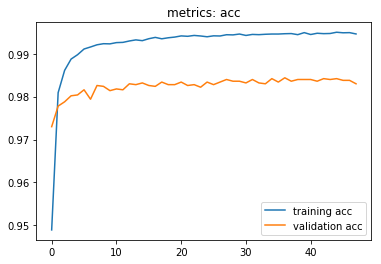

train {'acc': 0.99463636}
test {'acc': 0.9829}

Training student with temperature = 8 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13083784141399963095
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 13808494915918342765
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 3.4001615 , acc = 0.4 
Epoch 1 , step 100 , loss= 0.16757734 , acc = 0.97 
Epoch 1 , step 200 , loss= 0.14849286 , acc = 0.97 
Epoch 1 , step 300 , loss= 0.089452334 , acc = 0.97 
Epoch 1 , step 400 , loss= 0.14829288 , acc = 0.98 
Epoch 1 , step 500 , loss= 0.13344102 , acc = 0.96 
Epoch 1 , step 549 , loss= 0.12610391 val_loss= 0.100479625 , acc = 0.98 val acc = 0.9702 
Epoch 1 finished, loss= 0.22837228 val loss= 0.100479625 ,  acc = 0.94958186 val acc = 0.9702
val

Epoch 17 , step 100 , loss= 0.002431782 , acc = 1.0 
Epoch 17 , step 200 , loss= 0.019839995 , acc = 1.0 
Epoch 17 , step 300 , loss= 0.006787674 , acc = 1.0 
Epoch 17 , step 400 , loss= 0.00089688326 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.15387258 , acc = 0.99 
Epoch 17 , step 549 , loss= 0.0039997664 val_loss= 0.141099 , acc = 1.0 val acc = 0.9756 
Epoch 17 finished, loss= 0.014747642 val loss= 0.141099 ,  acc = 0.99960005 val acc = 0.9756

Epoch 18 , step 50 , loss= 0.041515756 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.005086782 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.002210851 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.0006604971 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.017677441 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.006800105 val_loss= 0.12583907 , acc = 1.0 val acc = 0.9804 
Epoch 18 finished, loss= 0.013467946 val loss= 0.12583907 ,  acc = 0.99969083 val acc = 0.9804

Epoch 19 , step 0 , loss= 0.08500803 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.010008466 , acc =

Student performance with {'coef_softloss': 0.0, 'coef_hardloss': 1.0, 'temperature': 8, 'temperature_effect': 1, 'train_acc': 0.998, 'test_acc': 0.979}
Plotting loss...


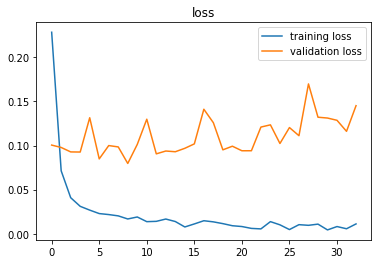

Plotting metrics...


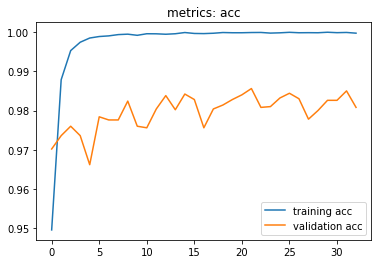

train {'acc': 0.998}
test {'acc': 0.979}

Training student with temperature = 8 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8969190291576785804
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 13716318380076167621
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 3.7668784 , acc = 0.34 
Epoch 1 , step 100 , loss= 0.4393819 , acc = 0.99 
Epoch 1 , step 200 , loss= 0.62710226 , acc = 0.92 
Epoch 1 , step 300 , loss= 0.6003797 , acc = 0.93 
Epoch 1 , step 400 , loss= 0.42363623 , acc = 0.98 
Epoch 1 , step 500 , loss= 0.39177826 , acc = 0.99 
Epoch 1 , step 549 , loss= 0.5191332 val_loss= 0.44533297 , acc = 0.95 val acc = 0.9676 
Epoch 1 finished, loss= 0.577347 val loss= 0.44533297 ,  acc = 0.94719994 val acc = 0.9676
val_acc improve

Epoch 17 , step 400 , loss= 0.3353003 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.30922958 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.3427391 val_loss= 0.37038636 , acc = 1.0 val acc = 0.9868 
Epoch 17 finished, loss= 0.33872432 val loss= 0.37038636 ,  acc = 1.0 val acc = 0.9868

Epoch 18 , step 50 , loss= 0.35077807 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.31493214 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.35743526 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.35787734 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.31905815 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.35392165 val_loss= 0.369744 , acc = 1.0 val acc = 0.9868 
Epoch 18 finished, loss= 0.33847484 val loss= 0.369744 ,  acc = 1.0 val acc = 0.9868

Epoch 19 , step 0 , loss= 0.3412759 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.32539165 , acc = 1.0 
Epoch 19 , step 200 , loss= 0.32779542 , acc = 1.0 
Epoch 19 , step 300 , loss= 0.33215296 , acc = 1.0 
Epoch 19 , step 400 , loss= 0.33890945 , acc = 1.0 
Epoch 19 , step 500 , loss= 0.

Epoch 35 , step 200 , loss= 0.32203707 , acc = 1.0 
Epoch 35 , step 300 , loss= 0.32127652 , acc = 1.0 
Epoch 35 , step 400 , loss= 0.3815686 , acc = 1.0 
Epoch 35 , step 500 , loss= 0.34895453 , acc = 1.0 
Epoch 35 , step 549 , loss= 0.33773565 val_loss= 0.4151654 , acc = 1.0 val acc = 0.9742 
Epoch 35 finished, loss= 0.35506576 val loss= 0.4151654 ,  acc = 0.9993455 val acc = 0.9742

Epoch 36 , step 50 , loss= 0.34439084 , acc = 1.0 
Epoch 36 , step 150 , loss= 0.34458277 , acc = 1.0 
Epoch 36 , step 250 , loss= 0.35289302 , acc = 1.0 
Epoch 36 , step 350 , loss= 0.32275182 , acc = 1.0 
Epoch 36 , step 450 , loss= 0.35291687 , acc = 1.0 
Epoch 36 , step 549 , loss= 0.384044 val_loss= 0.3868756 , acc = 0.99 val acc = 0.9822 
Epoch 36 finished, loss= 0.35816118 val loss= 0.3868756 ,  acc = 0.99887276 val acc = 0.9822

Epoch 37 , step 0 , loss= 0.35412455 , acc = 1.0 
Epoch 37 , step 100 , loss= 0.35317257 , acc = 1.0 
Epoch 37 , step 200 , loss= 0.34583536 , acc = 1.0 
Epoch 37 , step 

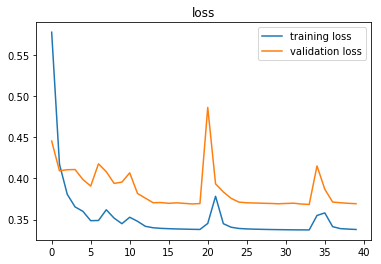

Plotting metrics...


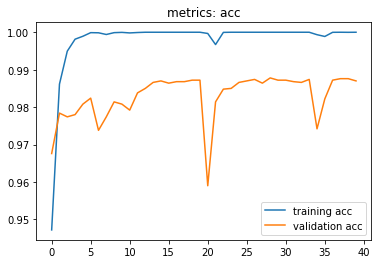

train {'acc': 1.0}
test {'acc': 0.9874}

Training student with temperature = 8 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12158912709505973062
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 301711320545202506
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 3.905758 , acc = 0.32 
Epoch 1 , step 100 , loss= 0.9896097 , acc = 0.92 
Epoch 1 , step 200 , loss= 0.81771547 , acc = 0.96 
Epoch 1 , step 300 , loss= 0.76057667 , acc = 0.97 
Epoch 1 , step 400 , loss= 0.73619527 , acc = 0.97 
Epoch 1 , step 500 , loss= 0.8411428 , acc = 0.95 
Epoch 1 , step 549 , loss= 0.7789561 val_loss= 0.74655694 , acc = 0.97 val acc = 0.9736 
Epoch 1 finished, loss= 0.87804335 val loss= 0.74655694 ,  acc = 0.94885457 val acc = 0.9736
val_acc improved. 

Epoch 17 , step 500 , loss= 0.727445 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.7271058 val_loss= 0.7095096 , acc = 1.0 val acc = 0.9804 
Epoch 17 finished, loss= 0.69971555 val loss= 0.7095096 ,  acc = 0.9984727 val acc = 0.9804

Epoch 18 , step 50 , loss= 0.6716495 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.72235924 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.6652953 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.71550685 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.7292602 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.65814054 val_loss= 0.6954075 , acc = 1.0 val acc = 0.9842 
Epoch 18 finished, loss= 0.6838439 val loss= 0.6954075 ,  acc = 0.99972725 val acc = 0.9842

Epoch 19 , step 0 , loss= 0.7029818 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.72971743 , acc = 1.0 
Epoch 19 , step 200 , loss= 0.64790136 , acc = 1.0 
Epoch 19 , step 300 , loss= 0.68223405 , acc = 1.0 
Epoch 19 , step 400 , loss= 0.6662692 , acc = 1.0 
Epoch 19 , step 500 , loss= 0.67445564 , acc = 1.0 
Epoch 19 , step 549 , l

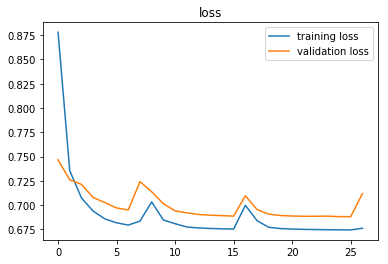

Plotting metrics...


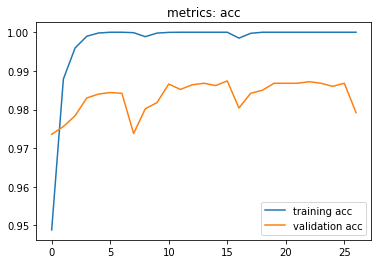

train {'acc': 0.9941091}
test {'acc': 0.9783}

Training student with temperature = 8 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1199491635198766459
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 4593630353681399631
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.8087392 , acc = 0.41 
Epoch 1 , step 100 , loss= 1.1799206 , acc = 0.96 
Epoch 1 , step 200 , loss= 1.0818877 , acc = 0.99 
Epoch 1 , step 300 , loss= 1.0189553 , acc = 0.99 
Epoch 1 , step 400 , loss= 1.0515321 , acc = 0.99 
Epoch 1 , step 500 , loss= 1.1435632 , acc = 0.98 
Epoch 1 , step 549 , loss= 1.0782149 val_loss= 1.0472527 , acc = 0.99 val acc = 0.974 
Epoch 1 finished, loss= 1.1510969 val loss= 1.0472527 ,  acc = 0.9523818 val acc = 0.974
val_acc improved. 

Epoch 18 , step 50 , loss= 1.0429779 , acc = 1.0 
Epoch 18 , step 150 , loss= 1.0311011 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.9877324 , acc = 1.0 
Epoch 18 , step 350 , loss= 1.0194159 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.9655943 , acc = 1.0 
Epoch 18 , step 549 , loss= 1.0785848 val_loss= 1.009339 , acc = 1.0 val acc = 0.9874 
Epoch 18 finished, loss= 1.012129 val loss= 1.009339 ,  acc = 1.0 val acc = 0.9874
val_acc improved. 
Epoch 19 , step 0 , loss= 1.0711254 , acc = 1.0 
Epoch 19 , step 100 , loss= 1.033123 , acc = 1.0 
Epoch 19 , step 200 , loss= 1.0193211 , acc = 1.0 
Epoch 19 , step 300 , loss= 0.99346316 , acc = 1.0 
Epoch 19 , step 400 , loss= 1.0084947 , acc = 1.0 
Epoch 19 , step 500 , loss= 1.0831168 , acc = 1.0 
Epoch 19 , step 549 , loss= 0.9786453 val_loss= 1.0088439 , acc = 1.0 val acc = 0.987 
Epoch 19 finished, loss= 1.011063 val loss= 1.0088439 ,  acc = 1.0 val acc = 0.987

Epoch 20 , step 50 , loss= 1.019412 , acc = 1.0 
Epoch 20 , step 150 , loss= 0.962

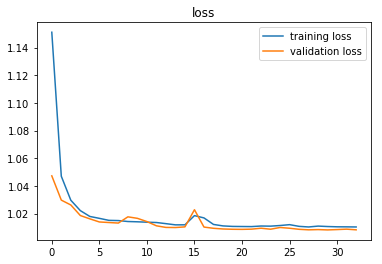

Plotting metrics...


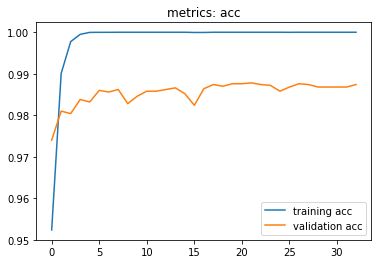

train {'acc': 1.0}
test {'acc': 0.985}

Training student with temperature = 8 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13111265520484296728
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 8140210261521345322
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.364462 , acc = 0.29 
Epoch 1 , step 100 , loss= 1.4865423 , acc = 0.95 
Epoch 1 , step 200 , loss= 1.4220743 , acc = 0.97 
Epoch 1 , step 300 , loss= 1.4597456 , acc = 0.94 
Epoch 1 , step 400 , loss= 1.3353063 , acc = 0.97 
Epoch 1 , step 500 , loss= 1.431706 , acc = 0.98 
Epoch 1 , step 549 , loss= 1.5033002 val_loss= 1.3412746 , acc = 0.98 val acc = 0.974 
Epoch 1 finished, loss= 1.4054675 val loss= 1.3412746 ,  acc = 0.9466182 val acc = 0.974
val_acc improved. 
Epoch 2 ,

Epoch 17 , step 500 , loss= 1.3360046 , acc = 1.0 
Epoch 17 , step 549 , loss= 1.2747861 val_loss= 1.327318 , acc = 1.0 val acc = 0.9838 
Epoch 17 finished, loss= 1.3464651 val loss= 1.327318 ,  acc = 0.9934728 val acc = 0.9838

Epoch 18 , step 50 , loss= 1.3223314 , acc = 0.98 
Epoch 18 , step 150 , loss= 1.3014046 , acc = 0.99 
Epoch 18 , step 250 , loss= 1.3937368 , acc = 1.0 
Epoch 18 , step 350 , loss= 1.2651975 , acc = 0.99 
Epoch 18 , step 450 , loss= 1.4154999 , acc = 0.99 
Epoch 18 , step 549 , loss= 1.3142391 val_loss= 1.3273026 , acc = 1.0 val acc = 0.9826 
Epoch 18 finished, loss= 1.3463224 val loss= 1.3273026 ,  acc = 0.9935818 val acc = 0.9826

Epoch 19 , step 0 , loss= 1.4881967 , acc = 0.98 
Epoch 19 , step 100 , loss= 1.3529739 , acc = 1.0 
Epoch 19 , step 200 , loss= 1.4154401 , acc = 1.0 
Epoch 19 , step 300 , loss= 1.3650529 , acc = 1.0 
Epoch 19 , step 400 , loss= 1.303778 , acc = 0.99 
Epoch 19 , step 500 , loss= 1.2861141 , acc = 0.98 
Epoch 19 , step 549 , loss=

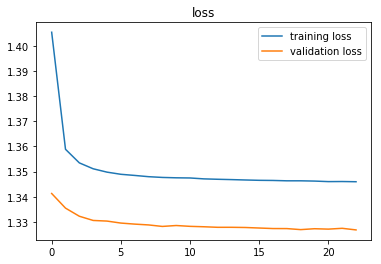

Plotting metrics...


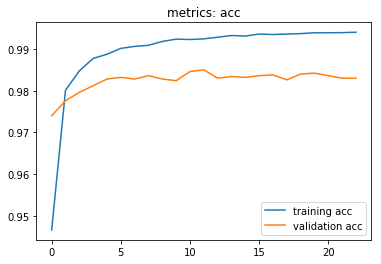

train {'acc': 0.99414545}
test {'acc': 0.9825}

Training student with temperature = 10 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6280858684255767711
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 13762611249371381187
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 4.6875486 , acc = 0.4 
Epoch 1 , step 100 , loss= 0.20653859 , acc = 0.95 
Epoch 1 , step 200 , loss= 0.08572302 , acc = 0.98 
Epoch 1 , step 300 , loss= 0.1588422 , acc = 0.95 
Epoch 1 , step 400 , loss= 0.17438059 , acc = 0.99 
Epoch 1 , step 500 , loss= 0.14010404 , acc = 0.98 
Epoch 1 , step 549 , loss= 0.09953973 val_loss= 0.108617835 , acc = 0.98 val acc = 0.9708 
Epoch 1 finished, loss= 0.23057681 val loss= 0.108617835 ,  acc = 0.9500182 val acc = 0.9708
val_ac

Epoch 17 , step 100 , loss= 0.0018213833 , acc = 1.0 
Epoch 17 , step 200 , loss= 0.0008148589 , acc = 1.0 
Epoch 17 , step 300 , loss= 0.017018342 , acc = 1.0 
Epoch 17 , step 400 , loss= 0.0028653622 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.009663954 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.07830341 val_loss= 0.09962929 , acc = 0.99 val acc = 0.9806 
Epoch 17 finished, loss= 0.014702757 val loss= 0.09962929 ,  acc = 0.99958175 val acc = 0.9806

Epoch 18 , step 50 , loss= 0.0005039174 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.0020018653 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.0024590893 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.020047512 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.0008661528 , acc = 1.0 
Epoch 18 , step 549 , loss= 7.869463e-05 val_loss= 0.11205397 , acc = 1.0 val acc = 0.9804 
Epoch 18 finished, loss= 0.0087759 val loss= 0.11205397 ,  acc = 0.9997454 val acc = 0.9804

Epoch 19 , step 0 , loss= 0.002868062 , acc = 1.0 
Epoch 19 , step 100 , loss= 5.1747003e-05

Epoch 34 , step 50 , loss= 0.005190569 , acc = 1.0 
Epoch 34 , step 150 , loss= 0.0038320783 , acc = 1.0 
Epoch 34 , step 250 , loss= 0.0047054873 , acc = 1.0 
Epoch 34 , step 350 , loss= 0.05958593 , acc = 1.0 
Epoch 34 , step 450 , loss= 0.00032457418 , acc = 1.0 
Epoch 34 , step 549 , loss= 0.0003782008 val_loss= 0.13607287 , acc = 1.0 val acc = 0.9826 
Epoch 34 finished, loss= 0.0054123397 val loss= 0.13607287 ,  acc = 0.9999272 val acc = 0.9826

Epoch 35 , step 0 , loss= 0.0003744081 , acc = 1.0 
Epoch 35 , step 100 , loss= 2.4958747e-05 , acc = 1.0 
Epoch 35 , step 200 , loss= 0.012518488 , acc = 1.0 
Epoch 35 , step 300 , loss= 4.978362e-06 , acc = 1.0 
Epoch 35 , step 400 , loss= 0.03478549 , acc = 1.0 
Epoch 35 , step 500 , loss= 0.0032575587 , acc = 1.0 
Epoch 35 , step 549 , loss= 3.4631965e-05 val_loss= 0.1445094 , acc = 1.0 val acc = 0.984 
Epoch 35 finished, loss= 0.00825261 val loss= 0.1445094 ,  acc = 0.9998181 val acc = 0.984

Stop training, val_acc didn't improve more

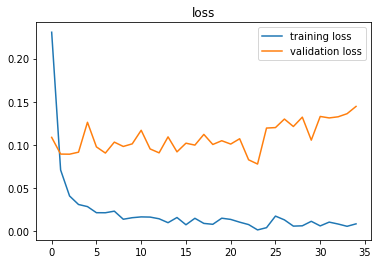

Plotting metrics...


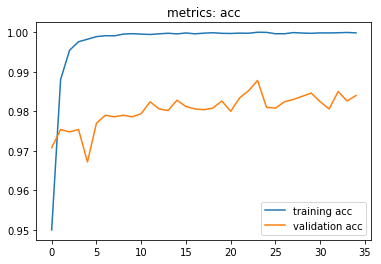

train {'acc': 0.9966}
test {'acc': 0.9791}

Training student with temperature = 10 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15744998657064875180
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 15498408757501432102
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 5.0220785 , acc = 0.31 
Epoch 1 , step 100 , loss= 0.780972 , acc = 0.92 
Epoch 1 , step 200 , loss= 0.56936175 , acc = 0.95 
Epoch 1 , step 300 , loss= 0.5542059 , acc = 0.98 
Epoch 1 , step 400 , loss= 0.54800475 , acc = 0.96 
Epoch 1 , step 500 , loss= 0.50205076 , acc = 0.98 
Epoch 1 , step 549 , loss= 0.53989875 val_loss= 0.508297 , acc = 0.98 val acc = 0.9674 
Epoch 1 finished, loss= 0.6493361 val loss= 0.508297 ,  acc = 0.945291 val acc = 0.9674
val_acc improved

Epoch 17 , step 400 , loss= 0.40133685 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.40051094 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.3869265 val_loss= 0.43127328 , acc = 1.0 val acc = 0.9868 
Epoch 17 finished, loss= 0.4000404 val loss= 0.43127328 ,  acc = 1.0 val acc = 0.9868

Epoch 18 , step 50 , loss= 0.3892678 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.37718347 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.41501138 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.40862393 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.42631036 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.40930924 val_loss= 0.4316109 , acc = 1.0 val acc = 0.9876 
Epoch 18 finished, loss= 0.39983505 val loss= 0.4316109 ,  acc = 1.0 val acc = 0.9876

Epoch 19 , step 0 , loss= 0.3947024 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.4117253 , acc = 1.0 
Epoch 19 , step 200 , loss= 0.36099312 , acc = 1.0 
Epoch 19 , step 300 , loss= 0.4271657 , acc = 1.0 
Epoch 19 , step 400 , loss= 0.3986539 , acc = 1.0 
Epoch 19 , step 500 , loss= 0.39

Epoch 35 , step 100 , loss= 0.4146656 , acc = 1.0 
Epoch 35 , step 200 , loss= 0.41079614 , acc = 1.0 
Epoch 35 , step 300 , loss= 0.40879217 , acc = 1.0 
Epoch 35 , step 400 , loss= 0.39339045 , acc = 1.0 
Epoch 35 , step 500 , loss= 0.4154967 , acc = 1.0 
Epoch 35 , step 549 , loss= 0.40212154 val_loss= 0.4398745 , acc = 1.0 val acc = 0.9864 
Epoch 35 finished, loss= 0.40601513 val loss= 0.4398745 ,  acc = 0.99983644 val acc = 0.9864

Epoch 36 , step 50 , loss= 0.41905937 , acc = 1.0 
Epoch 36 , step 150 , loss= 0.3925978 , acc = 1.0 
Epoch 36 , step 250 , loss= 0.40026405 , acc = 1.0 
Epoch 36 , step 350 , loss= 0.4140269 , acc = 1.0 
Epoch 36 , step 450 , loss= 0.38530067 , acc = 1.0 
Epoch 36 , step 549 , loss= 0.39315808 val_loss= 0.4332474 , acc = 1.0 val acc = 0.9868 
Epoch 36 finished, loss= 0.4012927 val loss= 0.4332474 ,  acc = 0.9999818 val acc = 0.9868

Epoch 37 , step 0 , loss= 0.38489783 , acc = 1.0 
Epoch 37 , step 100 , loss= 0.39510736 , acc = 1.0 
Epoch 37 , step 200

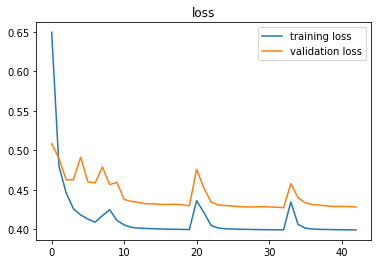

Plotting metrics...


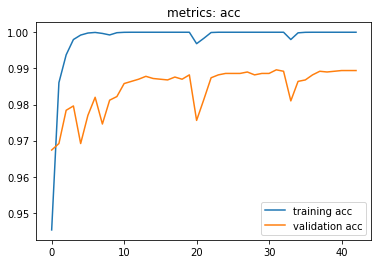

train {'acc': 1.0}
test {'acc': 0.987}

Training student with temperature = 10 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15698382026554088763
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 4058974885257138690
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 3.1687522 , acc = 0.41 
Epoch 1 , step 100 , loss= 1.0327287 , acc = 0.94 
Epoch 1 , step 200 , loss= 0.90168625 , acc = 0.98 
Epoch 1 , step 300 , loss= 0.9565254 , acc = 0.96 
Epoch 1 , step 400 , loss= 1.010284 , acc = 0.95 
Epoch 1 , step 500 , loss= 0.8728636 , acc = 0.99 
Epoch 1 , step 549 , loss= 0.8173404 val_loss= 0.87544817 , acc = 1.0 val acc = 0.9696 
Epoch 1 finished, loss= 0.9833992 val loss= 0.87544817 ,  acc = 0.9511273 val acc = 0.9696
val_acc improved. 
Epo

Epoch 17 , step 500 , loss= 0.8154885 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.8298387 val_loss= 0.81472373 , acc = 1.0 val acc = 0.987 
Epoch 17 finished, loss= 0.79896617 val loss= 0.81472373 ,  acc = 1.0 val acc = 0.987

Epoch 18 , step 50 , loss= 0.8242072 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.8134258 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.7954477 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.83597046 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.8031884 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.7915498 val_loss= 0.8142094 , acc = 1.0 val acc = 0.9878 
Epoch 18 finished, loss= 0.79860806 val loss= 0.8142094 ,  acc = 1.0 val acc = 0.9878
val_acc improved. 
Epoch 19 , step 0 , loss= 0.80572456 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.79904157 , acc = 1.0 
Epoch 19 , step 200 , loss= 0.7976063 , acc = 1.0 
Epoch 19 , step 300 , loss= 0.8168877 , acc = 1.0 
Epoch 19 , step 400 , loss= 0.8044568 , acc = 1.0 
Epoch 19 , step 500 , loss= 0.79753524 , acc = 1.0 
Epoch 19 , step 549

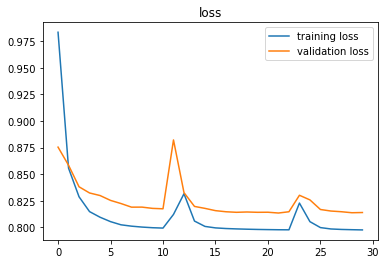

Plotting metrics...


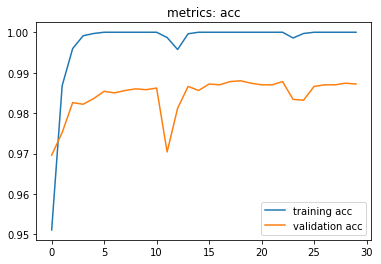

train {'acc': 1.0}
test {'acc': 0.9851}

Training student with temperature = 10 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16863288915628382103
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 5072287359354389913
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.9383252 , acc = 0.46 
Epoch 1 , step 100 , loss= 1.2823113 , acc = 0.96 
Epoch 1 , step 200 , loss= 1.2610201 , acc = 1.0 
Epoch 1 , step 300 , loss= 1.2724441 , acc = 0.98 
Epoch 1 , step 400 , loss= 1.4116883 , acc = 0.94 
Epoch 1 , step 500 , loss= 1.2366791 , acc = 0.98 
Epoch 1 , step 549 , loss= 1.2790209 val_loss= 1.2367709 , acc = 0.98 val acc = 0.9706 
Epoch 1 finished, loss= 1.3257049 val loss= 1.2367709 ,  acc = 0.95036364 val acc = 0.9706
val_acc improved. 
E

Epoch 17 , step 549 , loss= 1.1563044 val_loss= 1.1967996 , acc = 1.0 val acc = 0.9874 
Epoch 17 finished, loss= 1.1960199 val loss= 1.1967996 ,  acc = 1.0 val acc = 0.9874
val_acc improved. 
Epoch 18 , step 50 , loss= 1.2321926 , acc = 1.0 
Epoch 18 , step 150 , loss= 1.1223506 , acc = 1.0 
Epoch 18 , step 250 , loss= 1.2542574 , acc = 1.0 
Epoch 18 , step 350 , loss= 1.2533493 , acc = 1.0 
Epoch 18 , step 450 , loss= 1.1736945 , acc = 1.0 
Epoch 18 , step 549 , loss= 1.147256 val_loss= 1.1971791 , acc = 1.0 val acc = 0.9864 
Epoch 18 finished, loss= 1.1959218 val loss= 1.1971791 ,  acc = 1.0 val acc = 0.9864

Epoch 19 , step 0 , loss= 1.1462178 , acc = 1.0 
Epoch 19 , step 100 , loss= 1.1956173 , acc = 1.0 
Epoch 19 , step 200 , loss= 1.1385696 , acc = 1.0 
Epoch 19 , step 300 , loss= 1.2457602 , acc = 1.0 
Epoch 19 , step 400 , loss= 1.1549966 , acc = 1.0 
Epoch 19 , step 500 , loss= 1.1535127 , acc = 1.0 
Epoch 19 , step 549 , loss= 1.1794133 val_loss= 1.1981118 , acc = 1.0 val acc

Epoch 35 , step 549 , loss= 1.2392002 val_loss= 1.1959295 , acc = 1.0 val acc = 0.9868 
Epoch 35 finished, loss= 1.1951689 val loss= 1.1959295 ,  acc = 1.0 val acc = 0.9868

Epoch 36 , step 50 , loss= 1.2024597 , acc = 1.0 
Epoch 36 , step 150 , loss= 1.2528692 , acc = 1.0 
Epoch 36 , step 250 , loss= 1.174042 , acc = 1.0 
Epoch 36 , step 350 , loss= 1.1694034 , acc = 1.0 
Epoch 36 , step 450 , loss= 1.2312351 , acc = 1.0 
Epoch 36 , step 549 , loss= 1.2628938 val_loss= 1.1963812 , acc = 1.0 val acc = 0.9856 
Epoch 36 finished, loss= 1.1951188 val loss= 1.1963812 ,  acc = 1.0 val acc = 0.9856

Epoch 37 , step 0 , loss= 1.1732507 , acc = 1.0 
Epoch 37 , step 100 , loss= 1.1581551 , acc = 1.0 
Epoch 37 , step 200 , loss= 1.2407019 , acc = 1.0 
Epoch 37 , step 300 , loss= 1.2432636 , acc = 1.0 
Epoch 37 , step 400 , loss= 1.1835715 , acc = 1.0 
Epoch 37 , step 500 , loss= 1.1590992 , acc = 1.0 
Epoch 37 , step 549 , loss= 1.1249459 val_loss= 1.1968405 , acc = 1.0 val acc = 0.9866 
Epoch 3

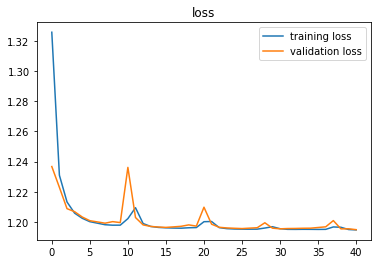

Plotting metrics...


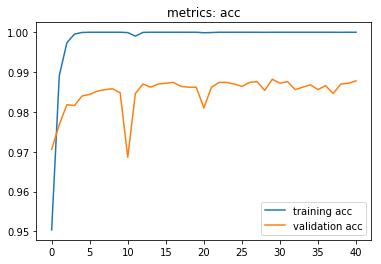

train {'acc': 1.0}
test {'acc': 0.9856}

Training student with temperature = 10 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11980027271672675727
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 6980544203408190447
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.337595 , acc = 0.6 
Epoch 1 , step 100 , loss= 1.5631301 , acc = 0.9 
Epoch 1 , step 200 , loss= 1.6501573 , acc = 0.98 
Epoch 1 , step 300 , loss= 1.5952775 , acc = 0.97 
Epoch 1 , step 400 , loss= 1.6292715 , acc = 0.99 
Epoch 1 , step 500 , loss= 1.5898309 , acc = 0.98 
Epoch 1 , step 549 , loss= 1.5366901 val_loss= 1.589499 , acc = 1.0 val acc = 0.9716 
Epoch 1 finished, loss= 1.6375802 val loss= 1.589499 ,  acc = 0.9450546 val acc = 0.9716
val_acc improved. 
Epoch 2 ,

Epoch 17 , step 500 , loss= 1.5964532 , acc = 0.99 
Epoch 17 , step 549 , loss= 1.5480819 val_loss= 1.5779752 , acc = 1.0 val acc = 0.984 
Epoch 17 finished, loss= 1.5931115 val loss= 1.5779752 ,  acc = 0.99307275 val acc = 0.984

Epoch 18 , step 50 , loss= 1.5675905 , acc = 1.0 
Epoch 18 , step 150 , loss= 1.5960088 , acc = 0.99 
Epoch 18 , step 250 , loss= 1.5618519 , acc = 0.99 
Epoch 18 , step 350 , loss= 1.5074795 , acc = 0.99 
Epoch 18 , step 450 , loss= 1.5081846 , acc = 0.99 
Epoch 18 , step 549 , loss= 1.5091846 val_loss= 1.5780755 , acc = 1.0 val acc = 0.9846 
Epoch 18 finished, loss= 1.5930675 val loss= 1.5780755 ,  acc = 0.9931454 val acc = 0.9846

Epoch 19 , step 0 , loss= 1.6377821 , acc = 1.0 
Epoch 19 , step 100 , loss= 1.5931898 , acc = 0.99 
Epoch 19 , step 200 , loss= 1.5504806 , acc = 0.99 
Epoch 19 , step 300 , loss= 1.5827053 , acc = 0.99 
Epoch 19 , step 400 , loss= 1.5921602 , acc = 1.0 
Epoch 19 , step 500 , loss= 1.6430467 , acc = 0.99 
Epoch 19 , step 549 , l

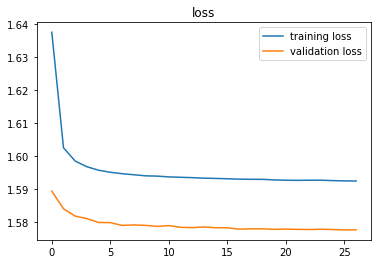

Plotting metrics...


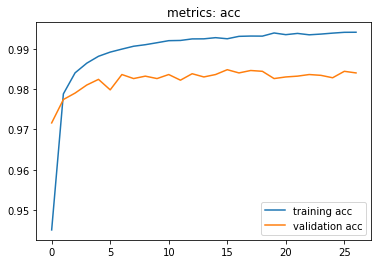

train {'acc': 0.9935455}
test {'acc': 0.9818}

Training student with temperature = 15 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7301810183303257308
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 16329410840986582809
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 5.3335423 , acc = 0.37 
Epoch 1 , step 100 , loss= 0.18126623 , acc = 0.94 
Epoch 1 , step 200 , loss= 0.110981196 , acc = 0.99 
Epoch 1 , step 300 , loss= 0.15100405 , acc = 0.96 
Epoch 1 , step 400 , loss= 0.1510145 , acc = 0.98 
Epoch 1 , step 500 , loss= 0.12335304 , acc = 0.97 
Epoch 1 , step 549 , loss= 0.12515114 val_loss= 0.10092067 , acc = 0.98 val acc = 0.9692 
Epoch 1 finished, loss= 0.25041285 val loss= 0.10092067 ,  acc = 0.9483272 val acc = 0.9692
val_acc

Epoch 17 , step 100 , loss= 0.012673468 , acc = 1.0 
Epoch 17 , step 200 , loss= 0.00049509056 , acc = 1.0 
Epoch 17 , step 300 , loss= 0.049326193 , acc = 1.0 
Epoch 17 , step 400 , loss= 0.0006527603 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.024755038 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.01668366 val_loss= 0.12076712 , acc = 1.0 val acc = 0.9784 
Epoch 17 finished, loss= 0.009452473 val loss= 0.12076712 ,  acc = 0.9997636 val acc = 0.9784

Epoch 18 , step 50 , loss= 0.0001435793 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.02691238 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.0037679893 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.0152110895 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.017372236 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.0003324751 val_loss= 0.10096871 , acc = 1.0 val acc = 0.9818 
Epoch 18 finished, loss= 0.010920468 val loss= 0.10096871 ,  acc = 0.999709 val acc = 0.9818

Epoch 19 , step 0 , loss= 4.2941974e-05 , acc = 1.0 
Epoch 19 , step 100 , loss= 6.9910966e-05 

Epoch 34 , step 50 , loss= 0.00035914517 , acc = 1.0 
Epoch 34 , step 150 , loss= 0.00096974825 , acc = 1.0 
Epoch 34 , step 250 , loss= 1.0096828e-06 , acc = 1.0 
Epoch 34 , step 350 , loss= 0.00066339807 , acc = 1.0 
Epoch 34 , step 450 , loss= 0.01776549 , acc = 1.0 
Epoch 34 , step 549 , loss= 0.00016073658 val_loss= 0.16159792 , acc = 1.0 val acc = 0.9814 
Epoch 34 finished, loss= 0.005282414 val loss= 0.16159792 ,  acc = 0.9999272 val acc = 0.9814

Epoch 35 , step 0 , loss= 2.1966305e-05 , acc = 1.0 
Epoch 35 , step 100 , loss= 0.092986315 , acc = 0.99 
Epoch 35 , step 200 , loss= 0.0077355397 , acc = 1.0 
Epoch 35 , step 300 , loss= 2.4953724e-05 , acc = 1.0 
Epoch 35 , step 400 , loss= 0.00044604196 , acc = 1.0 
Epoch 35 , step 500 , loss= 8.043921e-06 , acc = 1.0 
Epoch 35 , step 549 , loss= 0.0007176282 val_loss= 0.14352334 , acc = 1.0 val acc = 0.98 
Epoch 35 finished, loss= 0.0125466585 val loss= 0.14352334 ,  acc = 0.99972725 val acc = 0.98

Stop training, val_acc didn't i

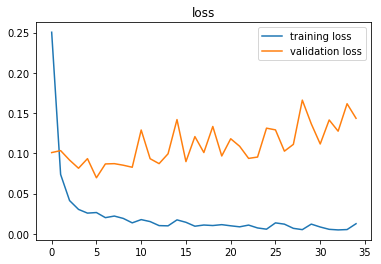

Plotting metrics...


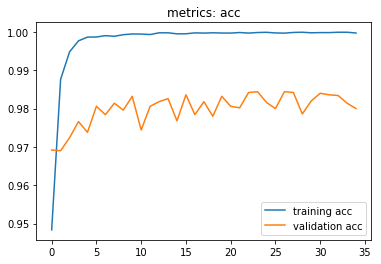

train {'acc': 0.99576366}
test {'acc': 0.9778}

Training student with temperature = 15 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4314524186769103191
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 2658307039058319217
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 6.459279 , acc = 0.26 
Epoch 1 , step 100 , loss= 0.8016544 , acc = 0.93 
Epoch 1 , step 200 , loss= 0.6559535 , acc = 0.95 
Epoch 1 , step 300 , loss= 0.698003 , acc = 0.96 
Epoch 1 , step 400 , loss= 0.6289808 , acc = 0.96 
Epoch 1 , step 500 , loss= 0.6047818 , acc = 0.98 
Epoch 1 , step 549 , loss= 0.5869651 val_loss= 0.5924791 , acc = 0.99 val acc = 0.9696 
Epoch 1 finished, loss= 0.7227476 val loss= 0.5924791 ,  acc = 0.94492733 val acc = 0.9696
val_acc improve

Epoch 17 , step 400 , loss= 0.49148822 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.48511076 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.48051548 val_loss= 0.5274247 , acc = 1.0 val acc = 0.9876 
Epoch 17 finished, loss= 0.4907139 val loss= 0.5274247 ,  acc = 0.9999272 val acc = 0.9876
val_acc improved. 
Epoch 18 , step 50 , loss= 0.47700265 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.47355232 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.4982679 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.49272475 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.50596416 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.49421424 val_loss= 0.52389765 , acc = 1.0 val acc = 0.9876 
Epoch 18 finished, loss= 0.48724216 val loss= 0.52389765 ,  acc = 1.0 val acc = 0.9876

Epoch 19 , step 0 , loss= 0.48425534 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.49486855 , acc = 1.0 
Epoch 19 , step 200 , loss= 0.463743 , acc = 1.0 
Epoch 19 , step 300 , loss= 0.503173 , acc = 1.0 
Epoch 19 , step 400 , loss= 0.48851824 , acc = 1.0 
Epoch 1

Epoch 35 , step 200 , loss= 0.4910653 , acc = 1.0 
Epoch 35 , step 300 , loss= 0.48753038 , acc = 1.0 
Epoch 35 , step 400 , loss= 0.47965416 , acc = 1.0 
Epoch 35 , step 500 , loss= 0.4923607 , acc = 1.0 
Epoch 35 , step 549 , loss= 0.4847763 val_loss= 0.5203194 , acc = 1.0 val acc = 0.9868 
Epoch 35 finished, loss= 0.48576316 val loss= 0.5203194 ,  acc = 1.0 val acc = 0.9868

Epoch 36 , step 50 , loss= 0.49534422 , acc = 1.0 
Epoch 36 , step 150 , loss= 0.48143515 , acc = 1.0 
Epoch 36 , step 250 , loss= 0.48267165 , acc = 1.0 
Epoch 36 , step 350 , loss= 0.4940574 , acc = 1.0 
Epoch 36 , step 450 , loss= 0.4762546 , acc = 1.0 
Epoch 36 , step 549 , loss= 0.4812211 val_loss= 0.5194771 , acc = 1.0 val acc = 0.9874 
Epoch 36 finished, loss= 0.4856669 val loss= 0.5194771 ,  acc = 1.0 val acc = 0.9874

Epoch 37 , step 0 , loss= 0.4753551 , acc = 1.0 
Epoch 37 , step 100 , loss= 0.48037288 , acc = 1.0 
Epoch 37 , step 200 , loss= 0.48328736 , acc = 1.0 
Epoch 37 , step 300 , loss= 0.48756

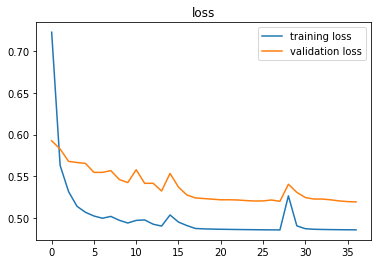

Plotting metrics...


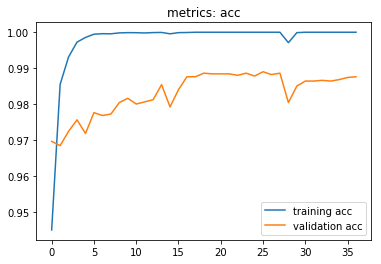

train {'acc': 1.0}
test {'acc': 0.9852}

Training student with temperature = 15 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14456831890766763875
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 7024233502035824489
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 3.7554512 , acc = 0.38 
Epoch 1 , step 100 , loss= 1.0645969 , acc = 0.99 
Epoch 1 , step 200 , loss= 1.079168 , acc = 0.96 
Epoch 1 , step 300 , loss= 1.220365 , acc = 0.92 
Epoch 1 , step 400 , loss= 1.0682632 , acc = 0.99 
Epoch 1 , step 500 , loss= 1.0538002 , acc = 0.97 
Epoch 1 , step 549 , loss= 1.0562285 val_loss= 1.0561835 , acc = 0.97 val acc = 0.965 
Epoch 1 finished, loss= 1.1478424 val loss= 1.0561835 ,  acc = 0.9481273 val acc = 0.965
val_acc improved. 
Epoch 2

Epoch 17 , step 549 , loss= 0.9908011 val_loss= 0.99480265 , acc = 1.0 val acc = 0.9868 
Epoch 17 finished, loss= 0.97379947 val loss= 0.99480265 ,  acc = 0.9999818 val acc = 0.9868

Epoch 18 , step 50 , loss= 0.98873425 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.95479435 , acc = 1.0 
Epoch 18 , step 250 , loss= 1.0014611 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.9790951 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.9673601 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.9952187 val_loss= 0.9933046 , acc = 1.0 val acc = 0.9874 
Epoch 18 finished, loss= 0.97221833 val loss= 0.9933046 ,  acc = 1.0 val acc = 0.9874

Epoch 19 , step 0 , loss= 0.9798907 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.96916866 , acc = 1.0 
Epoch 19 , step 200 , loss= 0.97671974 , acc = 1.0 
Epoch 19 , step 300 , loss= 1.0122305 , acc = 1.0 
Epoch 19 , step 400 , loss= 0.93357795 , acc = 1.0 
Epoch 19 , step 500 , loss= 0.97496206 , acc = 1.0 
Epoch 19 , step 549 , loss= 0.9592718 val_loss= 0.99258775 , acc = 1.0 val acc

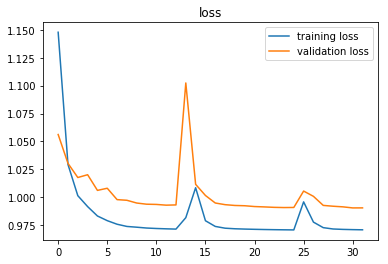

Plotting metrics...


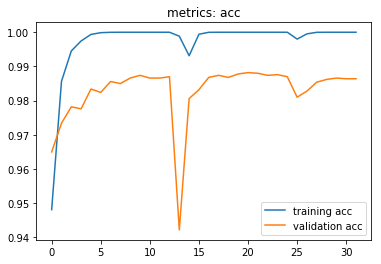

train {'acc': 1.0}
test {'acc': 0.9862}

Training student with temperature = 15 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5495341153207017166
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 15981522546489770322
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.9469912 , acc = 0.36 
Epoch 1 , step 100 , loss= 1.6334571 , acc = 0.92 
Epoch 1 , step 200 , loss= 1.507253 , acc = 0.98 
Epoch 1 , step 300 , loss= 1.4907966 , acc = 0.99 
Epoch 1 , step 400 , loss= 1.5179007 , acc = 0.96 
Epoch 1 , step 500 , loss= 1.4992859 , acc = 0.98 
Epoch 1 , step 549 , loss= 1.5216469 val_loss= 1.5001162 , acc = 0.99 val acc = 0.97 
Epoch 1 finished, loss= 1.5701953 val loss= 1.5001162 ,  acc = 0.94820005 val acc = 0.97
val_acc improved. 
Epoch

Epoch 18 , step 50 , loss= 1.3938823 , acc = 1.0 
Epoch 18 , step 150 , loss= 1.4720039 , acc = 1.0 
Epoch 18 , step 250 , loss= 1.463022 , acc = 1.0 
Epoch 18 , step 350 , loss= 1.4367862 , acc = 1.0 
Epoch 18 , step 450 , loss= 1.4539236 , acc = 1.0 
Epoch 18 , step 549 , loss= 1.4520324 val_loss= 1.46189 , acc = 1.0 val acc = 0.9872 
Epoch 18 finished, loss= 1.4557233 val loss= 1.46189 ,  acc = 1.0 val acc = 0.9872
val_acc improved. 
Epoch 19 , step 0 , loss= 1.4225235 , acc = 1.0 
Epoch 19 , step 100 , loss= 1.4725779 , acc = 1.0 
Epoch 19 , step 200 , loss= 1.4675943 , acc = 1.0 
Epoch 19 , step 300 , loss= 1.4429871 , acc = 1.0 
Epoch 19 , step 400 , loss= 1.4483074 , acc = 1.0 
Epoch 19 , step 500 , loss= 1.425879 , acc = 1.0 
Epoch 19 , step 549 , loss= 1.4228581 val_loss= 1.4618537 , acc = 1.0 val acc = 0.9878 
Epoch 19 finished, loss= 1.4555882 val loss= 1.4618537 ,  acc = 1.0 val acc = 0.9878
val_acc improved. 
Epoch 20 , step 50 , loss= 1.4726049 , acc = 1.0 
Epoch 20 , ste

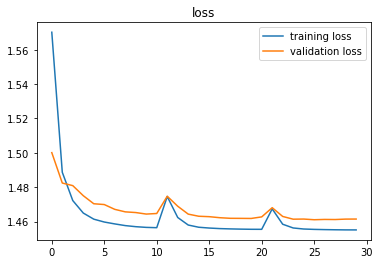

Plotting metrics...


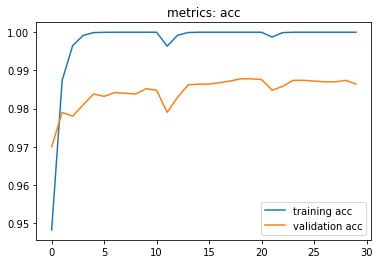

train {'acc': 1.0}
test {'acc': 0.985}

Training student with temperature = 15 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2341169318598296717
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 10870918224381946764
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3333457 , acc = 0.33 
Epoch 1 , step 100 , loss= 1.9989171 , acc = 0.93 
Epoch 1 , step 200 , loss= 1.9635777 , acc = 0.96 
Epoch 1 , step 300 , loss= 1.9622982 , acc = 0.97 
Epoch 1 , step 400 , loss= 1.9126087 , acc = 0.95 
Epoch 1 , step 500 , loss= 1.9733738 , acc = 0.98 
Epoch 1 , step 549 , loss= 1.928695 val_loss= 1.9378206 , acc = 0.99 val acc = 0.9686 
Epoch 1 finished, loss= 1.9647883 val loss= 1.9378206 ,  acc = 0.9390727 val acc = 0.9686
val_acc improved. 
Epoch

Epoch 17 , step 500 , loss= 1.9434985 , acc = 0.99 
Epoch 17 , step 549 , loss= 1.901801 val_loss= 1.9322902 , acc = 1.0 val acc = 0.9828 
Epoch 17 finished, loss= 1.9396223 val loss= 1.9322902 ,  acc = 0.9925273 val acc = 0.9828

Epoch 18 , step 50 , loss= 1.9549412 , acc = 0.99 
Epoch 18 , step 150 , loss= 1.9637327 , acc = 1.0 
Epoch 18 , step 250 , loss= 1.9442695 , acc = 0.99 
Epoch 18 , step 350 , loss= 1.9058089 , acc = 1.0 
Epoch 18 , step 450 , loss= 1.9363532 , acc = 1.0 
Epoch 18 , step 549 , loss= 1.9505937 val_loss= 1.9321201 , acc = 1.0 val acc = 0.9828 
Epoch 18 finished, loss= 1.9395974 val loss= 1.9321201 ,  acc = 0.99281806 val acc = 0.9828

Epoch 19 , step 0 , loss= 1.970749 , acc = 0.99 
Epoch 19 , step 100 , loss= 1.8884321 , acc = 1.0 
Epoch 19 , step 200 , loss= 1.9208854 , acc = 1.0 
Epoch 19 , step 300 , loss= 1.9455233 , acc = 1.0 
Epoch 19 , step 400 , loss= 1.900529 , acc = 0.99 
Epoch 19 , step 500 , loss= 1.9822136 , acc = 0.99 
Epoch 19 , step 549 , loss=

Epoch 35 , step 300 , loss= 1.9444647 , acc = 1.0 
Epoch 35 , step 400 , loss= 1.9560302 , acc = 1.0 
Epoch 35 , step 500 , loss= 1.9088502 , acc = 0.99 
Epoch 35 , step 549 , loss= 1.936037 val_loss= 1.931975 , acc = 0.99 val acc = 0.9824 
Epoch 35 finished, loss= 1.9391384 val loss= 1.931975 ,  acc = 0.9942909 val acc = 0.9824

Epoch 36 , step 50 , loss= 1.9802611 , acc = 0.99 
Epoch 36 , step 150 , loss= 2.0072653 , acc = 0.97 
Epoch 36 , step 250 , loss= 1.9425246 , acc = 0.99 
Epoch 36 , step 350 , loss= 1.9148697 , acc = 0.99 
Epoch 36 , step 450 , loss= 1.8851209 , acc = 1.0 
Epoch 36 , step 549 , loss= 1.9857154 val_loss= 1.9318203 , acc = 1.0 val acc = 0.983 
Epoch 36 finished, loss= 1.9391387 val loss= 1.9318203 ,  acc = 0.993909 val acc = 0.983

Epoch 37 , step 0 , loss= 1.9892583 , acc = 0.99 
Epoch 37 , step 100 , loss= 1.9527011 , acc = 1.0 
Epoch 37 , step 200 , loss= 1.9599292 , acc = 1.0 
Epoch 37 , step 300 , loss= 1.9514002 , acc = 1.0 
Epoch 37 , step 400 , loss= 1.

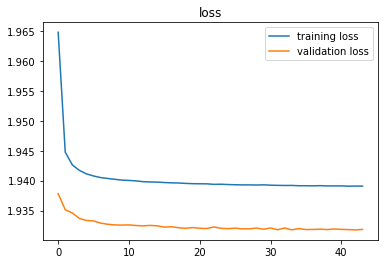

Plotting metrics...


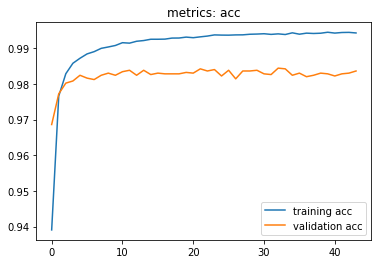

train {'acc': 0.9941273}
test {'acc': 0.9817}

Training student with temperature = 20 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7296213490479921794
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 15380281051842149188
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 5.637979 , acc = 0.3 
Epoch 1 , step 100 , loss= 0.18694422 , acc = 0.95 
Epoch 1 , step 200 , loss= 0.1286188 , acc = 0.97 
Epoch 1 , step 300 , loss= 0.09595873 , acc = 0.98 
Epoch 1 , step 400 , loss= 0.11387358 , acc = 0.99 
Epoch 1 , step 500 , loss= 0.114833966 , acc = 0.98 
Epoch 1 , step 549 , loss= 0.1115787 val_loss= 0.10517912 , acc = 0.99 val acc = 0.9694 
Epoch 1 finished, loss= 0.2349381 val loss= 0.10517912 ,  acc = 0.95025456 val acc = 0.9694
val_acc im

Epoch 17 , step 100 , loss= 0.10484178 , acc = 0.99 
Epoch 17 , step 200 , loss= 0.008297825 , acc = 1.0 
Epoch 17 , step 300 , loss= 0.005342499 , acc = 1.0 
Epoch 17 , step 400 , loss= 0.0076215877 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.012852348 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.00012044649 val_loss= 0.10980385 , acc = 1.0 val acc = 0.9802 
Epoch 17 finished, loss= 0.012173249 val loss= 0.10980385 ,  acc = 0.99969083 val acc = 0.9802

Epoch 18 , step 50 , loss= 0.0008641816 , acc = 1.0 
Epoch 18 , step 150 , loss= 9.033467e-05 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.013510826 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.0017723623 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.00012301911 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.004149627 val_loss= 0.12955508 , acc = 1.0 val acc = 0.9762 
Epoch 18 finished, loss= 0.015377749 val loss= 0.12955508 ,  acc = 0.9995273 val acc = 0.9762

Epoch 19 , step 0 , loss= 0.000683789 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.000399474

Epoch 34 , step 50 , loss= 0.00011274029 , acc = 1.0 
Epoch 34 , step 150 , loss= 0.00029786618 , acc = 1.0 
Epoch 34 , step 250 , loss= 5.137146e-05 , acc = 1.0 
Epoch 34 , step 350 , loss= 5.1339775e-06 , acc = 1.0 
Epoch 34 , step 450 , loss= 0.040230766 , acc = 1.0 
Epoch 34 , step 549 , loss= 0.014022363 val_loss= 0.17076258 , acc = 1.0 val acc = 0.9812 
Epoch 34 finished, loss= 0.0051623615 val loss= 0.17076258 ,  acc = 0.999909 val acc = 0.9812

Stop training, val_acc didn't improve more than 10 epoch. 
Student performance with {'coef_softloss': 0.0, 'coef_hardloss': 1.0, 'temperature': 20, 'temperature_effect': 1, 'train_acc': 0.9974727, 'test_acc': 0.977}
Plotting loss...


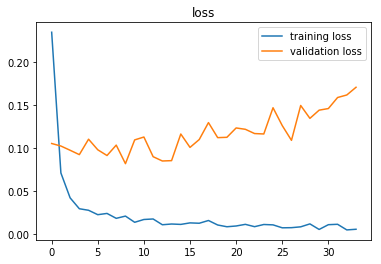

Plotting metrics...


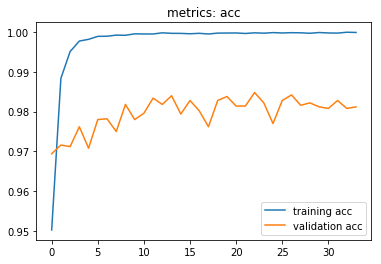

train {'acc': 0.9974727}
test {'acc': 0.977}

Training student with temperature = 20 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16903358655829204299
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 5908176749281359274
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 3.870946 , acc = 0.4 
Epoch 1 , step 100 , loss= 0.7895826 , acc = 0.91 
Epoch 1 , step 200 , loss= 0.70158935 , acc = 0.95 
Epoch 1 , step 300 , loss= 0.6215535 , acc = 0.96 
Epoch 1 , step 400 , loss= 0.70872474 , acc = 0.91 
Epoch 1 , step 500 , loss= 0.5960562 , acc = 0.98 
Epoch 1 , step 549 , loss= 0.6353973 val_loss= 0.6235735 , acc = 0.98 val acc = 0.968 
Epoch 1 finished, loss= 0.71513116 val loss= 0.6235735 ,  acc = 0.9531272 val acc = 0.968
val_acc improved

Epoch 17 , step 500 , loss= 0.52165693 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.530516 val_loss= 0.56176615 , acc = 1.0 val acc = 0.9866 
Epoch 17 finished, loss= 0.5244416 val loss= 0.56176615 ,  acc = 1.0 val acc = 0.9866

Epoch 18 , step 50 , loss= 0.52180624 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.52005965 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.5189502 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.5325706 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.5353373 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.5208377 val_loss= 0.5606691 , acc = 1.0 val acc = 0.9872 
Epoch 18 finished, loss= 0.52431625 val loss= 0.5606691 ,  acc = 1.0 val acc = 0.9872
val_acc improved. 
Epoch 19 , step 0 , loss= 0.5294643 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.5167488 , acc = 1.0 
Epoch 19 , step 200 , loss= 0.52666706 , acc = 1.0 
Epoch 19 , step 300 , loss= 0.52449965 , acc = 1.0 
Epoch 19 , step 400 , loss= 0.5346954 , acc = 1.0 
Epoch 19 , step 500 , loss= 0.5290031 , acc = 1.0 
Epoch 19 , step 54

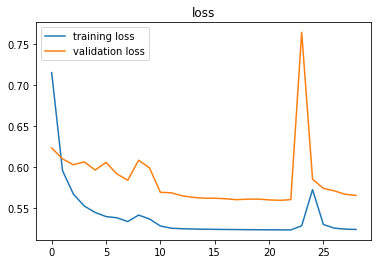

Plotting metrics...


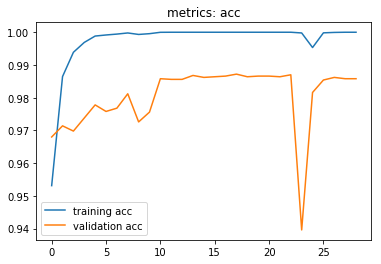

train {'acc': 1.0}
test {'acc': 0.9855}

Training student with temperature = 20 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14881611615308170088
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 17810580986719568103
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 3.965907 , acc = 0.29 
Epoch 1 , step 100 , loss= 1.2130873 , acc = 0.93 
Epoch 1 , step 200 , loss= 1.1827879 , acc = 0.96 
Epoch 1 , step 300 , loss= 1.2434667 , acc = 0.95 
Epoch 1 , step 400 , loss= 1.137837 , acc = 0.97 
Epoch 1 , step 500 , loss= 1.1620013 , acc = 0.98 
Epoch 1 , step 549 , loss= 1.1315874 val_loss= 1.1263579 , acc = 0.97 val acc = 0.9652 
Epoch 1 finished, loss= 1.2085862 val loss= 1.1263579 ,  acc = 0.9493637 val acc = 0.9652
val_acc improved. 
Epoc

Epoch 18 , step 50 , loss= 1.0418555 , acc = 1.0 
Epoch 18 , step 150 , loss= 1.0580465 , acc = 1.0 
Epoch 18 , step 250 , loss= 1.0291362 , acc = 1.0 
Epoch 18 , step 350 , loss= 1.0403099 , acc = 1.0 
Epoch 18 , step 450 , loss= 1.0285828 , acc = 1.0 
Epoch 18 , step 549 , loss= 1.0511844 val_loss= 1.0682398 , acc = 1.0 val acc = 0.9868 
Epoch 18 finished, loss= 1.0475895 val loss= 1.0682398 ,  acc = 1.0 val acc = 0.9868

Epoch 19 , step 0 , loss= 1.0616072 , acc = 1.0 
Epoch 19 , step 100 , loss= 1.0581183 , acc = 1.0 
Epoch 19 , step 200 , loss= 1.008846 , acc = 1.0 
Epoch 19 , step 300 , loss= 1.0100977 , acc = 1.0 
Epoch 19 , step 400 , loss= 1.0398241 , acc = 1.0 
Epoch 19 , step 500 , loss= 1.0388083 , acc = 1.0 
Epoch 19 , step 549 , loss= 1.0446873 val_loss= 1.0704702 , acc = 1.0 val acc = 0.9854 
Epoch 19 finished, loss= 1.047499 val loss= 1.0704702 ,  acc = 1.0 val acc = 0.9854

Epoch 20 , step 50 , loss= 1.1544251 , acc = 1.0 
Epoch 20 , step 150 , loss= 1.187751 , acc = 0

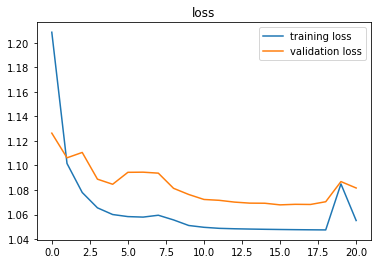

Plotting metrics...


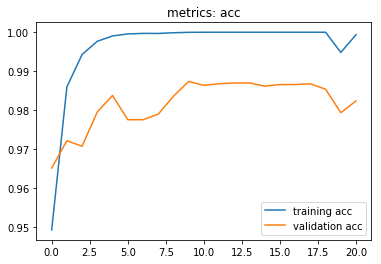

train {'acc': 0.99863636}
test {'acc': 0.982}

Training student with temperature = 20 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16087917901484964596
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 6462317298244232858
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.6226177 , acc = 0.26 
Epoch 1 , step 100 , loss= 1.6851733 , acc = 0.94 
Epoch 1 , step 200 , loss= 1.5952566 , acc = 0.98 
Epoch 1 , step 300 , loss= 1.6338607 , acc = 0.97 
Epoch 1 , step 400 , loss= 1.6956799 , acc = 0.93 
Epoch 1 , step 500 , loss= 1.6320267 , acc = 0.98 
Epoch 1 , step 549 , loss= 1.6157714 val_loss= 1.6103365 , acc = 0.98 val acc = 0.9706 
Epoch 1 finished, loss= 1.6686672 val loss= 1.6103365 ,  acc = 0.94876367 val acc = 0.9706
val_acc impro

Epoch 18 , step 50 , loss= 1.5589471 , acc = 1.0 
Epoch 18 , step 150 , loss= 1.5817162 , acc = 1.0 
Epoch 18 , step 250 , loss= 1.5396754 , acc = 1.0 
Epoch 18 , step 350 , loss= 1.591122 , acc = 1.0 
Epoch 18 , step 450 , loss= 1.5764725 , acc = 1.0 
Epoch 18 , step 549 , loss= 1.5489926 val_loss= 1.5800549 , acc = 1.0 val acc = 0.9864 
Epoch 18 finished, loss= 1.5709387 val loss= 1.5800549 ,  acc = 1.0 val acc = 0.9864

Epoch 19 , step 0 , loss= 1.5808517 , acc = 1.0 
Epoch 19 , step 100 , loss= 1.5587001 , acc = 1.0 
Epoch 19 , step 200 , loss= 1.5780249 , acc = 1.0 
Epoch 19 , step 300 , loss= 1.60136 , acc = 1.0 
Epoch 19 , step 400 , loss= 1.547276 , acc = 1.0 
Epoch 19 , step 500 , loss= 1.5719262 , acc = 1.0 
Epoch 19 , step 549 , loss= 1.5515169 val_loss= 1.5801114 , acc = 1.0 val acc = 0.9866 
Epoch 19 finished, loss= 1.570835 val loss= 1.5801114 ,  acc = 1.0 val acc = 0.9866

Epoch 20 , step 50 , loss= 1.5583491 , acc = 1.0 
Epoch 20 , step 150 , loss= 1.5478345 , acc = 1.0

Epoch 36 , step 150 , loss= 1.5527928 , acc = 1.0 
Epoch 36 , step 250 , loss= 1.5870003 , acc = 1.0 
Epoch 36 , step 350 , loss= 1.5569055 , acc = 1.0 
Epoch 36 , step 450 , loss= 1.5426843 , acc = 1.0 
Epoch 36 , step 549 , loss= 1.5605652 val_loss= 1.579769 , acc = 1.0 val acc = 0.9872 
Epoch 36 finished, loss= 1.5704346 val loss= 1.579769 ,  acc = 1.0 val acc = 0.9872

Epoch 37 , step 0 , loss= 1.5937967 , acc = 1.0 
Epoch 37 , step 100 , loss= 1.5677125 , acc = 1.0 
Epoch 37 , step 200 , loss= 1.5629892 , acc = 1.0 
Epoch 37 , step 300 , loss= 1.5527318 , acc = 1.0 
Epoch 37 , step 400 , loss= 1.5879915 , acc = 1.0 
Epoch 37 , step 500 , loss= 1.5959266 , acc = 1.0 
Epoch 37 , step 549 , loss= 1.5664475 val_loss= 1.5897399 , acc = 1.0 val acc = 0.98 
Epoch 37 finished, loss= 1.5772731 val loss= 1.5897399 ,  acc = 0.9992363 val acc = 0.98

Stop training, val_acc didn't improve more than 10 epoch. 
Student performance with {'coef_softloss': 0.75, 'coef_hardloss': 0.25, 'temperature'

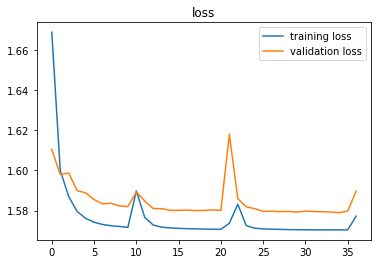

Plotting metrics...


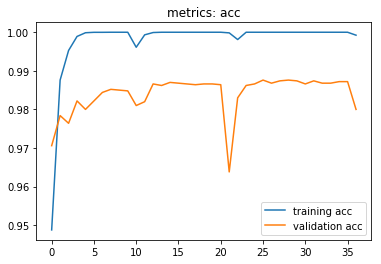

train {'acc': 0.99445456}
test {'acc': 0.9817}

Training student with temperature = 20 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14771386392159658826
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 3617688852009098874
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3131342 , acc = 0.26 
Epoch 1 , step 100 , loss= 2.1122775 , acc = 0.93 
Epoch 1 , step 200 , loss= 2.1001942 , acc = 0.95 
Epoch 1 , step 300 , loss= 2.135069 , acc = 0.93 
Epoch 1 , step 400 , loss= 2.1123257 , acc = 0.98 
Epoch 1 , step 500 , loss= 2.1026711 , acc = 0.93 
Epoch 1 , step 549 , loss= 2.0982757 val_loss= 2.0928748 , acc = 1.0 val acc = 0.9704 
Epoch 1 finished, loss= 2.1082006 val loss= 2.0928748 ,  acc = 0.9376728 val acc = 0.9704
val_acc improved.

Epoch 17 , step 549 , loss= 2.090708 val_loss= 2.0892842 , acc = 0.99 val acc = 0.983 
Epoch 17 finished, loss= 2.0935204 val loss= 2.0892842 ,  acc = 0.9925273 val acc = 0.983
val_acc improved. 
Epoch 18 , step 50 , loss= 2.0845013 , acc = 1.0 
Epoch 18 , step 150 , loss= 2.0861268 , acc = 0.98 
Epoch 18 , step 250 , loss= 2.107061 , acc = 0.99 
Epoch 18 , step 350 , loss= 2.105504 , acc = 0.98 
Epoch 18 , step 450 , loss= 2.0849853 , acc = 0.98 
Epoch 18 , step 549 , loss= 2.1108913 val_loss= 2.0892515 , acc = 0.98 val acc = 0.9824 
Epoch 18 finished, loss= 2.0934823 val loss= 2.0892515 ,  acc = 0.9927637 val acc = 0.9824

Epoch 19 , step 0 , loss= 2.1149652 , acc = 1.0 
Epoch 19 , step 100 , loss= 2.1112733 , acc = 0.98 
Epoch 19 , step 200 , loss= 2.065711 , acc = 1.0 
Epoch 19 , step 300 , loss= 2.0812197 , acc = 0.99 
Epoch 19 , step 400 , loss= 2.0705042 , acc = 0.99 
Epoch 19 , step 500 , loss= 2.0962234 , acc = 0.98 
Epoch 19 , step 549 , loss= 2.0965533 val_loss= 2.0893037 , 

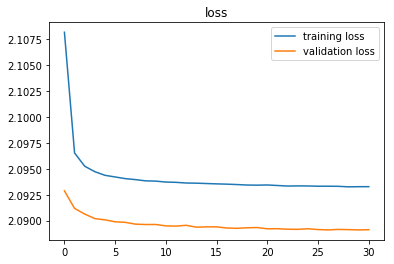

Plotting metrics...


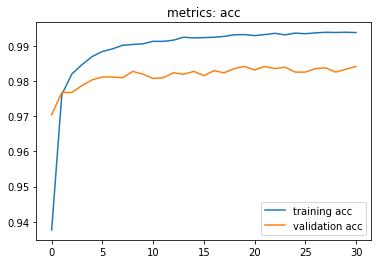

train {'acc': 0.9942}
test {'acc': 0.9809}

{2: [{'acc': 0.9827}, {'acc': 0.986}, {'acc': 0.9853}, {'acc': 0.9842}, {'acc': 0.9839}], 4: [{'acc': 0.9794}, {'acc': 0.9856}, {'acc': 0.986}, {'acc': 0.9848}, {'acc': 0.9831}], 6: [{'acc': 0.976}, {'acc': 0.9846}, {'acc': 0.9854}, {'acc': 0.9855}, {'acc': 0.9829}], 8: [{'acc': 0.979}, {'acc': 0.9874}, {'acc': 0.9783}, {'acc': 0.985}, {'acc': 0.9825}], 10: [{'acc': 0.9791}, {'acc': 0.987}, {'acc': 0.9851}, {'acc': 0.9856}, {'acc': 0.9818}], 15: [{'acc': 0.9778}, {'acc': 0.9852}, {'acc': 0.9862}, {'acc': 0.985}, {'acc': 0.9817}], 20: [{'acc': 0.977}, {'acc': 0.9855}, {'acc': 0.982}, {'acc': 0.9817}, {'acc': 0.9809}]}
    coef_hardloss  coef_softloss  temperature  temperature_effect  test_acc  \
0            1.00           0.00            2                   1    0.9827   
1            0.75           0.25            2                   1    0.9860   
2            0.50           0.50            2                   1    0.9853   
3            0.

In [14]:
# df_exp = pd.DataFrame(columns = ['coef_softloss', 'temperature', 'temperature_effect', 'acc'])

list_exp = []
train_metrics = {}
test_metrics = {}
for temperature in temperatures:
    set_rand_seed(0)
    # initialize metrics
    train_metrics[temperature] = []
    test_metrics[temperature] = []
    # prepare softened data
    y_train_soft = teacher.predict_softened(X_train, temperature)
    y_val_soft = teacher.predict_softened(X_val, temperature)
    y_test_soft = teacher.predict_softened(X_test, temperature)
    
    tmp_effect = 1 # [1/temperature**2, 1, temperature**2]
    for coef_softloss in coef_soft_losses:
        coef_hardloss = 1-coef_softloss
        
        print('Training student with temperature =',temperature,
              ', coef_softloss =',coef_softloss,', coef_hardloss =',coef_hardloss,
              ',tmp_effect =', tmp_effect,'. ')
        # build network architecture
#         student = build_small_model(input_dims, output_dims, session, is_student=True)
        student = build_small_model(input_dims, output_dims, is_student=True, gpu_id=gpu_id)
        # train network
        student.soft_train(
            X=X_train
            ,y=y_train
            ,y_soft=y_train_soft
            ,temperature=temperature
            ,coef_softloss= coef_softloss*tmp_effect# * temperature**2
            ,coef_hardloss= coef_hardloss
            ,val_set=[X_val,y_val,y_val_soft]
            ,batch_size=100
            ,n_epochs=100
            ,display_steps=100
            ,earlystop_params={'monitor':'val_acc', 'patience':10}
        )
        train_metric = student.get_metrics(X_train, y_train)
        test_metric = student.get_metrics(X_test, y_test)
        dict_exp = {'coef_softloss':coef_softloss, 'coef_hardloss':coef_hardloss, 
                    'temperature':temperature, 'temperature_effect':tmp_effect, 
                    'train_acc':train_metric['acc'], 'test_acc':test_metric['acc']}
        # show result
        print('Student performance with',dict_exp)
        student.plt_loss()
        student.plt_metrics()
        print('train',train_metric)
        print('test',test_metric)
        print()
        list_exp.append(dict_exp)
        train_metrics[temperature].append(train_metric)
        test_metrics[temperature].append(test_metric)
#         gc.collect()
df_exp = pd.DataFrame(list_exp)
print(test_metrics)
print(df_exp)

In [15]:
print(test_metrics)
print(df_exp)
print(df_exp['test_acc'].mean())

{2: [{'acc': 0.9827}, {'acc': 0.986}, {'acc': 0.9853}, {'acc': 0.9842}, {'acc': 0.9839}], 4: [{'acc': 0.9794}, {'acc': 0.9856}, {'acc': 0.986}, {'acc': 0.9848}, {'acc': 0.9831}], 6: [{'acc': 0.976}, {'acc': 0.9846}, {'acc': 0.9854}, {'acc': 0.9855}, {'acc': 0.9829}], 8: [{'acc': 0.979}, {'acc': 0.9874}, {'acc': 0.9783}, {'acc': 0.985}, {'acc': 0.9825}], 10: [{'acc': 0.9791}, {'acc': 0.987}, {'acc': 0.9851}, {'acc': 0.9856}, {'acc': 0.9818}], 15: [{'acc': 0.9778}, {'acc': 0.9852}, {'acc': 0.9862}, {'acc': 0.985}, {'acc': 0.9817}], 20: [{'acc': 0.977}, {'acc': 0.9855}, {'acc': 0.982}, {'acc': 0.9817}, {'acc': 0.9809}]}
    coef_hardloss  coef_softloss  temperature  temperature_effect  test_acc  \
0            1.00           0.00            2                   1    0.9827   
1            0.75           0.25            2                   1    0.9860   
2            0.50           0.50            2                   1    0.9853   
3            0.25           0.75            2              

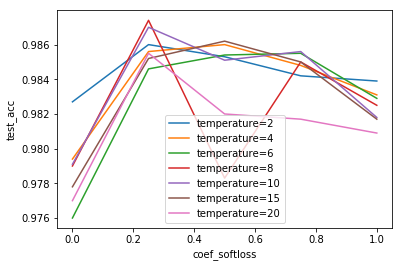

In [16]:
plot_trend(df_exp, label_x='coef_softloss', label_y='test_acc', label_line='temperature')

## Experiments on Students with $T^2$ Effect

Training student with temperature = 2 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 4 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16914582793469089793
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 1919205577756711192
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 5.193848 , acc = 0.3 
Epoch 1 , step 100 , loss= 0.3227385 , acc = 0.93 
Epoch 1 , step 200 , loss= 0.12956376 , acc = 0.97 
Epoch 1 , step 300 , loss= 0.16306068 , acc = 0.96 
Epoch 1 , step 400 , loss= 0.12870368 , acc = 0.97 
Epoch 1 , step 500 , loss= 0.03447415 , acc = 1.0 
Epoch 1 , step 549 , loss= 0.11256808 val_loss= 0.10169465 , acc = 0.96 val acc = 0.9674 
Epoch 1 finished, loss= 0.2380864 val loss= 0.10169465 ,  acc = 0.94978184 val acc = 0.9674
val_acc improved. 
Epoch 2 , step 50 , loss= 0.12780589 , a

Epoch 17 , step 200 , loss= 0.00034164393 , acc = 1.0 
Epoch 17 , step 300 , loss= 0.008827272 , acc = 1.0 
Epoch 17 , step 400 , loss= 0.0042042867 , acc = 1.0 
Epoch 17 , step 500 , loss= 5.703068e-05 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.11678598 val_loss= 0.122067526 , acc = 0.99 val acc = 0.9758 
Epoch 17 finished, loss= 0.012545199 val loss= 0.122067526 ,  acc = 0.99958175 val acc = 0.9758

Epoch 18 , step 50 , loss= 0.003661916 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.002169488 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.0040995744 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.0044183615 , acc = 1.0 
Epoch 18 , step 450 , loss= 9.145731e-05 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.022243422 val_loss= 0.09247848 , acc = 1.0 val acc = 0.9812 
Epoch 18 finished, loss= 0.010557976 val loss= 0.09247848 ,  acc = 0.999709 val acc = 0.9812

Epoch 19 , step 0 , loss= 4.796566e-05 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.0003763198 , acc = 1.0 
Epoch 19 , step 200 , loss= 0.0008430

Epoch 34 , step 150 , loss= 7.402712e-07 , acc = 1.0 
Epoch 34 , step 250 , loss= 0.00579222 , acc = 1.0 
Epoch 34 , step 350 , loss= 3.3153487e-05 , acc = 1.0 
Epoch 34 , step 450 , loss= 0.0001490111 , acc = 1.0 
Epoch 34 , step 549 , loss= 0.001360492 val_loss= 0.11485893 , acc = 1.0 val acc = 0.9856 
Epoch 34 finished, loss= 0.0063888063 val loss= 0.11485893 ,  acc = 0.9998363 val acc = 0.9856
val_acc improved. 
Epoch 35 , step 0 , loss= 0.00034399482 , acc = 1.0 
Epoch 35 , step 100 , loss= 0.00030015063 , acc = 1.0 
Epoch 35 , step 200 , loss= 2.3648074e-05 , acc = 1.0 
Epoch 35 , step 300 , loss= 0.0003366377 , acc = 1.0 
Epoch 35 , step 400 , loss= 0.00020438427 , acc = 1.0 
Epoch 35 , step 500 , loss= 9.70801e-05 , acc = 1.0 
Epoch 35 , step 549 , loss= 3.4785822e-05 val_loss= 0.1395614 , acc = 1.0 val acc = 0.9832 
Epoch 35 finished, loss= 0.004431985 val loss= 0.1395614 ,  acc = 0.999909 val acc = 0.9832

Epoch 36 , step 50 , loss= 0.04195625 , acc = 1.0 
Epoch 36 , step 150

Epoch 51 , step 100 , loss= 9.536741e-09 , acc = 1.0 
Epoch 51 , step 200 , loss= 2.3841857e-09 , acc = 1.0 
Epoch 51 , step 300 , loss= 2.0562607e-06 , acc = 1.0 
Epoch 51 , step 400 , loss= 3.3459423e-06 , acc = 1.0 
Epoch 51 , step 500 , loss= 1.8596091e-06 , acc = 1.0 
Epoch 51 , step 549 , loss= 1.6927633e-07 val_loss= 0.1235242 , acc = 1.0 val acc = 0.987 
Epoch 51 finished, loss= 7.857969e-07 val loss= 0.1235242 ,  acc = 1.0 val acc = 0.987

Epoch 52 , step 50 , loss= 2.276876e-07 , acc = 1.0 
Epoch 52 , step 150 , loss= 1.4090125e-06 , acc = 1.0 
Epoch 52 , step 250 , loss= 7.557607e-07 , acc = 1.0 
Epoch 52 , step 350 , loss= 2.09807e-07 , acc = 1.0 
Epoch 52 , step 450 , loss= 3.1351556e-07 , acc = 1.0 
Epoch 52 , step 549 , loss= 5.185473e-07 val_loss= 0.123855114 , acc = 1.0 val acc = 0.987 
Epoch 52 finished, loss= 6.383146e-07 val loss= 0.123855114 ,  acc = 1.0 val acc = 0.987

Epoch 53 , step 0 , loss= 1.5735564e-07 , acc = 1.0 
Epoch 53 , step 100 , loss= 2.3722397e-07 

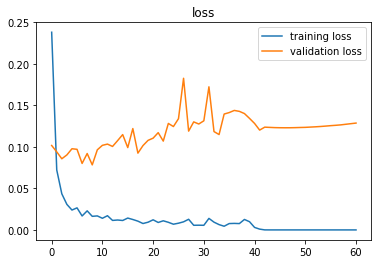

Plotting metrics...


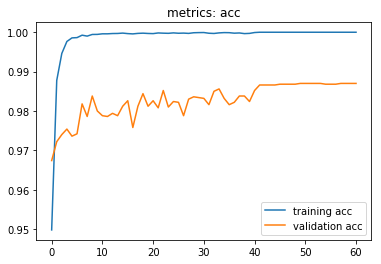

train {'acc': 1.0}
test {'acc': 0.9856}

Training student with temperature = 2 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 4 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13874633651685987030
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 7529733351752893635
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 6.219307 , acc = 0.45 
Epoch 1 , step 100 , loss= 0.69396806 , acc = 0.93 
Epoch 1 , step 200 , loss= 0.42961174 , acc = 0.96 
Epoch 1 , step 300 , loss= 0.6776794 , acc = 0.92 
Epoch 1 , step 400 , loss= 0.20844042 , acc = 0.99 
Epoch 1 , step 500 , loss= 0.26477173 , acc = 0.99 
Epoch 1 , step 549 , loss= 0.34723264 val_loss= 0.30056906 , acc = 0.98 val acc = 0.973 
Epoch 1 finished, loss= 0.504448 val loss= 0.30056906 ,  acc = 0.9529818 val acc = 0.973
val_acc improved. 

Epoch 17 , step 300 , loss= 0.25285774 , acc = 1.0 
Epoch 17 , step 400 , loss= 0.20734917 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.21234375 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.23414533 val_loss= 0.23256883 , acc = 1.0 val acc = 0.9846 
Epoch 17 finished, loss= 0.19283284 val loss= 0.23256883 ,  acc = 0.9998181 val acc = 0.9846

Epoch 18 , step 50 , loss= 0.16488001 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.18887006 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.12765418 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.21204168 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.13085464 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.17032883 val_loss= 0.22725762 , acc = 1.0 val acc = 0.9846 
Epoch 18 finished, loss= 0.18802282 val loss= 0.22725762 ,  acc = 0.9999636 val acc = 0.9846

Epoch 19 , step 0 , loss= 0.2541324 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.19475643 , acc = 1.0 
Epoch 19 , step 200 , loss= 0.14467086 , acc = 1.0 
Epoch 19 , step 300 , loss= 0.19692671 , acc = 1.0 
Epoch 19 , s

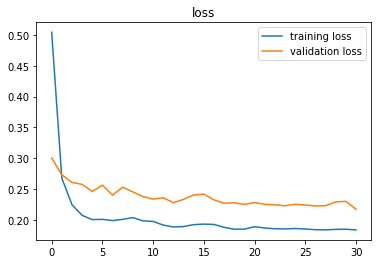

Plotting metrics...


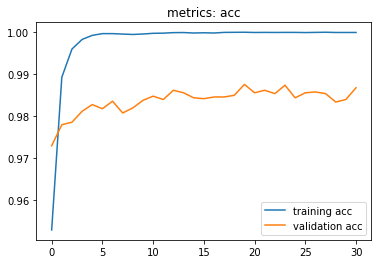

train {'acc': 0.9996909}
test {'acc': 0.9846}

Training student with temperature = 2 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 4 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12480671883821649917
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 10264163707021027421
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 8.017332 , acc = 0.46 
Epoch 1 , step 100 , loss= 1.1945653 , acc = 0.93 
Epoch 1 , step 200 , loss= 0.71232533 , acc = 0.96 
Epoch 1 , step 300 , loss= 0.6543974 , acc = 0.97 
Epoch 1 , step 400 , loss= 0.6491836 , acc = 0.96 
Epoch 1 , step 500 , loss= 0.7610218 , acc = 0.96 
Epoch 1 , step 549 , loss= 0.5501794 val_loss= 0.49531564 , acc = 0.98 val acc = 0.9758 
Epoch 1 finished, loss= 0.74207264 val loss= 0.49531564 ,  acc = 0.95629084 val acc = 0.9758
val_acc impr

Epoch 17 , step 400 , loss= 0.2690704 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.2713472 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.3479202 val_loss= 0.3987517 , acc = 1.0 val acc = 0.9848 
Epoch 17 finished, loss= 0.36163712 val loss= 0.3987517 ,  acc = 0.9992363 val acc = 0.9848

Epoch 18 , step 50 , loss= 0.3161028 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.30243644 , acc = 0.99 
Epoch 18 , step 250 , loss= 0.4239596 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.4089487 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.33301207 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.33749697 val_loss= 0.39474472 , acc = 1.0 val acc = 0.9864 
Epoch 18 finished, loss= 0.36283848 val loss= 0.39474472 ,  acc = 0.9989636 val acc = 0.9864

Epoch 19 , step 0 , loss= 0.29455733 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.29119098 , acc = 1.0 
Epoch 19 , step 200 , loss= 0.34972858 , acc = 1.0 
Epoch 19 , step 300 , loss= 0.4958113 , acc = 0.99 
Epoch 19 , step 400 , loss= 0.32464576 , acc = 1.0 
Epoch 19 , step 50

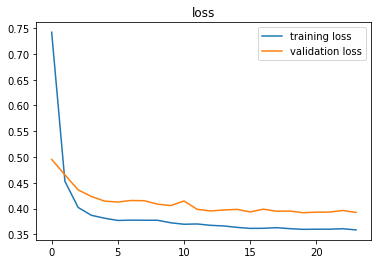

Plotting metrics...


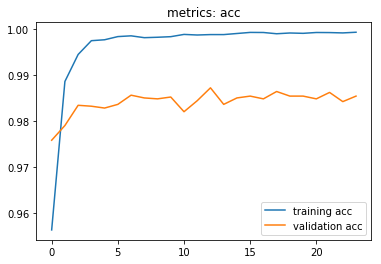

train {'acc': 0.9981818}
test {'acc': 0.9835}

Training student with temperature = 2 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 4 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8876896035910704604
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 5068927325195762085
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 11.4704275 , acc = 0.25 
Epoch 1 , step 100 , loss= 1.0901475 , acc = 0.94 
Epoch 1 , step 200 , loss= 0.8609963 , acc = 0.97 
Epoch 1 , step 300 , loss= 1.0348825 , acc = 0.97 
Epoch 1 , step 400 , loss= 0.5951717 , acc = 0.98 
Epoch 1 , step 500 , loss= 0.62360275 , acc = 0.97 
Epoch 1 , step 549 , loss= 0.7598627 val_loss= 0.67904955 , acc = 0.97 val acc = 0.9738 
Epoch 1 finished, loss= 1.0391817 val loss= 0.67904955 ,  acc = 0.9516727 val acc = 0.9738
val_acc impr

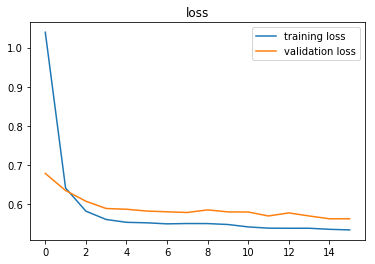

Plotting metrics...


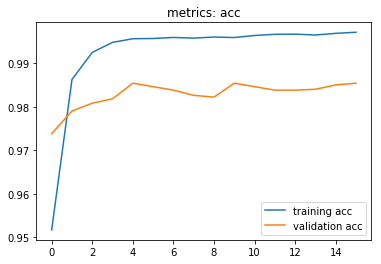

train {'acc': 0.9955818}
test {'acc': 0.9832}

Training student with temperature = 2 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 4 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12036846155763734573
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 14449332951720776259
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 13.345914 , acc = 0.34 
Epoch 1 , step 100 , loss= 1.4703168 , acc = 0.94 
Epoch 1 , step 200 , loss= 1.0965761 , acc = 0.98 
Epoch 1 , step 300 , loss= 0.78380084 , acc = 0.99 
Epoch 1 , step 400 , loss= 0.9844819 , acc = 0.97 
Epoch 1 , step 500 , loss= 1.1370696 , acc = 0.96 
Epoch 1 , step 549 , loss= 1.0544087 val_loss= 0.8863576 , acc = 0.98 val acc = 0.9726 
Epoch 1 finished, loss= 1.263238 val loss= 0.8863576 ,  acc = 0.9540909 val acc = 0.9726
val_acc improved

Epoch 17 , step 400 , loss= 0.7025568 , acc = 0.99 
Epoch 17 , step 500 , loss= 0.73732877 , acc = 0.99 
Epoch 17 , step 549 , loss= 0.80804956 val_loss= 0.7274461 , acc = 0.98 val acc = 0.9856 
Epoch 17 finished, loss= 0.7042451 val loss= 0.7274461 ,  acc = 0.9943273 val acc = 0.9856

Epoch 18 , step 50 , loss= 0.64985466 , acc = 0.97 
Epoch 18 , step 150 , loss= 0.6568762 , acc = 0.98 
Epoch 18 , step 250 , loss= 0.7213445 , acc = 0.99 
Epoch 18 , step 350 , loss= 0.6752751 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.7495386 , acc = 0.99 
Epoch 18 , step 549 , loss= 0.63643336 val_loss= 0.73462117 , acc = 1.0 val acc = 0.9838 
Epoch 18 finished, loss= 0.70369035 val loss= 0.73462117 ,  acc = 0.9937999 val acc = 0.9838

Epoch 19 , step 0 , loss= 0.50225514 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.63854116 , acc = 0.99 
Epoch 19 , step 200 , loss= 0.57994014 , acc = 1.0 
Epoch 19 , step 300 , loss= 0.7044504 , acc = 1.0 
Epoch 19 , step 400 , loss= 1.0238049 , acc = 0.99 
Epoch 19 , s

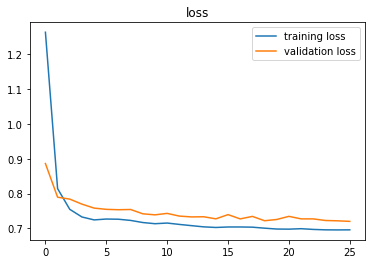

Plotting metrics...


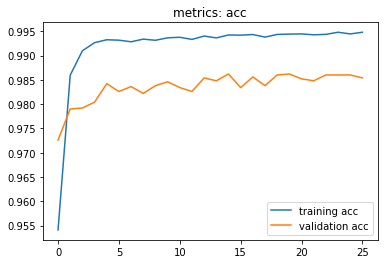

train {'acc': 0.9940364}
test {'acc': 0.9834}

Training student with temperature = 4 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 16 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15009315562898666679
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 17535305647146511940
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 6.739545 , acc = 0.21 
Epoch 1 , step 100 , loss= 0.39213368 , acc = 0.89 
Epoch 1 , step 200 , loss= 0.14547314 , acc = 0.97 
Epoch 1 , step 300 , loss= 0.24227116 , acc = 0.96 
Epoch 1 , step 400 , loss= 0.16527586 , acc = 0.98 
Epoch 1 , step 500 , loss= 0.047133733 , acc = 0.99 
Epoch 1 , step 549 , loss= 0.16025116 val_loss= 0.10819902 , acc = 0.96 val acc = 0.9692 
Epoch 1 finished, loss= 0.26117313 val loss= 0.10819902 ,  acc = 0.9472727 val acc = 0.9692
val_ac

Epoch 17 , step 100 , loss= 0.004210847 , acc = 1.0 
Epoch 17 , step 200 , loss= 0.0064386325 , acc = 1.0 
Epoch 17 , step 300 , loss= 0.0030827236 , acc = 1.0 
Epoch 17 , step 400 , loss= 0.01152252 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.0136587 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.054663833 val_loss= 0.12893815 , acc = 1.0 val acc = 0.9794 
Epoch 17 finished, loss= 0.012485112 val loss= 0.12893815 ,  acc = 0.99960005 val acc = 0.9794

Epoch 18 , step 50 , loss= 0.023562064 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.00024803958 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.00018304528 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.02256595 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.000115200106 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.001175037 val_loss= 0.107952304 , acc = 1.0 val acc = 0.9798 
Epoch 18 finished, loss= 0.012165541 val loss= 0.107952304 ,  acc = 0.9997817 val acc = 0.9798

Epoch 19 , step 0 , loss= 0.013981235 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.002116006 

Epoch 34 , step 50 , loss= 0.00044336662 , acc = 1.0 
Epoch 34 , step 150 , loss= 0.00018318884 , acc = 1.0 
Epoch 34 , step 250 , loss= 3.1572363e-05 , acc = 1.0 
Epoch 34 , step 350 , loss= 0.0005523111 , acc = 1.0 
Epoch 34 , step 450 , loss= 3.9935276e-05 , acc = 1.0 
Epoch 34 , step 549 , loss= 8.83626e-05 val_loss= 0.12835734 , acc = 1.0 val acc = 0.9852 
Epoch 34 finished, loss= 0.0059766467 val loss= 0.12835734 ,  acc = 0.9997454 val acc = 0.9852
val_acc improved. 
Epoch 35 , step 0 , loss= 2.5288085e-05 , acc = 1.0 
Epoch 35 , step 100 , loss= 8.09525e-06 , acc = 1.0 
Epoch 35 , step 200 , loss= 1.7511397e-06 , acc = 1.0 
Epoch 35 , step 300 , loss= 9.005901e-06 , acc = 1.0 
Epoch 35 , step 400 , loss= 0.00040351888 , acc = 1.0 
Epoch 35 , step 500 , loss= 0.016410382 , acc = 1.0 
Epoch 35 , step 549 , loss= 0.0056689554 val_loss= 0.13985883 , acc = 1.0 val acc = 0.9802 
Epoch 35 finished, loss= 0.003766922 val loss= 0.13985883 ,  acc = 0.9999454 val acc = 0.9802

Epoch 36 , s

Epoch 51 , step 100 , loss= 1.08480215e-07 , acc = 1.0 
Epoch 51 , step 200 , loss= 7.944687e-06 , acc = 1.0 
Epoch 51 , step 300 , loss= 2.1457552e-07 , acc = 1.0 
Epoch 51 , step 400 , loss= 8.2968387e-07 , acc = 1.0 
Epoch 51 , step 500 , loss= 0.00018524168 , acc = 1.0 
Epoch 51 , step 549 , loss= 2.2923052e-06 val_loss= 0.1835843 , acc = 1.0 val acc = 0.9824 
Epoch 51 finished, loss= 0.009167333 val loss= 0.1835843 ,  acc = 0.9998 val acc = 0.9824

Stop training, val_acc didn't improve more than 10 epoch. 
Student performance with {'coef_softloss': 0.0, 'coef_hardloss': 1.0, 'temperature': 4, 'temperature_effect': 16, 'train_acc': 0.9990909, 'test_acc': 0.982}
Plotting loss...


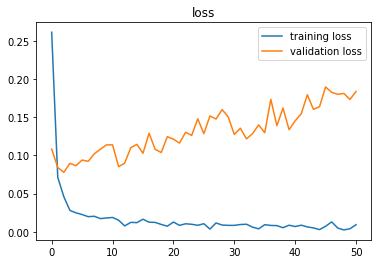

Plotting metrics...


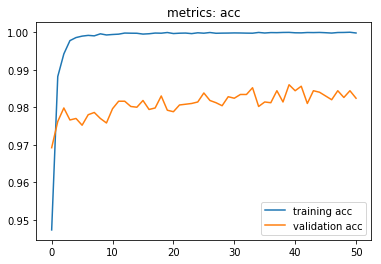

train {'acc': 0.9990909}
test {'acc': 0.982}

Training student with temperature = 4 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 16 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12265911350500642813
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 319362516015010031
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 13.217815 , acc = 0.34 
Epoch 1 , step 100 , loss= 2.704917 , acc = 0.98 
Epoch 1 , step 200 , loss= 2.941973 , acc = 0.97 
Epoch 1 , step 300 , loss= 2.4156516 , acc = 0.96 
Epoch 1 , step 400 , loss= 2.7527113 , acc = 0.98 
Epoch 1 , step 500 , loss= 2.886465 , acc = 0.97 
Epoch 1 , step 549 , loss= 2.5095036 val_loss= 2.4893312 , acc = 0.99 val acc = 0.9784 
Epoch 1 finished, loss= 2.9881086 val loss= 2.4893312 ,  acc = 0.9559091 val acc = 0.9784
val_acc improved. 


Epoch 18 , step 50 , loss= 2.4718118 , acc = 1.0 
Epoch 18 , step 150 , loss= 2.4358306 , acc = 1.0 
Epoch 18 , step 250 , loss= 2.297209 , acc = 1.0 
Epoch 18 , step 350 , loss= 2.3120801 , acc = 1.0 
Epoch 18 , step 450 , loss= 2.1822581 , acc = 1.0 
Epoch 18 , step 549 , loss= 2.1792817 val_loss= 2.3332174 , acc = 1.0 val acc = 0.9848 
Epoch 18 finished, loss= 2.3474994 val loss= 2.3332174 ,  acc = 1.0 val acc = 0.9848

Epoch 19 , step 0 , loss= 2.6655676 , acc = 1.0 
Epoch 19 , step 100 , loss= 2.2715492 , acc = 1.0 
Epoch 19 , step 200 , loss= 2.2357812 , acc = 1.0 
Epoch 19 , step 300 , loss= 2.1788125 , acc = 1.0 
Epoch 19 , step 400 , loss= 2.5858319 , acc = 1.0 
Epoch 19 , step 500 , loss= 1.7029916 , acc = 1.0 
Epoch 19 , step 549 , loss= 2.718987 val_loss= 2.3334944 , acc = 1.0 val acc = 0.9834 
Epoch 19 finished, loss= 2.3497849 val loss= 2.3334944 ,  acc = 1.0 val acc = 0.9834

Epoch 20 , step 50 , loss= 2.3429933 , acc = 1.0 
Epoch 20 , step 150 , loss= 2.3905973 , acc = 

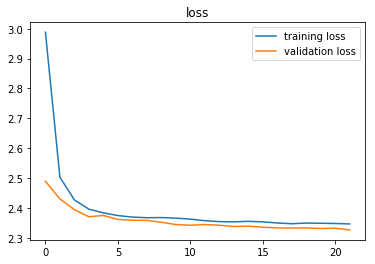

Plotting metrics...


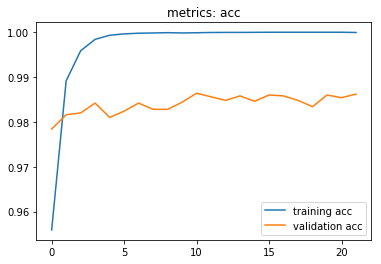

train {'acc': 0.9996909}
test {'acc': 0.9842}

Training student with temperature = 4 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 16 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7906119970393260037
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 3806071237919889918
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 24.832508 , acc = 0.27 
Epoch 1 , step 100 , loss= 5.2247095 , acc = 0.97 
Epoch 1 , step 200 , loss= 4.394813 , acc = 0.97 
Epoch 1 , step 300 , loss= 4.9127703 , acc = 0.96 
Epoch 1 , step 400 , loss= 4.4411435 , acc = 0.97 
Epoch 1 , step 500 , loss= 5.5799656 , acc = 0.95 
Epoch 1 , step 549 , loss= 5.0151324 val_loss= 4.852184 , acc = 0.97 val acc = 0.9762 
Epoch 1 finished, loss= 5.673114 val loss= 4.852184 ,  acc = 0.95425457 val acc = 0.9762
val_acc improved. 
E

Epoch 18 , step 50 , loss= 3.8463407 , acc = 1.0 
Epoch 18 , step 150 , loss= 4.6216917 , acc = 1.0 
Epoch 18 , step 250 , loss= 4.5865655 , acc = 1.0 
Epoch 18 , step 350 , loss= 5.165351 , acc = 1.0 
Epoch 18 , step 450 , loss= 4.868077 , acc = 1.0 
Epoch 18 , step 549 , loss= 5.201445 val_loss= 4.606833 , acc = 1.0 val acc = 0.9838 
Epoch 18 finished, loss= 4.684348 val loss= 4.606833 ,  acc = 0.99949086 val acc = 0.9838

Epoch 19 , step 0 , loss= 4.0704646 , acc = 1.0 
Epoch 19 , step 100 , loss= 5.249038 , acc = 1.0 
Epoch 19 , step 200 , loss= 5.1195407 , acc = 1.0 
Epoch 19 , step 300 , loss= 4.4951806 , acc = 1.0 
Epoch 19 , step 400 , loss= 4.913813 , acc = 1.0 
Epoch 19 , step 500 , loss= 4.8989344 , acc = 1.0 
Epoch 19 , step 549 , loss= 4.3305445 val_loss= 4.6023607 , acc = 1.0 val acc = 0.9842 
Epoch 19 finished, loss= 4.685473 val loss= 4.6023607 ,  acc = 0.9994364 val acc = 0.9842

Epoch 20 , step 50 , loss= 4.714199 , acc = 1.0 
Epoch 20 , step 150 , loss= 5.092428 , ac

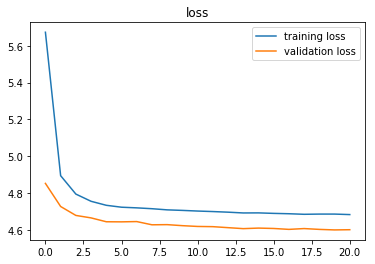

Plotting metrics...


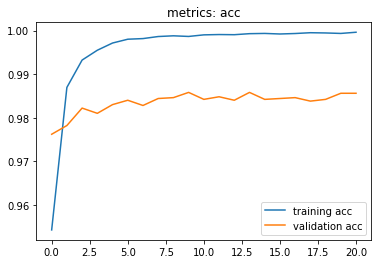

train {'acc': 0.99896365}
test {'acc': 0.9836}

Training student with temperature = 4 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 16 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10414872385398364878
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 9465130449081375045
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 28.603947 , acc = 0.62 
Epoch 1 , step 100 , loss= 8.346571 , acc = 0.98 
Epoch 1 , step 200 , loss= 7.4900756 , acc = 0.97 
Epoch 1 , step 300 , loss= 9.058287 , acc = 0.98 
Epoch 1 , step 400 , loss= 7.407473 , acc = 0.94 
Epoch 1 , step 500 , loss= 7.165101 , acc = 0.97 
Epoch 1 , step 549 , loss= 6.8429008 val_loss= 7.180775 , acc = 0.98 val acc = 0.9742 
Epoch 1 finished, loss= 8.281173 val loss= 7.180775 ,  acc = 0.95543635 val acc = 0.9742
val_acc improved. 


Epoch 18 , step 50 , loss= 6.651248 , acc = 1.0 
Epoch 18 , step 150 , loss= 6.9542866 , acc = 0.99 
Epoch 18 , step 250 , loss= 8.052019 , acc = 0.99 
Epoch 18 , step 350 , loss= 6.893794 , acc = 1.0 
Epoch 18 , step 450 , loss= 5.803372 , acc = 1.0 
Epoch 18 , step 549 , loss= 6.15107 val_loss= 6.8679748 , acc = 0.99 val acc = 0.9842 
Epoch 18 finished, loss= 7.0203266 val loss= 6.8679748 ,  acc = 0.9974545 val acc = 0.9842

Epoch 19 , step 0 , loss= 6.933006 , acc = 1.0 
Epoch 19 , step 100 , loss= 5.2044477 , acc = 1.0 
Epoch 19 , step 200 , loss= 6.678912 , acc = 1.0 
Epoch 19 , step 300 , loss= 5.7168527 , acc = 1.0 
Epoch 19 , step 400 , loss= 7.034349 , acc = 0.98 
Epoch 19 , step 500 , loss= 6.000647 , acc = 1.0 
Epoch 19 , step 549 , loss= 7.5974813 val_loss= 6.878286 , acc = 1.0 val acc = 0.9848 
Epoch 19 finished, loss= 7.01675 val loss= 6.878286 ,  acc = 0.9974181 val acc = 0.9848

Epoch 20 , step 50 , loss= 6.852373 , acc = 0.98 
Epoch 20 , step 150 , loss= 7.2698097 , ac

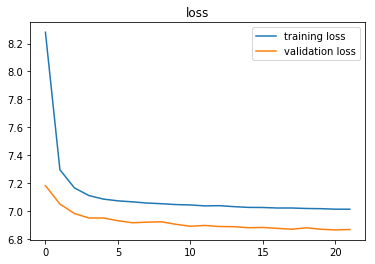

Plotting metrics...


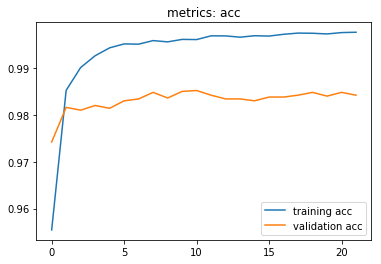

train {'acc': 0.9977273}
test {'acc': 0.983}

Training student with temperature = 4 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 16 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 18274431115231706564
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 15086879778592884435
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 37.883595 , acc = 0.52 
Epoch 1 , step 100 , loss= 11.076957 , acc = 0.94 
Epoch 1 , step 200 , loss= 11.436271 , acc = 0.98 
Epoch 1 , step 300 , loss= 11.255637 , acc = 0.97 
Epoch 1 , step 400 , loss= 8.46588 , acc = 0.96 
Epoch 1 , step 500 , loss= 11.660273 , acc = 0.98 
Epoch 1 , step 549 , loss= 10.040308 val_loss= 9.547521 , acc = 1.0 val acc = 0.974 
Epoch 1 finished, loss= 10.954599 val loss= 9.547521 ,  acc = 0.9525819 val acc = 0.974
val_acc improved. 
Epoc

Epoch 18 , step 50 , loss= 9.16071 , acc = 0.99 
Epoch 18 , step 150 , loss= 9.251693 , acc = 0.98 
Epoch 18 , step 250 , loss= 9.996773 , acc = 0.99 
Epoch 18 , step 350 , loss= 8.656683 , acc = 1.0 
Epoch 18 , step 450 , loss= 10.14225 , acc = 0.98 
Epoch 18 , step 549 , loss= 11.276903 val_loss= 9.142317 , acc = 0.98 val acc = 0.9844 
Epoch 18 finished, loss= 9.351033 val loss= 9.142317 ,  acc = 0.99374557 val acc = 0.9844

Epoch 19 , step 0 , loss= 9.412354 , acc = 0.99 
Epoch 19 , step 100 , loss= 8.767496 , acc = 0.99 
Epoch 19 , step 200 , loss= 10.280757 , acc = 1.0 
Epoch 19 , step 300 , loss= 7.709841 , acc = 0.99 
Epoch 19 , step 400 , loss= 8.238486 , acc = 1.0 
Epoch 19 , step 500 , loss= 7.228402 , acc = 0.99 
Epoch 19 , step 549 , loss= 9.170887 val_loss= 9.142404 , acc = 0.99 val acc = 0.9856 
Epoch 19 finished, loss= 9.345419 val loss= 9.142404 ,  acc = 0.99407274 val acc = 0.9856
val_acc improved. 
Epoch 20 , step 50 , loss= 9.397039 , acc = 0.99 
Epoch 20 , step 150 

Epoch 36 , step 50 , loss= 10.555783 , acc = 1.0 
Epoch 36 , step 150 , loss= 8.930085 , acc = 1.0 
Epoch 36 , step 250 , loss= 9.942174 , acc = 0.99 
Epoch 36 , step 350 , loss= 8.036055 , acc = 1.0 
Epoch 36 , step 450 , loss= 9.916653 , acc = 1.0 
Epoch 36 , step 549 , loss= 9.744068 val_loss= 9.126444 , acc = 0.99 val acc = 0.9852 
Epoch 36 finished, loss= 9.322788 val loss= 9.126444 ,  acc = 0.99472725 val acc = 0.9852

Epoch 37 , step 0 , loss= 9.981564 , acc = 1.0 
Epoch 37 , step 100 , loss= 8.869421 , acc = 1.0 
Epoch 37 , step 200 , loss= 8.994132 , acc = 1.0 
Epoch 37 , step 300 , loss= 10.072655 , acc = 1.0 
Epoch 37 , step 400 , loss= 8.940833 , acc = 0.99 
Epoch 37 , step 500 , loss= 10.061962 , acc = 0.99 
Epoch 37 , step 549 , loss= 8.808759 val_loss= 9.122046 , acc = 0.99 val acc = 0.9852 
Epoch 37 finished, loss= 9.323435 val loss= 9.122046 ,  acc = 0.9946544 val acc = 0.9852

Epoch 38 , step 50 , loss= 10.029425 , acc = 1.0 
Epoch 38 , step 150 , loss= 9.576757 , acc

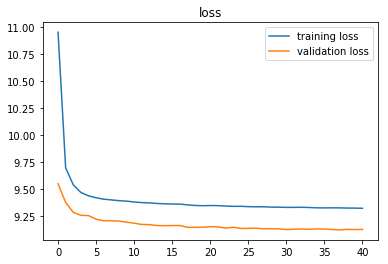

Plotting metrics...


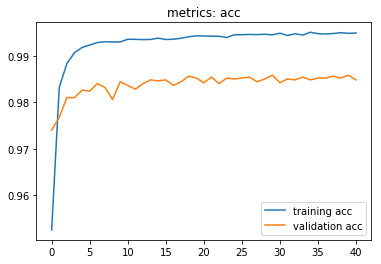

train {'acc': 0.9944182}
test {'acc': 0.9819}

Training student with temperature = 6 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 36 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3447398922485667128
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 4811168760373793351
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 4.1382756 , acc = 0.41 
Epoch 1 , step 100 , loss= 0.16921242 , acc = 0.96 
Epoch 1 , step 200 , loss= 0.17314337 , acc = 0.96 
Epoch 1 , step 300 , loss= 0.14104837 , acc = 0.97 
Epoch 1 , step 400 , loss= 0.09944901 , acc = 0.98 
Epoch 1 , step 500 , loss= 0.17323291 , acc = 0.97 
Epoch 1 , step 549 , loss= 0.22670461 val_loss= 0.111033484 , acc = 0.96 val acc = 0.9654 
Epoch 1 finished, loss= 0.22526862 val loss= 0.111033484 ,  acc = 0.95114547 val acc = 0.9654
val_a

Epoch 17 , step 100 , loss= 0.003592899 , acc = 1.0 
Epoch 17 , step 200 , loss= 0.06546977 , acc = 1.0 
Epoch 17 , step 300 , loss= 0.04792453 , acc = 1.0 
Epoch 17 , step 400 , loss= 0.0033208856 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.00038483777 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.0005543895 val_loss= 0.1086962 , acc = 1.0 val acc = 0.9808 
Epoch 17 finished, loss= 0.018180648 val loss= 0.1086962 ,  acc = 0.99936366 val acc = 0.9808

Epoch 18 , step 50 , loss= 5.9255814e-05 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.00013612314 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.0005113936 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.0051518255 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.00039197403 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.028156638 val_loss= 0.09789567 , acc = 1.0 val acc = 0.9826 
Epoch 18 finished, loss= 0.008988797 val loss= 0.09789567 ,  acc = 0.9997454 val acc = 0.9826
val_acc improved. 
Epoch 19 , step 0 , loss= 2.2630375e-05 , acc = 1.0 
Epoch 19 , step 100

Epoch 34 , step 50 , loss= 0.07889662 , acc = 1.0 
Epoch 34 , step 150 , loss= 4.5434972e-05 , acc = 1.0 
Epoch 34 , step 250 , loss= 0.003225022 , acc = 1.0 
Epoch 34 , step 350 , loss= 0.009435749 , acc = 1.0 
Epoch 34 , step 450 , loss= 0.0005746651 , acc = 1.0 
Epoch 34 , step 549 , loss= 0.010960001 val_loss= 0.14319141 , acc = 1.0 val acc = 0.9816 
Epoch 34 finished, loss= 0.007703306 val loss= 0.14319141 ,  acc = 0.9999272 val acc = 0.9816

Epoch 35 , step 0 , loss= 0.0043918556 , acc = 1.0 
Epoch 35 , step 100 , loss= 0.00018484572 , acc = 1.0 
Epoch 35 , step 200 , loss= 0.014995787 , acc = 1.0 
Epoch 35 , step 300 , loss= 0.022102877 , acc = 1.0 
Epoch 35 , step 400 , loss= 0.005554207 , acc = 1.0 
Epoch 35 , step 500 , loss= 0.006633909 , acc = 1.0 
Epoch 35 , step 549 , loss= 0.016055446 val_loss= 0.1560537 , acc = 1.0 val acc = 0.9808 
Epoch 35 finished, loss= 0.009552009 val loss= 0.1560537 ,  acc = 0.99983644 val acc = 0.9808

Epoch 36 , step 50 , loss= 0.00063864456 , a

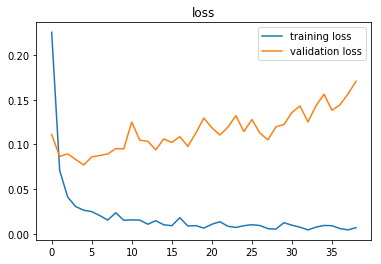

Plotting metrics...


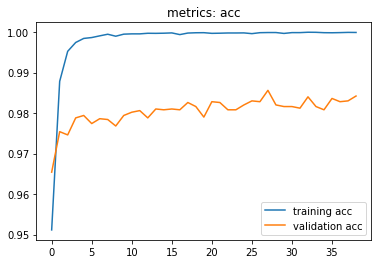

train {'acc': 0.9976364}
test {'acc': 0.9795}

Training student with temperature = 6 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 36 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16500918802796366756
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 7201697069161046996
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 26.588234 , acc = 0.34 
Epoch 1 , step 100 , loss= 9.8161125 , acc = 0.95 
Epoch 1 , step 200 , loss= 9.948822 , acc = 0.98 
Epoch 1 , step 300 , loss= 9.17627 , acc = 0.99 
Epoch 1 , step 400 , loss= 9.815044 , acc = 0.97 
Epoch 1 , step 500 , loss= 9.3359785 , acc = 0.96 
Epoch 1 , step 549 , loss= 10.899602 val_loss= 9.169699 , acc = 0.98 val acc = 0.9766 
Epoch 1 finished, loss= 10.084201 val loss= 9.169699 ,  acc = 0.9535274 val acc = 0.9766
val_acc improved. 
E

Epoch 18 , step 50 , loss= 9.620199 , acc = 1.0 
Epoch 18 , step 150 , loss= 9.415421 , acc = 1.0 
Epoch 18 , step 250 , loss= 9.703526 , acc = 1.0 
Epoch 18 , step 350 , loss= 9.249216 , acc = 1.0 
Epoch 18 , step 450 , loss= 8.995885 , acc = 1.0 
Epoch 18 , step 549 , loss= 9.159331 val_loss= 8.926722 , acc = 1.0 val acc = 0.9846 
Epoch 18 finished, loss= 9.078965 val loss= 8.926722 ,  acc = 1.0 val acc = 0.9846

Epoch 19 , step 0 , loss= 10.529624 , acc = 1.0 
Epoch 19 , step 100 , loss= 9.538669 , acc = 1.0 
Epoch 19 , step 200 , loss= 9.111633 , acc = 1.0 
Epoch 19 , step 300 , loss= 8.363072 , acc = 1.0 
Epoch 19 , step 400 , loss= 9.170168 , acc = 1.0 
Epoch 19 , step 500 , loss= 9.907913 , acc = 1.0 
Epoch 19 , step 549 , loss= 9.58472 val_loss= 8.923773 , acc = 1.0 val acc = 0.9858 
Epoch 19 finished, loss= 9.077828 val loss= 8.923773 ,  acc = 1.0 val acc = 0.9858

Epoch 20 , step 50 , loss= 9.253863 , acc = 1.0 
Epoch 20 , step 150 , loss= 9.569526 , acc = 1.0 
Epoch 20 , ste

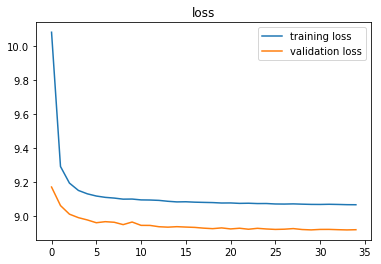

Plotting metrics...


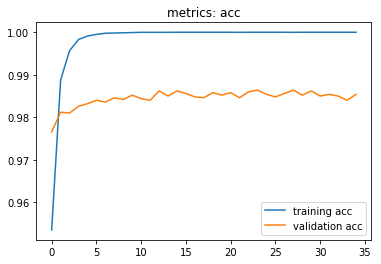

train {'acc': 0.9998909}
test {'acc': 0.983}

Training student with temperature = 6 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 36 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3254598878100765109
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 14874107496299501644
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 47.105976 , acc = 0.46 
Epoch 1 , step 100 , loss= 19.086618 , acc = 0.96 
Epoch 1 , step 200 , loss= 19.316912 , acc = 0.96 
Epoch 1 , step 300 , loss= 18.7225 , acc = 0.97 
Epoch 1 , step 400 , loss= 16.249111 , acc = 0.99 
Epoch 1 , step 500 , loss= 19.148602 , acc = 0.97 
Epoch 1 , step 549 , loss= 19.00626 val_loss= 18.179928 , acc = 0.96 val acc = 0.977 
Epoch 1 finished, loss= 19.726765 val loss= 18.179928 ,  acc = 0.953491 val acc = 0.977
val_acc improved. 
Epoc

Epoch 17 , step 549 , loss= 18.339878 val_loss= 17.799086 , acc = 1.0 val acc = 0.9834 
Epoch 17 finished, loss= 18.150015 val loss= 17.799086 ,  acc = 0.99936354 val acc = 0.9834

Epoch 18 , step 50 , loss= 17.852291 , acc = 1.0 
Epoch 18 , step 150 , loss= 17.350441 , acc = 1.0 
Epoch 18 , step 250 , loss= 19.525343 , acc = 1.0 
Epoch 18 , step 350 , loss= 17.49094 , acc = 1.0 
Epoch 18 , step 450 , loss= 18.346014 , acc = 1.0 
Epoch 18 , step 549 , loss= 17.52833 val_loss= 17.798086 , acc = 0.99 val acc = 0.9832 
Epoch 18 finished, loss= 18.145676 val loss= 17.798086 ,  acc = 0.9994727 val acc = 0.9832

Epoch 19 , step 0 , loss= 18.346588 , acc = 1.0 
Epoch 19 , step 100 , loss= 19.256037 , acc = 1.0 
Epoch 19 , step 200 , loss= 18.88705 , acc = 1.0 
Epoch 19 , step 300 , loss= 18.053656 , acc = 0.99 
Epoch 19 , step 400 , loss= 19.48822 , acc = 1.0 
Epoch 19 , step 500 , loss= 19.731117 , acc = 1.0 
Epoch 19 , step 549 , loss= 20.136034 val_loss= 17.791464 , acc = 1.0 val acc = 0.9

Epoch 35 , step 500 , loss= 17.898823 , acc = 1.0 
Epoch 35 , step 549 , loss= 21.445017 val_loss= 17.77706 , acc = 1.0 val acc = 0.9846 
Epoch 35 finished, loss= 18.121517 val loss= 17.77706 ,  acc = 0.9997454 val acc = 0.9846

Epoch 36 , step 50 , loss= 18.296162 , acc = 1.0 
Epoch 36 , step 150 , loss= 18.120558 , acc = 1.0 
Epoch 36 , step 250 , loss= 19.982439 , acc = 1.0 
Epoch 36 , step 350 , loss= 18.73239 , acc = 1.0 
Epoch 36 , step 450 , loss= 16.337717 , acc = 1.0 
Epoch 36 , step 549 , loss= 19.30938 val_loss= 17.77809 , acc = 1.0 val acc = 0.9848 
Epoch 36 finished, loss= 18.12159 val loss= 17.77809 ,  acc = 0.99978185 val acc = 0.9848

Epoch 37 , step 0 , loss= 17.749323 , acc = 1.0 
Epoch 37 , step 100 , loss= 19.382778 , acc = 1.0 
Epoch 37 , step 200 , loss= 18.478262 , acc = 1.0 
Epoch 37 , step 300 , loss= 16.709814 , acc = 1.0 
Epoch 37 , step 400 , loss= 18.278662 , acc = 1.0 
Epoch 37 , step 500 , loss= 18.398733 , acc = 1.0 
Epoch 37 , step 549 , loss= 19.14406 

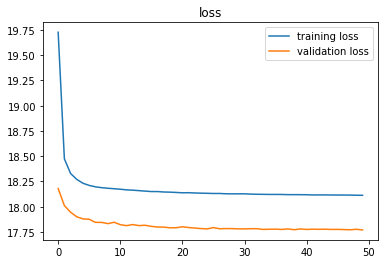

Plotting metrics...


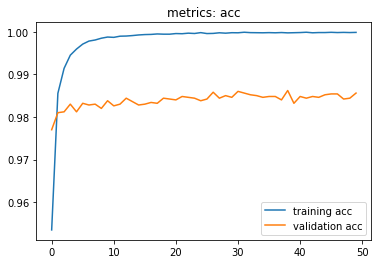

train {'acc': 0.9996727}
test {'acc': 0.9828}

Training student with temperature = 6 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 36 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 674820539973585337
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 5881072818931539412
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 66.829575 , acc = 0.43 
Epoch 1 , step 100 , loss= 33.62142 , acc = 0.91 
Epoch 1 , step 200 , loss= 28.476128 , acc = 0.96 
Epoch 1 , step 300 , loss= 25.157623 , acc = 0.98 
Epoch 1 , step 400 , loss= 27.993551 , acc = 0.97 
Epoch 1 , step 500 , loss= 27.508776 , acc = 0.97 
Epoch 1 , step 549 , loss= 28.816103 val_loss= 27.219841 , acc = 0.98 val acc = 0.9746 
Epoch 1 finished, loss= 29.384008 val loss= 27.219841 ,  acc = 0.9501819 val acc = 0.9746
val_acc improved.

Epoch 17 , step 549 , loss= 28.634275 val_loss= 26.674492 , acc = 0.98 val acc = 0.9842 
Epoch 17 finished, loss= 27.214184 val loss= 26.674492 ,  acc = 0.9968546 val acc = 0.9842

Epoch 18 , step 50 , loss= 26.575632 , acc = 1.0 
Epoch 18 , step 150 , loss= 29.907053 , acc = 1.0 
Epoch 18 , step 250 , loss= 26.652283 , acc = 1.0 
Epoch 18 , step 350 , loss= 25.69039 , acc = 1.0 
Epoch 18 , step 450 , loss= 28.14978 , acc = 1.0 
Epoch 18 , step 549 , loss= 27.514486 val_loss= 26.66137 , acc = 1.0 val acc = 0.9848 
Epoch 18 finished, loss= 27.2118 val loss= 26.66137 ,  acc = 0.9973818 val acc = 0.9848

Epoch 19 , step 0 , loss= 27.931194 , acc = 1.0 
Epoch 19 , step 100 , loss= 26.946728 , acc = 1.0 
Epoch 19 , step 200 , loss= 27.373764 , acc = 1.0 
Epoch 19 , step 300 , loss= 25.716347 , acc = 1.0 
Epoch 19 , step 400 , loss= 30.613472 , acc = 1.0 
Epoch 19 , step 500 , loss= 28.750292 , acc = 1.0 
Epoch 19 , step 549 , loss= 30.163065 val_loss= 26.668184 , acc = 1.0 val acc = 0.9834 

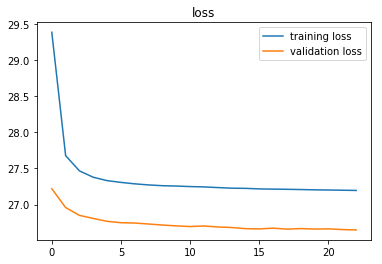

Plotting metrics...


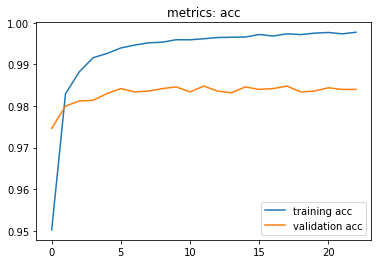

train {'acc': 0.99776363}
test {'acc': 0.9814}

Training student with temperature = 6 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 36 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14239627549744477321
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 9560674797583992736
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 84.6117 , acc = 0.42 
Epoch 1 , step 100 , loss= 39.981174 , acc = 0.93 
Epoch 1 , step 200 , loss= 40.373646 , acc = 0.98 
Epoch 1 , step 300 , loss= 36.71905 , acc = 0.99 
Epoch 1 , step 400 , loss= 37.393982 , acc = 0.99 
Epoch 1 , step 500 , loss= 36.845676 , acc = 1.0 
Epoch 1 , step 549 , loss= 39.422695 val_loss= 36.23381 , acc = 0.94 val acc = 0.9742 
Epoch 1 finished, loss= 39.066753 val loss= 36.23381 ,  acc = 0.9494182 val acc = 0.9742
val_acc improved. 
Ep

Epoch 17 , step 500 , loss= 34.516136 , acc = 1.0 
Epoch 17 , step 549 , loss= 34.819202 val_loss= 35.54779 , acc = 0.99 val acc = 0.9836 
Epoch 17 finished, loss= 36.279224 val loss= 35.54779 ,  acc = 0.99363637 val acc = 0.9836

Epoch 18 , step 50 , loss= 37.155067 , acc = 0.98 
Epoch 18 , step 150 , loss= 35.630272 , acc = 1.0 
Epoch 18 , step 250 , loss= 36.879047 , acc = 0.98 
Epoch 18 , step 350 , loss= 39.43806 , acc = 1.0 
Epoch 18 , step 450 , loss= 35.06344 , acc = 1.0 
Epoch 18 , step 549 , loss= 36.95008 val_loss= 35.524174 , acc = 0.99 val acc = 0.9838 
Epoch 18 finished, loss= 36.27477 val loss= 35.524174 ,  acc = 0.9939999 val acc = 0.9838

Epoch 19 , step 0 , loss= 36.91441 , acc = 0.99 
Epoch 19 , step 100 , loss= 38.64399 , acc = 0.96 
Epoch 19 , step 200 , loss= 32.805218 , acc = 1.0 
Epoch 19 , step 300 , loss= 38.297874 , acc = 0.97 
Epoch 19 , step 400 , loss= 33.564327 , acc = 1.0 
Epoch 19 , step 500 , loss= 39.252216 , acc = 1.0 
Epoch 19 , step 549 , loss= 35.

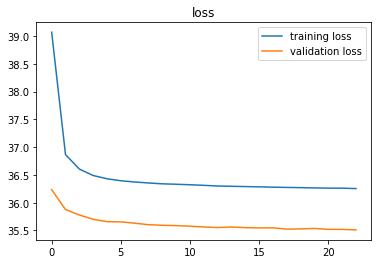

Plotting metrics...


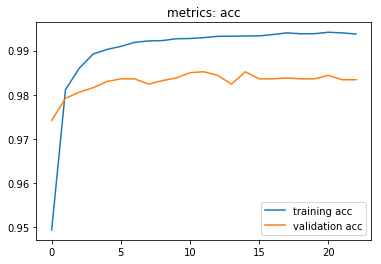

train {'acc': 0.9941273}
test {'acc': 0.9826}

Training student with temperature = 8 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 64 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 18134272198146518062
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 3483736245117232633
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 4.560298 , acc = 0.34 
Epoch 1 , step 100 , loss= 0.20207877 , acc = 0.94 
Epoch 1 , step 200 , loss= 0.18275648 , acc = 0.96 
Epoch 1 , step 300 , loss= 0.035712246 , acc = 1.0 
Epoch 1 , step 400 , loss= 0.20435877 , acc = 0.96 
Epoch 1 , step 500 , loss= 0.21800856 , acc = 0.97 
Epoch 1 , step 549 , loss= 0.048456214 val_loss= 0.10181512 , acc = 0.99 val acc = 0.971 
Epoch 1 finished, loss= 0.23845018 val loss= 0.10181512 ,  acc = 0.9466727 val acc = 0.971
val_acc i

Epoch 17 , step 100 , loss= 0.00025195885 , acc = 1.0 
Epoch 17 , step 200 , loss= 0.011073199 , acc = 1.0 
Epoch 17 , step 300 , loss= 0.02749821 , acc = 1.0 
Epoch 17 , step 400 , loss= 0.035051607 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.0009009099 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.043639526 val_loss= 0.10806184 , acc = 0.99 val acc = 0.9792 
Epoch 17 finished, loss= 0.0143186115 val loss= 0.10806184 ,  acc = 0.9995819 val acc = 0.9792

Epoch 18 , step 50 , loss= 0.0006827579 , acc = 1.0 
Epoch 18 , step 150 , loss= 7.1906274e-05 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.0024607424 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.012566488 , acc = 1.0 
Epoch 18 , step 450 , loss= 3.92616e-05 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.04154657 val_loss= 0.09688994 , acc = 1.0 val acc = 0.9826 
Epoch 18 finished, loss= 0.008620439 val loss= 0.09688994 ,  acc = 0.9997454 val acc = 0.9826

Epoch 19 , step 0 , loss= 0.00076017075 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.003323643

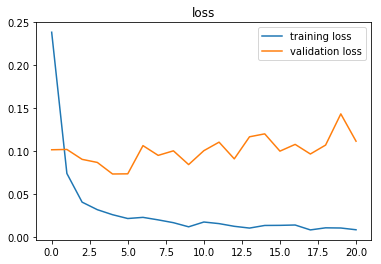

Plotting metrics...


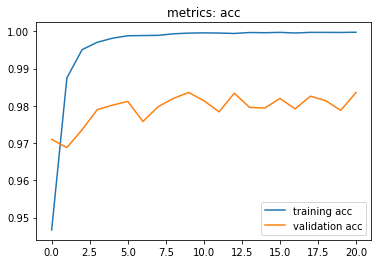

train {'acc': 0.9982727}
test {'acc': 0.9796}

Training student with temperature = 8 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 64 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2400197679143184416
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 5668284014802027208
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 41.35529 , acc = 0.49 
Epoch 1 , step 100 , loss= 24.30806 , acc = 0.96 
Epoch 1 , step 200 , loss= 23.97218 , acc = 0.92 
Epoch 1 , step 300 , loss= 24.447887 , acc = 0.96 
Epoch 1 , step 400 , loss= 21.745811 , acc = 0.97 
Epoch 1 , step 500 , loss= 21.54764 , acc = 0.99 
Epoch 1 , step 549 , loss= 21.215736 val_loss= 21.576742 , acc = 0.97 val acc = 0.9762 
Epoch 1 finished, loss= 22.788382 val loss= 21.576742 ,  acc = 0.9529455 val acc = 0.9762
val_acc improved. 


Epoch 18 , step 50 , loss= 20.553501 , acc = 1.0 
Epoch 18 , step 150 , loss= 22.28041 , acc = 1.0 
Epoch 18 , step 250 , loss= 23.36844 , acc = 1.0 
Epoch 18 , step 350 , loss= 21.045403 , acc = 1.0 
Epoch 18 , step 450 , loss= 21.900051 , acc = 1.0 
Epoch 18 , step 549 , loss= 21.014297 val_loss= 21.281616 , acc = 1.0 val acc = 0.9846 
Epoch 18 finished, loss= 21.551207 val loss= 21.281616 ,  acc = 1.0 val acc = 0.9846

Epoch 19 , step 0 , loss= 21.085762 , acc = 1.0 
Epoch 19 , step 100 , loss= 19.274355 , acc = 1.0 
Epoch 19 , step 200 , loss= 22.35739 , acc = 1.0 
Epoch 19 , step 300 , loss= 20.160912 , acc = 1.0 
Epoch 19 , step 400 , loss= 21.597383 , acc = 1.0 
Epoch 19 , step 500 , loss= 21.106852 , acc = 1.0 
Epoch 19 , step 549 , loss= 22.33069 val_loss= 21.286207 , acc = 1.0 val acc = 0.9842 
Epoch 19 finished, loss= 21.5494 val loss= 21.286207 ,  acc = 0.9999818 val acc = 0.9842

Epoch 20 , step 50 , loss= 20.829855 , acc = 1.0 
Epoch 20 , step 150 , loss= 20.856337 , acc 

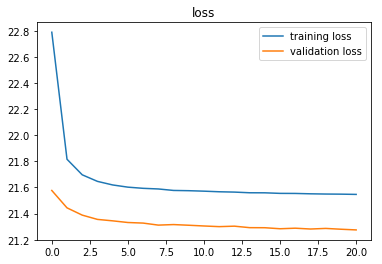

Plotting metrics...


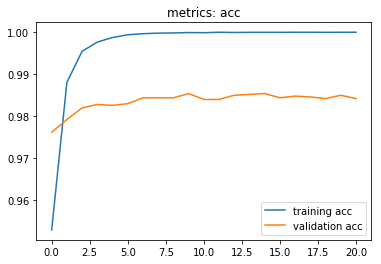

train {'acc': 0.9998364}
test {'acc': 0.9834}

Training student with temperature = 8 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 64 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5287794370018183392
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 16179853426416823816
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 76.28666 , acc = 0.53 
Epoch 1 , step 100 , loss= 47.838753 , acc = 0.94 
Epoch 1 , step 200 , loss= 47.47242 , acc = 0.94 
Epoch 1 , step 300 , loss= 42.20479 , acc = 0.96 
Epoch 1 , step 400 , loss= 43.99384 , acc = 0.97 
Epoch 1 , step 500 , loss= 41.244747 , acc = 0.98 
Epoch 1 , step 549 , loss= 43.062298 val_loss= 42.99897 , acc = 1.0 val acc = 0.9766 
Epoch 1 finished, loss= 45.113567 val loss= 42.99897 ,  acc = 0.9508727 val acc = 0.9766
val_acc improved. 
Epoc

Epoch 18 , step 50 , loss= 45.148655 , acc = 1.0 
Epoch 18 , step 150 , loss= 46.430138 , acc = 1.0 
Epoch 18 , step 250 , loss= 40.378277 , acc = 1.0 
Epoch 18 , step 350 , loss= 40.75091 , acc = 1.0 
Epoch 18 , step 450 , loss= 42.432835 , acc = 1.0 
Epoch 18 , step 549 , loss= 42.84372 val_loss= 42.5236 , acc = 0.99 val acc = 0.9836 
Epoch 18 finished, loss= 43.09238 val loss= 42.5236 ,  acc = 0.9994727 val acc = 0.9836

Epoch 19 , step 0 , loss= 45.043964 , acc = 1.0 
Epoch 19 , step 100 , loss= 41.81338 , acc = 1.0 
Epoch 19 , step 200 , loss= 43.738194 , acc = 1.0 
Epoch 19 , step 300 , loss= 42.126297 , acc = 1.0 
Epoch 19 , step 400 , loss= 42.929245 , acc = 1.0 
Epoch 19 , step 500 , loss= 43.978077 , acc = 1.0 
Epoch 19 , step 549 , loss= 39.531063 val_loss= 42.508556 , acc = 1.0 val acc = 0.9836 
Epoch 19 finished, loss= 43.09019 val loss= 42.508556 ,  acc = 0.99941814 val acc = 0.9836

Epoch 20 , step 50 , loss= 45.032185 , acc = 1.0 
Epoch 20 , step 150 , loss= 39.191116 ,

Epoch 36 , step 50 , loss= 39.490902 , acc = 1.0 
Epoch 36 , step 150 , loss= 42.21572 , acc = 1.0 
Epoch 36 , step 250 , loss= 43.62188 , acc = 1.0 
Epoch 36 , step 350 , loss= 40.189877 , acc = 1.0 
Epoch 36 , step 450 , loss= 42.518215 , acc = 1.0 
Epoch 36 , step 549 , loss= 43.78764 val_loss= 42.475086 , acc = 1.0 val acc = 0.985 
Epoch 36 finished, loss= 43.059574 val loss= 42.475086 ,  acc = 0.9998546 val acc = 0.985

Stop training, val_acc didn't improve more than 10 epoch. 
Student performance with {'coef_softloss': 0.5, 'coef_hardloss': 0.5, 'temperature': 8, 'temperature_effect': 64, 'train_acc': 0.9996727, 'test_acc': 0.9824}
Plotting loss...


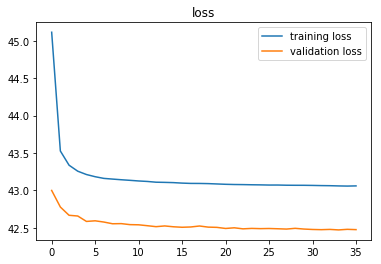

Plotting metrics...


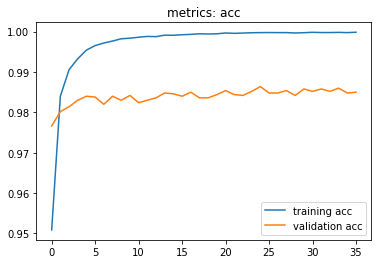

train {'acc': 0.9996727}
test {'acc': 0.9824}

Training student with temperature = 8 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 64 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5799628867705314140
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 12393330600621865103
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 118.50526 , acc = 0.36 
Epoch 1 , step 100 , loss= 73.28041 , acc = 0.89 
Epoch 1 , step 200 , loss= 64.35058 , acc = 0.95 
Epoch 1 , step 300 , loss= 66.37988 , acc = 0.98 
Epoch 1 , step 400 , loss= 62.596825 , acc = 0.96 
Epoch 1 , step 500 , loss= 65.36669 , acc = 0.99 
Epoch 1 , step 549 , loss= 70.75965 val_loss= 64.50772 , acc = 0.97 val acc = 0.9714 
Epoch 1 finished, loss= 67.571754 val loss= 64.50772 ,  acc = 0.94758177 val acc = 0.9714
val_acc improved. 
E

Epoch 17 , step 549 , loss= 70.87531 val_loss= 63.724514 , acc = 1.0 val acc = 0.985 
Epoch 17 finished, loss= 64.63731 val loss= 63.724514 ,  acc = 0.99696356 val acc = 0.985

Epoch 18 , step 50 , loss= 66.24288 , acc = 1.0 
Epoch 18 , step 150 , loss= 67.4193 , acc = 1.0 
Epoch 18 , step 250 , loss= 63.480934 , acc = 1.0 
Epoch 18 , step 350 , loss= 61.978607 , acc = 1.0 
Epoch 18 , step 450 , loss= 63.467804 , acc = 1.0 
Epoch 18 , step 549 , loss= 64.90844 val_loss= 63.729637 , acc = 1.0 val acc = 0.9858 
Epoch 18 finished, loss= 64.630455 val loss= 63.729637 ,  acc = 0.9970546 val acc = 0.9858
val_acc improved. 
Epoch 19 , step 0 , loss= 61.07168 , acc = 1.0 
Epoch 19 , step 100 , loss= 61.53826 , acc = 1.0 
Epoch 19 , step 200 , loss= 61.12845 , acc = 1.0 
Epoch 19 , step 300 , loss= 63.561188 , acc = 1.0 
Epoch 19 , step 400 , loss= 62.347637 , acc = 0.99 
Epoch 19 , step 500 , loss= 68.08304 , acc = 1.0 
Epoch 19 , step 549 , loss= 66.77743 val_loss= 63.727345 , acc = 1.0 val a

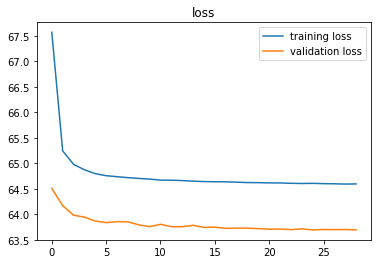

Plotting metrics...


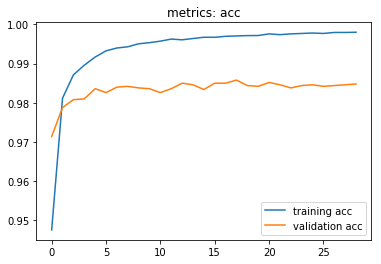

train {'acc': 0.9981091}
test {'acc': 0.9821}

Training student with temperature = 8 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 64 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9747792323769279512
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 16469232345244657310
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 152.0174 , acc = 0.39 
Epoch 1 , step 100 , loss= 94.91874 , acc = 0.93 
Epoch 1 , step 200 , loss= 84.56314 , acc = 0.96 
Epoch 1 , step 300 , loss= 84.521095 , acc = 0.99 
Epoch 1 , step 400 , loss= 85.87374 , acc = 1.0 
Epoch 1 , step 500 , loss= 83.48378 , acc = 0.98 
Epoch 1 , step 549 , loss= 86.87201 val_loss= 85.83781 , acc = 0.96 val acc = 0.9726 
Epoch 1 finished, loss= 89.83726 val loss= 85.83781 ,  acc = 0.9484728 val acc = 0.9726
val_acc improved. 
Epoch 2

Epoch 18 , step 50 , loss= 78.17902 , acc = 1.0 
Epoch 18 , step 150 , loss= 90.84312 , acc = 1.0 
Epoch 18 , step 250 , loss= 77.14365 , acc = 1.0 
Epoch 18 , step 350 , loss= 83.3732 , acc = 0.99 
Epoch 18 , step 450 , loss= 89.37549 , acc = 0.99 
Epoch 18 , step 549 , loss= 82.46666 val_loss= 84.95315 , acc = 0.99 val acc = 0.9834 
Epoch 18 finished, loss= 86.16719 val loss= 84.95315 ,  acc = 0.99374545 val acc = 0.9834

Epoch 19 , step 0 , loss= 88.06401 , acc = 0.99 
Epoch 19 , step 100 , loss= 85.32944 , acc = 1.0 
Epoch 19 , step 200 , loss= 84.371826 , acc = 0.99 
Epoch 19 , step 300 , loss= 86.294815 , acc = 1.0 
Epoch 19 , step 400 , loss= 92.3042 , acc = 1.0 
Epoch 19 , step 500 , loss= 90.43295 , acc = 0.97 
Epoch 19 , step 549 , loss= 86.04882 val_loss= 84.94931 , acc = 1.0 val acc = 0.9832 
Epoch 19 finished, loss= 86.15546 val loss= 84.94931 ,  acc = 0.9934001 val acc = 0.9832

Epoch 20 , step 50 , loss= 88.69844 , acc = 1.0 
Epoch 20 , step 150 , loss= 86.95754 , acc = 

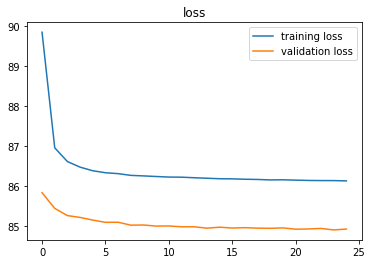

Plotting metrics...


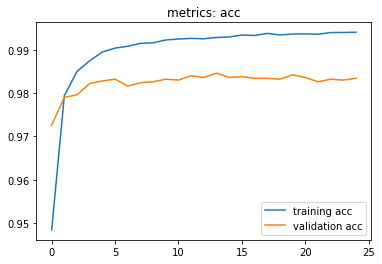

train {'acc': 0.99416363}
test {'acc': 0.9826}

Training student with temperature = 10 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 100 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15362959289442591162
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 8885652384666074541
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 4.515769 , acc = 0.35 
Epoch 1 , step 100 , loss= 0.09704188 , acc = 0.96 
Epoch 1 , step 200 , loss= 0.14974111 , acc = 0.97 
Epoch 1 , step 300 , loss= 0.14470562 , acc = 0.98 
Epoch 1 , step 400 , loss= 0.079867885 , acc = 0.98 
Epoch 1 , step 500 , loss= 0.20033436 , acc = 0.96 
Epoch 1 , step 549 , loss= 0.051432338 val_loss= 0.10402701 , acc = 1.0 val acc = 0.9678 
Epoch 1 finished, loss= 0.24538457 val loss= 0.10402701 ,  acc = 0.9480909 val acc = 0.9678
val_

Epoch 17 , step 100 , loss= 0.001493892 , acc = 1.0 
Epoch 17 , step 200 , loss= 0.00072554476 , acc = 1.0 
Epoch 17 , step 300 , loss= 0.004259922 , acc = 1.0 
Epoch 17 , step 400 , loss= 0.00036309124 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.002469727 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.0059389984 val_loss= 0.119708925 , acc = 1.0 val acc = 0.9796 
Epoch 17 finished, loss= 0.007766213 val loss= 0.119708925 ,  acc = 0.9998726 val acc = 0.9796

Epoch 18 , step 50 , loss= 0.014752936 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.0023061514 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.060842242 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.040793244 , acc = 1.0 
Epoch 18 , step 450 , loss= 2.18989e-05 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.0069857375 val_loss= 0.10963176 , acc = 1.0 val acc = 0.9798 
Epoch 18 finished, loss= 0.01158992 val loss= 0.10963176 ,  acc = 0.9998 val acc = 0.9798

Epoch 19 , step 0 , loss= 0.035318684 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.0043988805 , 

Epoch 34 , step 50 , loss= 0.00041361968 , acc = 1.0 
Epoch 34 , step 150 , loss= 0.00083187973 , acc = 1.0 
Epoch 34 , step 250 , loss= 0.00044762978 , acc = 1.0 
Epoch 34 , step 350 , loss= 3.441981e-05 , acc = 1.0 
Epoch 34 , step 450 , loss= 4.7248163e-06 , acc = 1.0 
Epoch 34 , step 549 , loss= 0.025387054 val_loss= 0.1217029 , acc = 1.0 val acc = 0.9844 
Epoch 34 finished, loss= 0.0073078657 val loss= 0.1217029 ,  acc = 0.9998181 val acc = 0.9844
val_acc improved. 
Epoch 35 , step 0 , loss= 0.0015228656 , acc = 1.0 
Epoch 35 , step 100 , loss= 0.001299569 , acc = 1.0 
Epoch 35 , step 200 , loss= 4.8892987e-05 , acc = 1.0 
Epoch 35 , step 300 , loss= 0.029660912 , acc = 1.0 
Epoch 35 , step 400 , loss= 0.00015753096 , acc = 1.0 
Epoch 35 , step 500 , loss= 0.0008818859 , acc = 1.0 
Epoch 35 , step 549 , loss= 6.4177744e-05 val_loss= 0.13386 , acc = 1.0 val acc = 0.9836 
Epoch 35 finished, loss= 0.0059379125 val loss= 0.13386 ,  acc = 0.9998545 val acc = 0.9836

Epoch 36 , step 50 

Epoch 51 , step 100 , loss= 0.00018865988 , acc = 1.0 
Epoch 51 , step 200 , loss= 0.0017395797 , acc = 1.0 
Epoch 51 , step 300 , loss= 3.6830947e-06 , acc = 1.0 
Epoch 51 , step 400 , loss= 0.000121410965 , acc = 1.0 
Epoch 51 , step 500 , loss= 9.507332e-05 , acc = 1.0 
Epoch 51 , step 549 , loss= 7.6480195e-05 val_loss= 0.2117529 , acc = 1.0 val acc = 0.9808 
Epoch 51 finished, loss= 0.00701581 val loss= 0.2117529 ,  acc = 0.999909 val acc = 0.9808

Epoch 52 , step 50 , loss= 1.3848488e-05 , acc = 1.0 
Epoch 52 , step 150 , loss= 6.866228e-07 , acc = 1.0 
Epoch 52 , step 250 , loss= 1.8915194e-05 , acc = 1.0 
Epoch 52 , step 350 , loss= 0.0019309797 , acc = 1.0 
Epoch 52 , step 450 , loss= 2.0265562e-08 , acc = 1.0 
Epoch 52 , step 549 , loss= 5.3961016e-05 val_loss= 0.19189021 , acc = 1.0 val acc = 0.981 
Epoch 52 finished, loss= 0.00795257 val loss= 0.19189021 ,  acc = 0.9998545 val acc = 0.981

Epoch 53 , step 0 , loss= 0.00063193706 , acc = 1.0 
Epoch 53 , step 100 , loss= 1.85

Epoch 68 , step 50 , loss= 2.433956e-05 , acc = 1.0 
Epoch 68 , step 150 , loss= 0.0011322235 , acc = 1.0 
Epoch 68 , step 250 , loss= 8.110119e-06 , acc = 1.0 
Epoch 68 , step 350 , loss= 3.63488e-05 , acc = 1.0 
Epoch 68 , step 450 , loss= 2.565059e-06 , acc = 1.0 
Epoch 68 , step 549 , loss= 0.11715703 val_loss= 0.20816162 , acc = 1.0 val acc = 0.9834 
Epoch 68 finished, loss= 0.0066675483 val loss= 0.20816162 ,  acc = 0.999909 val acc = 0.9834

Epoch 69 , step 0 , loss= 8.344647e-09 , acc = 1.0 
Epoch 69 , step 100 , loss= 8.9285936e-07 , acc = 1.0 
Epoch 69 , step 200 , loss= 0.0 , acc = 1.0 
Epoch 69 , step 300 , loss= 1.800052e-07 , acc = 1.0 
Epoch 69 , step 400 , loss= 0.08505589 , acc = 1.0 
Epoch 69 , step 500 , loss= 1.4781888e-07 , acc = 1.0 
Epoch 69 , step 549 , loss= 6.5324616e-07 val_loss= 0.19103014 , acc = 1.0 val acc = 0.9828 
Epoch 69 finished, loss= 0.003260253 val loss= 0.19103014 ,  acc = 0.9999818 val acc = 0.9828

Epoch 70 , step 50 , loss= 7.466866e-06 , acc 

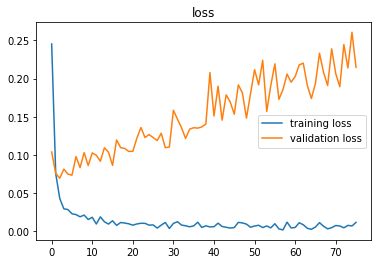

Plotting metrics...


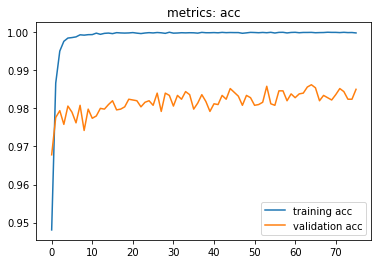

train {'acc': 0.9994182}
test {'acc': 0.9826}

Training student with temperature = 10 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 100 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4939021760079193414
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 14893290395324952452
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 61.719803 , acc = 0.41 
Epoch 1 , step 100 , loss= 42.34266 , acc = 0.97 
Epoch 1 , step 200 , loss= 41.579334 , acc = 0.94 
Epoch 1 , step 300 , loss= 40.6831 , acc = 0.97 
Epoch 1 , step 400 , loss= 39.72393 , acc = 0.98 
Epoch 1 , step 500 , loss= 39.667885 , acc = 0.99 
Epoch 1 , step 549 , loss= 37.799885 val_loss= 39.843224 , acc = 0.98 val acc = 0.9742 
Epoch 1 finished, loss= 41.226414 val loss= 39.843224 ,  acc = 0.95387274 val acc = 0.9742
val_acc improve

Epoch 18 , step 50 , loss= 41.399956 , acc = 1.0 
Epoch 18 , step 150 , loss= 39.941723 , acc = 1.0 
Epoch 18 , step 250 , loss= 40.9802 , acc = 1.0 
Epoch 18 , step 350 , loss= 39.019314 , acc = 1.0 
Epoch 18 , step 450 , loss= 39.69803 , acc = 1.0 
Epoch 18 , step 549 , loss= 38.385956 val_loss= 39.501038 , acc = 1.0 val acc = 0.985 
Epoch 18 finished, loss= 39.836494 val loss= 39.501038 ,  acc = 1.0 val acc = 0.985

Epoch 19 , step 0 , loss= 39.00079 , acc = 1.0 
Epoch 19 , step 100 , loss= 37.856194 , acc = 1.0 
Epoch 19 , step 200 , loss= 41.216934 , acc = 1.0 
Epoch 19 , step 300 , loss= 38.92055 , acc = 1.0 
Epoch 19 , step 400 , loss= 42.309193 , acc = 1.0 
Epoch 19 , step 500 , loss= 39.685307 , acc = 1.0 
Epoch 19 , step 549 , loss= 38.692867 val_loss= 39.49627 , acc = 1.0 val acc = 0.9836 
Epoch 19 finished, loss= 39.83232 val loss= 39.49627 ,  acc = 1.0 val acc = 0.9836

Epoch 20 , step 50 , loss= 39.460613 , acc = 1.0 
Epoch 20 , step 150 , loss= 40.580803 , acc = 1.0 
Epo

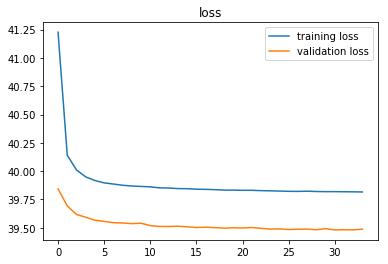

Plotting metrics...


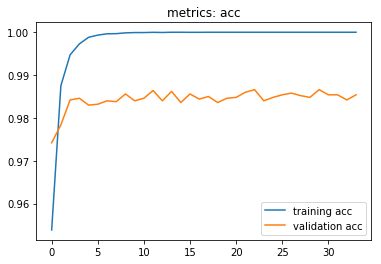

train {'acc': 0.99985456}
test {'acc': 0.9845}

Training student with temperature = 10 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 100 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5986065885291280899
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 8812779061389466677
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 119.671135 , acc = 0.37 
Epoch 1 , step 100 , loss= 81.460915 , acc = 0.97 
Epoch 1 , step 200 , loss= 82.287056 , acc = 0.97 
Epoch 1 , step 300 , loss= 88.508255 , acc = 0.97 
Epoch 1 , step 400 , loss= 78.18709 , acc = 0.98 
Epoch 1 , step 500 , loss= 85.34586 , acc = 0.99 
Epoch 1 , step 549 , loss= 72.453186 val_loss= 79.52722 , acc = 1.0 val acc = 0.9722 
Epoch 1 finished, loss= 82.056435 val loss= 79.52722 ,  acc = 0.9492364 val acc = 0.9722
val_acc improved. 

Epoch 18 , step 50 , loss= 82.60213 , acc = 1.0 
Epoch 18 , step 150 , loss= 81.449776 , acc = 1.0 
Epoch 18 , step 250 , loss= 76.323235 , acc = 1.0 
Epoch 18 , step 350 , loss= 75.93651 , acc = 1.0 
Epoch 18 , step 450 , loss= 74.34709 , acc = 1.0 
Epoch 18 , step 549 , loss= 83.302864 val_loss= 78.927574 , acc = 1.0 val acc = 0.9856 
Epoch 18 finished, loss= 79.664276 val loss= 78.927574 ,  acc = 0.99936366 val acc = 0.9856

Epoch 19 , step 0 , loss= 75.89565 , acc = 1.0 
Epoch 19 , step 100 , loss= 79.99479 , acc = 1.0 
Epoch 19 , step 200 , loss= 79.185776 , acc = 1.0 
Epoch 19 , step 300 , loss= 76.77087 , acc = 1.0 
Epoch 19 , step 400 , loss= 84.5024 , acc = 1.0 
Epoch 19 , step 500 , loss= 78.91634 , acc = 1.0 
Epoch 19 , step 549 , loss= 75.41037 val_loss= 78.92779 , acc = 1.0 val acc = 0.9852 
Epoch 19 finished, loss= 79.65729 val loss= 78.92779 ,  acc = 0.99939996 val acc = 0.9852

Epoch 20 , step 50 , loss= 78.3836 , acc = 1.0 
Epoch 20 , step 150 , loss= 78.08693 , acc = 

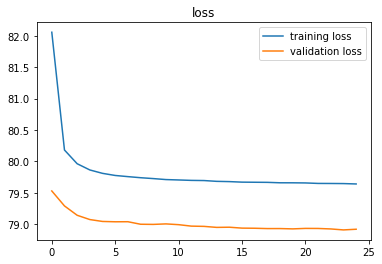

Plotting metrics...


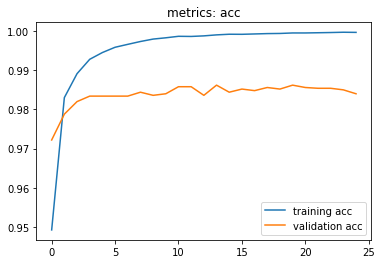

train {'acc': 0.9995091}
test {'acc': 0.9838}

Training student with temperature = 10 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 100 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16564988450530779624
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 17280615609497842792
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 178.06506 , acc = 0.25 
Epoch 1 , step 100 , loss= 121.93613 , acc = 0.91 
Epoch 1 , step 200 , loss= 120.06037 , acc = 0.97 
Epoch 1 , step 300 , loss= 124.415695 , acc = 0.95 
Epoch 1 , step 400 , loss= 121.975 , acc = 0.98 
Epoch 1 , step 500 , loss= 108.84605 , acc = 0.99 
Epoch 1 , step 549 , loss= 123.65502 val_loss= 119.22168 , acc = 0.98 val acc = 0.9708 
Epoch 1 finished, loss= 122.91622 val loss= 119.22168 ,  acc = 0.946 val acc = 0.9708
val_acc improved

Epoch 17 , step 400 , loss= 114.39373 , acc = 0.99 
Epoch 17 , step 500 , loss= 120.778854 , acc = 1.0 
Epoch 17 , step 549 , loss= 118.83962 val_loss= 118.41496 , acc = 0.98 val acc = 0.984 
Epoch 17 finished, loss= 119.4922 val loss= 118.41496 ,  acc = 0.9966546 val acc = 0.984

Epoch 18 , step 50 , loss= 118.904854 , acc = 1.0 
Epoch 18 , step 150 , loss= 127.53726 , acc = 1.0 
Epoch 18 , step 250 , loss= 110.27048 , acc = 1.0 
Epoch 18 , step 350 , loss= 114.95662 , acc = 1.0 
Epoch 18 , step 450 , loss= 120.62972 , acc = 0.99 
Epoch 18 , step 549 , loss= 123.379486 val_loss= 118.373436 , acc = 1.0 val acc = 0.9836 
Epoch 18 finished, loss= 119.48611 val loss= 118.373436 ,  acc = 0.9968 val acc = 0.9836

Epoch 19 , step 0 , loss= 121.42648 , acc = 1.0 
Epoch 19 , step 100 , loss= 120.90842 , acc = 1.0 
Epoch 19 , step 200 , loss= 122.99611 , acc = 1.0 
Epoch 19 , step 300 , loss= 121.34091 , acc = 1.0 
Epoch 19 , step 400 , loss= 122.98428 , acc = 1.0 
Epoch 19 , step 500 , loss= 1

Epoch 35 , step 100 , loss= 114.602905 , acc = 1.0 
Epoch 35 , step 200 , loss= 113.93141 , acc = 0.99 
Epoch 35 , step 300 , loss= 121.14724 , acc = 1.0 
Epoch 35 , step 400 , loss= 115.68978 , acc = 1.0 
Epoch 35 , step 500 , loss= 126.07836 , acc = 1.0 
Epoch 35 , step 549 , loss= 125.65999 val_loss= 118.34625 , acc = 1.0 val acc = 0.985 
Epoch 35 finished, loss= 119.42702 val loss= 118.34625 ,  acc = 0.9983272 val acc = 0.985

Stop training, val_acc didn't improve more than 10 epoch. 
Student performance with {'coef_softloss': 0.75, 'coef_hardloss': 0.25, 'temperature': 10, 'temperature_effect': 100, 'train_acc': 0.9982, 'test_acc': 0.983}
Plotting loss...


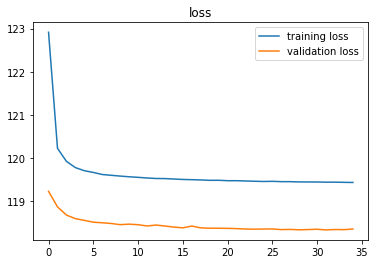

Plotting metrics...


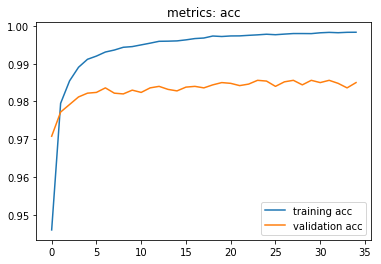

train {'acc': 0.9982}
test {'acc': 0.983}

Training student with temperature = 10 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 100 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 18261823060851311398
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 15543294595402215806
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 236.7681 , acc = 0.35 
Epoch 1 , step 100 , loss= 161.37161 , acc = 0.92 
Epoch 1 , step 200 , loss= 159.29092 , acc = 0.94 
Epoch 1 , step 300 , loss= 165.73306 , acc = 0.94 
Epoch 1 , step 400 , loss= 150.82661 , acc = 0.97 
Epoch 1 , step 500 , loss= 156.63184 , acc = 0.97 
Epoch 1 , step 549 , loss= 167.25394 val_loss= 158.90869 , acc = 0.96 val acc = 0.974 
Epoch 1 finished, loss= 163.80162 val loss= 158.90869 ,  acc = 0.9439637 val acc = 0.974
val_acc improved. 
E

Epoch 17 , step 500 , loss= 157.1318 , acc = 0.97 
Epoch 17 , step 549 , loss= 159.23036 val_loss= 157.79716 , acc = 1.0 val acc = 0.9842 
Epoch 17 finished, loss= 159.3133 val loss= 157.79716 ,  acc = 0.99287266 val acc = 0.9842

Epoch 18 , step 50 , loss= 155.34239 , acc = 0.98 
Epoch 18 , step 150 , loss= 153.21675 , acc = 0.97 
Epoch 18 , step 250 , loss= 163.64476 , acc = 1.0 
Epoch 18 , step 350 , loss= 153.63693 , acc = 0.99 
Epoch 18 , step 450 , loss= 154.08388 , acc = 1.0 
Epoch 18 , step 549 , loss= 153.06407 val_loss= 157.82709 , acc = 1.0 val acc = 0.9838 
Epoch 18 finished, loss= 159.30208 val loss= 157.82709 ,  acc = 0.99316365 val acc = 0.9838

Epoch 19 , step 0 , loss= 166.12569 , acc = 0.99 
Epoch 19 , step 100 , loss= 156.47475 , acc = 1.0 
Epoch 19 , step 200 , loss= 163.0634 , acc = 1.0 
Epoch 19 , step 300 , loss= 152.17247 , acc = 1.0 
Epoch 19 , step 400 , loss= 166.11168 , acc = 0.99 
Epoch 19 , step 500 , loss= 161.53064 , acc = 1.0 
Epoch 19 , step 549 , loss

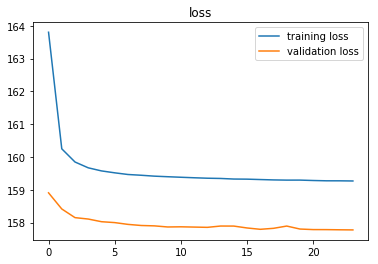

Plotting metrics...


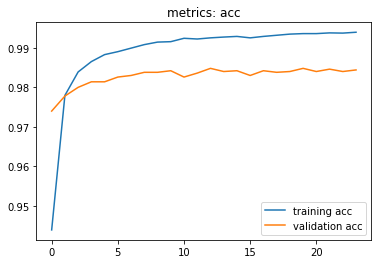

train {'acc': 0.99363637}
test {'acc': 0.9811}

Training student with temperature = 15 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 225 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2262830682699742279
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 3018606895075044796
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 6.2089643 , acc = 0.26 
Epoch 1 , step 100 , loss= 0.28062728 , acc = 0.96 
Epoch 1 , step 200 , loss= 0.2843279 , acc = 0.93 
Epoch 1 , step 300 , loss= 0.12746815 , acc = 0.98 
Epoch 1 , step 400 , loss= 0.1496255 , acc = 0.95 
Epoch 1 , step 500 , loss= 0.040599465 , acc = 1.0 
Epoch 1 , step 549 , loss= 0.053454865 val_loss= 0.111703455 , acc = 1.0 val acc = 0.9668 
Epoch 1 finished, loss= 0.25114286 val loss= 0.111703455 ,  acc = 0.94634545 val acc = 0.9668
val_

Epoch 17 , step 100 , loss= 0.010052063 , acc = 1.0 
Epoch 17 , step 200 , loss= 0.0009831042 , acc = 1.0 
Epoch 17 , step 300 , loss= 0.00016830032 , acc = 1.0 
Epoch 17 , step 400 , loss= 0.013809712 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.0007379818 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.0063814027 val_loss= 0.11738818 , acc = 1.0 val acc = 0.98 
Epoch 17 finished, loss= 0.007510456 val loss= 0.11738818 ,  acc = 0.9998544 val acc = 0.98

Epoch 18 , step 50 , loss= 1.3366308e-05 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.02951633 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.00019391239 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.06851279 , acc = 0.99 
Epoch 18 , step 450 , loss= 0.016737893 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.009798374 val_loss= 0.107472435 , acc = 1.0 val acc = 0.9798 
Epoch 18 finished, loss= 0.01718602 val loss= 0.107472435 ,  acc = 0.99949086 val acc = 0.9798

Epoch 19 , step 0 , loss= 0.00015858612 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.0004632847

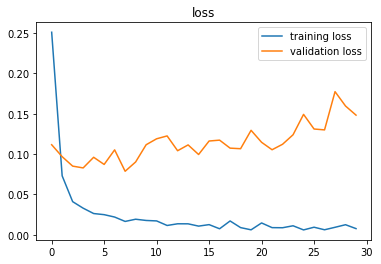

Plotting metrics...


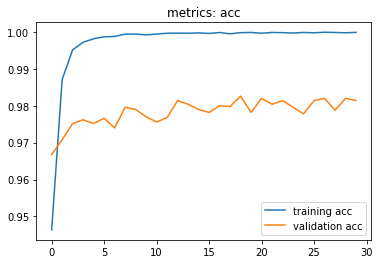

train {'acc': 0.99881816}
test {'acc': 0.9813}

Training student with temperature = 15 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 225 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12580452864679402062
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 2499085585315772438
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 135.68419 , acc = 0.4 
Epoch 1 , step 100 , loss= 106.83929 , acc = 0.96 
Epoch 1 , step 200 , loss= 113.08801 , acc = 0.98 
Epoch 1 , step 300 , loss= 109.47429 , acc = 0.99 
Epoch 1 , step 400 , loss= 110.45844 , acc = 0.97 
Epoch 1 , step 500 , loss= 105.40693 , acc = 0.99 
Epoch 1 , step 549 , loss= 108.20375 val_loss= 109.13795 , acc = 0.99 val acc = 0.9746 
Epoch 1 finished, loss= 110.79104 val loss= 109.13795 ,  acc = 0.9492182 val acc = 0.9746
val_acc impr

Epoch 17 , step 549 , loss= 109.76981 val_loss= 108.739075 , acc = 1.0 val acc = 0.9852 
Epoch 17 finished, loss= 109.11239 val loss= 108.739075 ,  acc = 0.9999818 val acc = 0.9852

Epoch 18 , step 50 , loss= 108.8261 , acc = 1.0 
Epoch 18 , step 150 , loss= 109.76472 , acc = 1.0 
Epoch 18 , step 250 , loss= 106.90174 , acc = 1.0 
Epoch 18 , step 350 , loss= 108.066284 , acc = 1.0 
Epoch 18 , step 450 , loss= 110.7454 , acc = 1.0 
Epoch 18 , step 549 , loss= 109.91343 val_loss= 108.72884 , acc = 1.0 val acc = 0.9858 
Epoch 18 finished, loss= 109.11086 val loss= 108.72884 ,  acc = 1.0 val acc = 0.9858

Epoch 19 , step 0 , loss= 105.97704 , acc = 1.0 
Epoch 19 , step 100 , loss= 108.96315 , acc = 1.0 
Epoch 19 , step 200 , loss= 108.89891 , acc = 1.0 
Epoch 19 , step 300 , loss= 111.77285 , acc = 1.0 
Epoch 19 , step 400 , loss= 110.23254 , acc = 1.0 
Epoch 19 , step 500 , loss= 110.39313 , acc = 1.0 
Epoch 19 , step 549 , loss= 112.02441 val_loss= 108.73544 , acc = 1.0 val acc = 0.985 


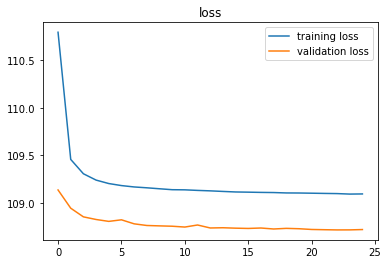

Plotting metrics...


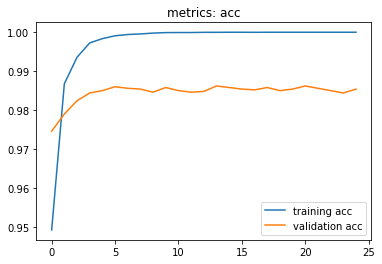

train {'acc': 0.9999818}
test {'acc': 0.9843}

Training student with temperature = 15 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 225 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7827264365417116125
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 16108533429903990721
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 263.4828 , acc = 0.53 
Epoch 1 , step 100 , loss= 226.62299 , acc = 0.93 
Epoch 1 , step 200 , loss= 222.03793 , acc = 0.95 
Epoch 1 , step 300 , loss= 218.67036 , acc = 0.97 
Epoch 1 , step 400 , loss= 217.39543 , acc = 0.97 
Epoch 1 , step 500 , loss= 220.3382 , acc = 0.96 
Epoch 1 , step 549 , loss= 221.69269 val_loss= 218.10907 , acc = 0.95 val acc = 0.9744 
Epoch 1 finished, loss= 221.08386 val loss= 218.10907 ,  acc = 0.9468182 val acc = 0.9744
val_acc improved

Epoch 17 , step 500 , loss= 220.1036 , acc = 1.0 
Epoch 17 , step 549 , loss= 220.87357 val_loss= 217.4027 , acc = 1.0 val acc = 0.9876 
Epoch 17 finished, loss= 218.21823 val loss= 217.4027 ,  acc = 0.9992 val acc = 0.9876
val_acc improved. 
Epoch 18 , step 50 , loss= 211.76877 , acc = 1.0 
Epoch 18 , step 150 , loss= 218.24998 , acc = 1.0 
Epoch 18 , step 250 , loss= 220.36578 , acc = 1.0 
Epoch 18 , step 350 , loss= 225.37428 , acc = 1.0 
Epoch 18 , step 450 , loss= 219.27913 , acc = 1.0 
Epoch 18 , step 549 , loss= 218.61998 val_loss= 217.38683 , acc = 1.0 val acc = 0.986 
Epoch 18 finished, loss= 218.21124 val loss= 217.38683 ,  acc = 0.9994364 val acc = 0.986

Epoch 19 , step 0 , loss= 218.51904 , acc = 1.0 
Epoch 19 , step 100 , loss= 214.5536 , acc = 1.0 
Epoch 19 , step 200 , loss= 222.95526 , acc = 0.99 
Epoch 19 , step 300 , loss= 217.65411 , acc = 1.0 
Epoch 19 , step 400 , loss= 222.89294 , acc = 0.99 
Epoch 19 , step 500 , loss= 218.10495 , acc = 1.0 
Epoch 19 , step 549 

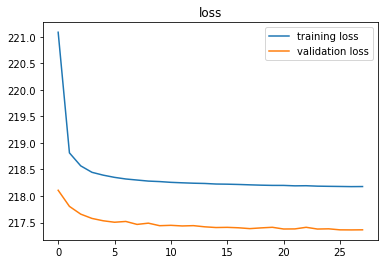

Plotting metrics...


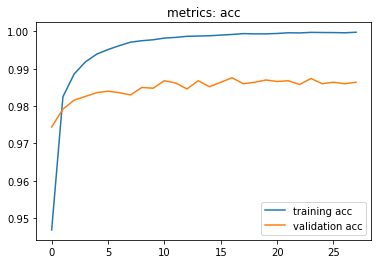

train {'acc': 0.99970907}
test {'acc': 0.9838}

Training student with temperature = 15 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 225 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1453655864385763174
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 9908625699249958821
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 393.63785 , acc = 0.41 
Epoch 1 , step 100 , loss= 327.65225 , acc = 0.96 
Epoch 1 , step 200 , loss= 338.42462 , acc = 0.89 
Epoch 1 , step 300 , loss= 322.49728 , acc = 0.97 
Epoch 1 , step 400 , loss= 325.91943 , acc = 0.99 
Epoch 1 , step 500 , loss= 321.5728 , acc = 0.98 
Epoch 1 , step 549 , loss= 320.29535 val_loss= 327.0703 , acc = 1.0 val acc = 0.9716 
Epoch 1 finished, loss= 331.54214 val loss= 327.0703 ,  acc = 0.9433636 val acc = 0.9716
val_acc improved

Epoch 17 , step 549 , loss= 315.42126 val_loss= 326.09628 , acc = 0.99 val acc = 0.985 
Epoch 17 finished, loss= 327.31537 val loss= 326.09628 ,  acc = 0.9966181 val acc = 0.985
val_acc improved. 
Epoch 18 , step 50 , loss= 319.1995 , acc = 1.0 
Epoch 18 , step 150 , loss= 327.38242 , acc = 0.99 
Epoch 18 , step 250 , loss= 331.9123 , acc = 0.99 
Epoch 18 , step 350 , loss= 327.43814 , acc = 1.0 
Epoch 18 , step 450 , loss= 341.94598 , acc = 0.99 
Epoch 18 , step 549 , loss= 323.97818 val_loss= 326.06418 , acc = 0.99 val acc = 0.9848 
Epoch 18 finished, loss= 327.30664 val loss= 326.06418 ,  acc = 0.99678177 val acc = 0.9848

Epoch 19 , step 0 , loss= 330.71204 , acc = 0.99 
Epoch 19 , step 100 , loss= 331.1428 , acc = 0.98 
Epoch 19 , step 200 , loss= 323.09604 , acc = 0.99 
Epoch 19 , step 300 , loss= 326.57974 , acc = 1.0 
Epoch 19 , step 400 , loss= 328.6301 , acc = 0.99 
Epoch 19 , step 500 , loss= 333.08392 , acc = 1.0 
Epoch 19 , step 549 , loss= 327.16278 val_loss= 326.08487 , 

Epoch 35 , step 500 , loss= 320.73648 , acc = 1.0 
Epoch 35 , step 549 , loss= 322.43137 val_loss= 326.0112 , acc = 1.0 val acc = 0.985 
Epoch 35 finished, loss= 327.24597 val loss= 326.0112 ,  acc = 0.99854547 val acc = 0.985

Epoch 36 , step 50 , loss= 333.8261 , acc = 1.0 
Epoch 36 , step 150 , loss= 324.37985 , acc = 1.0 
Epoch 36 , step 250 , loss= 330.59607 , acc = 1.0 
Epoch 36 , step 350 , loss= 325.31046 , acc = 1.0 
Epoch 36 , step 450 , loss= 324.5727 , acc = 1.0 
Epoch 36 , step 549 , loss= 326.67203 val_loss= 326.01685 , acc = 1.0 val acc = 0.985 
Epoch 36 finished, loss= 327.23825 val loss= 326.01685 ,  acc = 0.998491 val acc = 0.985

Epoch 37 , step 0 , loss= 327.12793 , acc = 1.0 
Epoch 37 , step 100 , loss= 338.97882 , acc = 1.0 
Epoch 37 , step 200 , loss= 324.12518 , acc = 1.0 
Epoch 37 , step 300 , loss= 325.20935 , acc = 1.0 
Epoch 37 , step 400 , loss= 324.06042 , acc = 1.0 
Epoch 37 , step 500 , loss= 319.0467 , acc = 0.99 
Epoch 37 , step 549 , loss= 315.5558 va

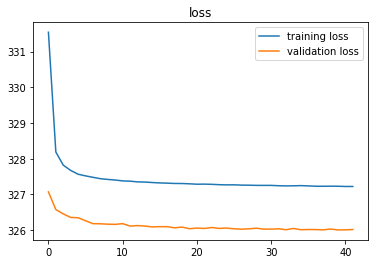

Plotting metrics...


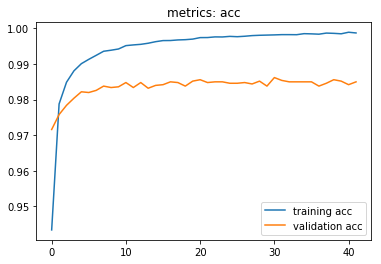

train {'acc': 0.9984364}
test {'acc': 0.9827}

Training student with temperature = 15 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 225 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15215754541406776683
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 1691718114085683452
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 518.347 , acc = 0.34 
Epoch 1 , step 100 , loss= 451.1179 , acc = 0.91 
Epoch 1 , step 200 , loss= 416.6415 , acc = 0.99 
Epoch 1 , step 300 , loss= 436.64465 , acc = 0.94 
Epoch 1 , step 400 , loss= 425.62775 , acc = 0.97 
Epoch 1 , step 500 , loss= 437.38242 , acc = 0.99 
Epoch 1 , step 549 , loss= 442.62418 val_loss= 436.1217 , acc = 0.97 val acc = 0.9728 
Epoch 1 finished, loss= 441.77225 val loss= 436.1217 ,  acc = 0.940091 val acc = 0.9728
val_acc improved. 
Ep

Epoch 17 , step 549 , loss= 440.96408 val_loss= 434.7579 , acc = 1.0 val acc = 0.9842 
Epoch 17 finished, loss= 436.41135 val loss= 434.7579 ,  acc = 0.99279994 val acc = 0.9842

Epoch 18 , step 50 , loss= 438.15906 , acc = 0.98 
Epoch 18 , step 150 , loss= 430.63177 , acc = 0.99 
Epoch 18 , step 250 , loss= 417.59558 , acc = 1.0 
Epoch 18 , step 350 , loss= 423.232 , acc = 1.0 
Epoch 18 , step 450 , loss= 440.58887 , acc = 0.99 
Epoch 18 , step 549 , loss= 433.2875 val_loss= 434.74304 , acc = 0.99 val acc = 0.9834 
Epoch 18 finished, loss= 436.40778 val loss= 434.74304 ,  acc = 0.99292725 val acc = 0.9834

Epoch 19 , step 0 , loss= 439.96912 , acc = 1.0 
Epoch 19 , step 100 , loss= 431.53134 , acc = 0.99 
Epoch 19 , step 200 , loss= 444.2001 , acc = 1.0 
Epoch 19 , step 300 , loss= 440.69684 , acc = 1.0 
Epoch 19 , step 400 , loss= 439.42334 , acc = 1.0 
Epoch 19 , step 500 , loss= 441.16342 , acc = 1.0 
Epoch 19 , step 549 , loss= 432.52182 val_loss= 434.73416 , acc = 0.98 val acc = 

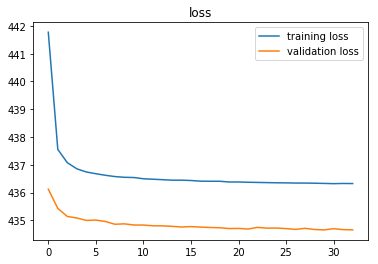

Plotting metrics...


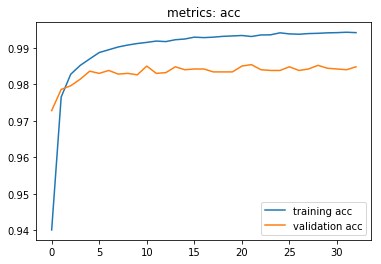

train {'acc': 0.9942182}
test {'acc': 0.982}

Training student with temperature = 20 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 400 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7541524988581326723
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 6073602529514517197
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 5.306759 , acc = 0.26 
Epoch 1 , step 100 , loss= 0.29350758 , acc = 0.93 
Epoch 1 , step 200 , loss= 0.11505235 , acc = 0.97 
Epoch 1 , step 300 , loss= 0.24134527 , acc = 0.96 
Epoch 1 , step 400 , loss= 0.080818586 , acc = 0.99 
Epoch 1 , step 500 , loss= 0.10988778 , acc = 0.98 
Epoch 1 , step 549 , loss= 0.06587305 val_loss= 0.11447959 , acc = 0.99 val acc = 0.9684 
Epoch 1 finished, loss= 0.24733947 val loss= 0.11447959 ,  acc = 0.9467636 val acc = 0.9684
val_acc

Epoch 17 , step 100 , loss= 0.0010683626 , acc = 1.0 
Epoch 17 , step 200 , loss= 0.007022788 , acc = 1.0 
Epoch 17 , step 300 , loss= 0.003953881 , acc = 1.0 
Epoch 17 , step 400 , loss= 0.079183176 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.01735513 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.0007223617 val_loss= 0.100980535 , acc = 1.0 val acc = 0.9822 
Epoch 17 finished, loss= 0.011561025 val loss= 0.100980535 ,  acc = 0.99967265 val acc = 0.9822
val_acc improved. 
Epoch 18 , step 50 , loss= 0.0032019494 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.0013801026 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.0020732945 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.017185196 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.018020341 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.0020895188 val_loss= 0.13045363 , acc = 1.0 val acc = 0.9804 
Epoch 18 finished, loss= 0.01099798 val loss= 0.13045363 ,  acc = 0.99965453 val acc = 0.9804

Epoch 19 , step 0 , loss= 0.0010941447 , acc = 1.0 
Epoch 19 , step 100 ,

Epoch 34 , step 50 , loss= 0.00077610544 , acc = 1.0 
Epoch 34 , step 150 , loss= 0.0016990644 , acc = 1.0 
Epoch 34 , step 250 , loss= 0.00023719181 , acc = 1.0 
Epoch 34 , step 350 , loss= 0.00011557274 , acc = 1.0 
Epoch 34 , step 450 , loss= 0.0001756623 , acc = 1.0 
Epoch 34 , step 549 , loss= 9.0637266e-05 val_loss= 0.13864774 , acc = 1.0 val acc = 0.9822 
Epoch 34 finished, loss= 0.009386666 val loss= 0.13864774 ,  acc = 0.99978185 val acc = 0.9822

Epoch 35 , step 0 , loss= 0.014043761 , acc = 1.0 
Epoch 35 , step 100 , loss= 8.461125e-06 , acc = 1.0 
Epoch 35 , step 200 , loss= 0.00011477219 , acc = 1.0 
Epoch 35 , step 300 , loss= 8.395899e-06 , acc = 1.0 
Epoch 35 , step 400 , loss= 2.1826274e-06 , acc = 1.0 
Epoch 35 , step 500 , loss= 1.650982e-06 , acc = 1.0 
Epoch 35 , step 549 , loss= 0.0056437673 val_loss= 0.1426471 , acc = 1.0 val acc = 0.98 
Epoch 35 finished, loss= 0.0023158072 val loss= 0.1426471 ,  acc = 0.9999454 val acc = 0.98

Epoch 36 , step 50 , loss= 4.01729

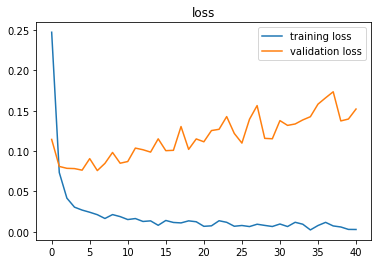

Plotting metrics...


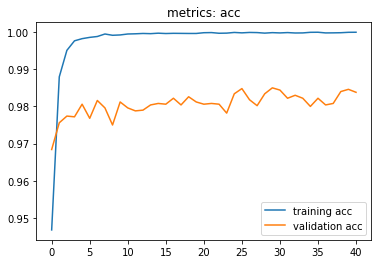

train {'acc': 0.9991818}
test {'acc': 0.9848}

Training student with temperature = 20 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 400 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13911647618971582376
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 8309090851916000158
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 233.94485 , acc = 0.46 
Epoch 1 , step 100 , loss= 210.77791 , acc = 0.95 
Epoch 1 , step 200 , loss= 212.60295 , acc = 0.94 
Epoch 1 , step 300 , loss= 209.15591 , acc = 0.99 
Epoch 1 , step 400 , loss= 208.73117 , acc = 0.96 
Epoch 1 , step 500 , loss= 214.03969 , acc = 0.97 
Epoch 1 , step 549 , loss= 210.9921 val_loss= 209.38362 , acc = 1.0 val acc = 0.9744 
Epoch 1 finished, loss= 211.011 val loss= 209.38362 ,  acc = 0.9538909 val acc = 0.9744
val_acc improved

Epoch 17 , step 549 , loss= 210.99443 val_loss= 208.98698 , acc = 1.0 val acc = 0.9846 
Epoch 17 finished, loss= 209.35825 val loss= 208.98698 ,  acc = 1.0 val acc = 0.9846

Epoch 18 , step 50 , loss= 207.30196 , acc = 1.0 
Epoch 18 , step 150 , loss= 208.0813 , acc = 1.0 
Epoch 18 , step 250 , loss= 213.15392 , acc = 1.0 
Epoch 18 , step 350 , loss= 205.7378 , acc = 1.0 
Epoch 18 , step 450 , loss= 207.80927 , acc = 1.0 
Epoch 18 , step 549 , loss= 209.59508 val_loss= 208.97617 , acc = 1.0 val acc = 0.9852 
Epoch 18 finished, loss= 209.35477 val loss= 208.97617 ,  acc = 1.0 val acc = 0.9852

Epoch 19 , step 0 , loss= 204.50198 , acc = 1.0 
Epoch 19 , step 100 , loss= 210.86758 , acc = 1.0 
Epoch 19 , step 200 , loss= 210.15947 , acc = 1.0 
Epoch 19 , step 300 , loss= 213.21758 , acc = 1.0 
Epoch 19 , step 400 , loss= 208.3124 , acc = 1.0 
Epoch 19 , step 500 , loss= 204.71373 , acc = 1.0 
Epoch 19 , step 549 , loss= 213.74171 val_loss= 208.97604 , acc = 1.0 val acc = 0.9848 
Epoch 19 

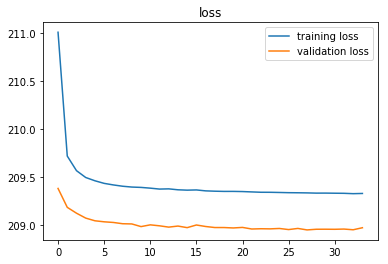

Plotting metrics...


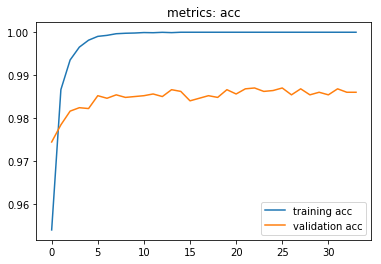

train {'acc': 0.9999091}
test {'acc': 0.9833}

Training student with temperature = 20 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 400 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1260585733027157286
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 401750166722747792
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 468.7441 , acc = 0.29 
Epoch 1 , step 100 , loss= 425.05203 , acc = 0.95 
Epoch 1 , step 200 , loss= 420.642 , acc = 0.92 
Epoch 1 , step 300 , loss= 425.02545 , acc = 0.96 
Epoch 1 , step 400 , loss= 415.7039 , acc = 0.98 
Epoch 1 , step 500 , loss= 419.5841 , acc = 0.91 
Epoch 1 , step 549 , loss= 419.20572 val_loss= 418.67297 , acc = 0.98 val acc = 0.9712 
Epoch 1 finished, loss= 421.83356 val loss= 418.67297 ,  acc = 0.9451092 val acc = 0.9712
val_acc improved. 
Ep

Epoch 17 , step 549 , loss= 418.8715 val_loss= 417.8916 , acc = 1.0 val acc = 0.9854 
Epoch 17 finished, loss= 418.70935 val loss= 417.8916 ,  acc = 0.9991818 val acc = 0.9854

Epoch 18 , step 50 , loss= 418.10815 , acc = 1.0 
Epoch 18 , step 150 , loss= 420.45584 , acc = 1.0 
Epoch 18 , step 250 , loss= 416.8489 , acc = 0.99 
Epoch 18 , step 350 , loss= 412.83548 , acc = 1.0 
Epoch 18 , step 450 , loss= 415.8271 , acc = 1.0 
Epoch 18 , step 549 , loss= 410.57547 val_loss= 417.9012 , acc = 1.0 val acc = 0.9854 
Epoch 18 finished, loss= 418.70377 val loss= 417.9012 ,  acc = 0.99916357 val acc = 0.9854

Epoch 19 , step 0 , loss= 424.00693 , acc = 1.0 
Epoch 19 , step 100 , loss= 417.79562 , acc = 1.0 
Epoch 19 , step 200 , loss= 428.52948 , acc = 0.99 
Epoch 19 , step 300 , loss= 418.1603 , acc = 1.0 
Epoch 19 , step 400 , loss= 422.42657 , acc = 1.0 
Epoch 19 , step 500 , loss= 411.8447 , acc = 1.0 
Epoch 19 , step 549 , loss= 424.55695 val_loss= 417.8886 , acc = 1.0 val acc = 0.9854 
E

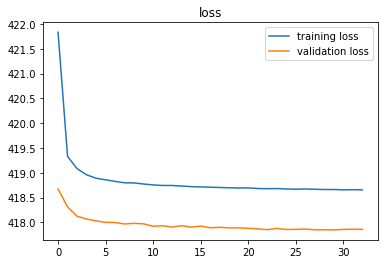

Plotting metrics...


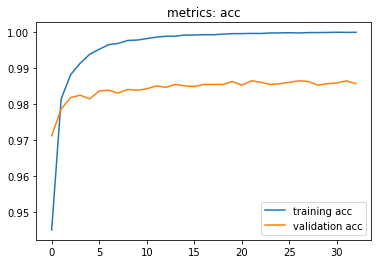

train {'acc': 0.9998182}
test {'acc': 0.9833}

Training student with temperature = 20 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 400 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16473787163748174488
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 12891948900373607405
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 692.60596 , acc = 0.51 
Epoch 1 , step 100 , loss= 643.89526 , acc = 0.89 
Epoch 1 , step 200 , loss= 634.1626 , acc = 0.94 
Epoch 1 , step 300 , loss= 630.59326 , acc = 0.96 
Epoch 1 , step 400 , loss= 633.32275 , acc = 0.98 
Epoch 1 , step 500 , loss= 614.0781 , acc = 0.99 
Epoch 1 , step 549 , loss= 639.44415 val_loss= 627.9272 , acc = 0.97 val acc = 0.9734 
Epoch 1 finished, loss= 632.3693 val loss= 627.9272 ,  acc = 0.9434364 val acc = 0.9734
val_acc improved

Epoch 18 , step 50 , loss= 635.5919 , acc = 1.0 
Epoch 18 , step 150 , loss= 621.91364 , acc = 1.0 
Epoch 18 , step 250 , loss= 620.3799 , acc = 1.0 
Epoch 18 , step 350 , loss= 633.62646 , acc = 1.0 
Epoch 18 , step 450 , loss= 627.54114 , acc = 1.0 
Epoch 18 , step 549 , loss= 628.8682 val_loss= 626.8082 , acc = 1.0 val acc = 0.984 
Epoch 18 finished, loss= 628.0459 val loss= 626.8082 ,  acc = 0.9968728 val acc = 0.984

Epoch 19 , step 0 , loss= 623.7377 , acc = 0.99 
Epoch 19 , step 100 , loss= 631.4313 , acc = 1.0 
Epoch 19 , step 200 , loss= 631.04156 , acc = 0.99 
Epoch 19 , step 300 , loss= 621.3223 , acc = 1.0 
Epoch 19 , step 400 , loss= 631.5201 , acc = 1.0 
Epoch 19 , step 500 , loss= 633.1997 , acc = 1.0 
Epoch 19 , step 549 , loss= 626.9961 val_loss= 626.81006 , acc = 1.0 val acc = 0.9846 
Epoch 19 finished, loss= 628.0325 val loss= 626.81006 ,  acc = 0.9970546 val acc = 0.9846

Epoch 20 , step 50 , loss= 634.3227 , acc = 1.0 
Epoch 20 , step 150 , loss= 628.06573 , acc = 

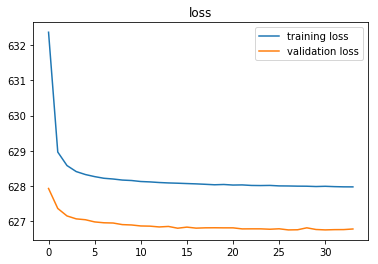

Plotting metrics...


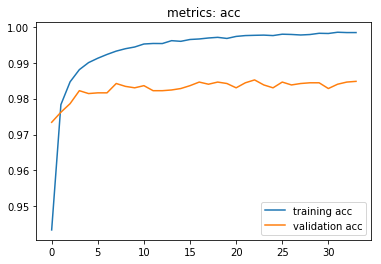

train {'acc': 0.9983636}
test {'acc': 0.9825}

Training student with temperature = 20 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 400 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5082833223088366397
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6629795431
locality {
  bus_id: 1
}
incarnation: 7390812034089048103
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 928.4176 , acc = 0.42 
Epoch 1 , step 100 , loss= 833.64154 , acc = 0.96 
Epoch 1 , step 200 , loss= 846.4479 , acc = 0.94 
Epoch 1 , step 300 , loss= 836.8098 , acc = 0.96 
Epoch 1 , step 400 , loss= 852.6355 , acc = 0.96 
Epoch 1 , step 500 , loss= 845.3015 , acc = 0.93 
Epoch 1 , step 549 , loss= 835.673 val_loss= 837.196 , acc = 0.96 val acc = 0.971 
Epoch 1 finished, loss= 843.0857 val loss= 837.196 ,  acc = 0.9375273 val acc = 0.971
val_acc improved. 
Epoch 2 , 

Epoch 18 , step 50 , loss= 829.79663 , acc = 0.98 
Epoch 18 , step 150 , loss= 838.8324 , acc = 1.0 
Epoch 18 , step 250 , loss= 835.4336 , acc = 1.0 
Epoch 18 , step 350 , loss= 830.8401 , acc = 1.0 
Epoch 18 , step 450 , loss= 826.21185 , acc = 1.0 
Epoch 18 , step 549 , loss= 850.3803 val_loss= 835.6983 , acc = 0.98 val acc = 0.983 
Epoch 18 finished, loss= 837.3943 val loss= 835.6983 ,  acc = 0.9926364 val acc = 0.983

Epoch 19 , step 0 , loss= 840.13855 , acc = 1.0 
Epoch 19 , step 100 , loss= 835.7085 , acc = 0.98 
Epoch 19 , step 200 , loss= 852.69543 , acc = 0.98 
Epoch 19 , step 300 , loss= 833.3462 , acc = 1.0 
Epoch 19 , step 400 , loss= 833.7165 , acc = 1.0 
Epoch 19 , step 500 , loss= 837.18384 , acc = 0.99 
Epoch 19 , step 549 , loss= 839.1609 val_loss= 835.69147 , acc = 0.99 val acc = 0.9836 
Epoch 19 finished, loss= 837.37866 val loss= 835.69147 ,  acc = 0.9929091 val acc = 0.9836

Epoch 20 , step 50 , loss= 837.26514 , acc = 0.99 
Epoch 20 , step 150 , loss= 844.0131 ,

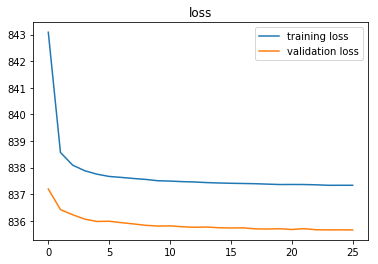

Plotting metrics...


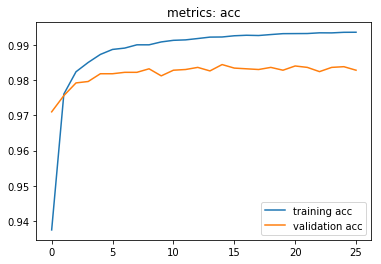

train {'acc': 0.99349093}
test {'acc': 0.9815}

{2: [{'acc': 0.9856}, {'acc': 0.9846}, {'acc': 0.9835}, {'acc': 0.9832}, {'acc': 0.9834}], 4: [{'acc': 0.982}, {'acc': 0.9842}, {'acc': 0.9836}, {'acc': 0.983}, {'acc': 0.9819}], 6: [{'acc': 0.9795}, {'acc': 0.983}, {'acc': 0.9828}, {'acc': 0.9814}, {'acc': 0.9826}], 8: [{'acc': 0.9796}, {'acc': 0.9834}, {'acc': 0.9824}, {'acc': 0.9821}, {'acc': 0.9826}], 10: [{'acc': 0.9826}, {'acc': 0.9845}, {'acc': 0.9838}, {'acc': 0.983}, {'acc': 0.9811}], 15: [{'acc': 0.9813}, {'acc': 0.9843}, {'acc': 0.9838}, {'acc': 0.9827}, {'acc': 0.982}], 20: [{'acc': 0.9848}, {'acc': 0.9833}, {'acc': 0.9833}, {'acc': 0.9825}, {'acc': 0.9815}]}


In [17]:
# df_exp = pd.DataFrame(columns = ['coef_softloss', 'temperature', 'temperature_effect', 'acc'])

list_exp2 = []
train_metrics = {}
test_metrics = {}
for temperature in temperatures:
    # initialize metrics
    train_metrics[temperature] = []
    test_metrics[temperature] = []
    # prepare softened data
    y_train_soft = teacher.predict_softened(X_train, temperature)
    y_val_soft = teacher.predict_softened(X_val, temperature)
    y_test_soft = teacher.predict_softened(X_test, temperature)
    
    tmp_effect = temperature**2 # [1/temperature**2, 1, temperature**2]
    for coef_softloss in coef_soft_losses:
        coef_hardloss = 1-coef_softloss
        
        print('Training student with temperature =',temperature,
              ', coef_softloss =',coef_softloss,', coef_hardloss =',coef_hardloss,
              ',tmp_effect =', tmp_effect,'. ')
        # build network architecture
#         student = build_small_model(input_dims, output_dims, session, is_student=True)
        student = build_small_model(input_dims, output_dims, is_student=True, gpu_id=gpu_id)
        # train network
        student.soft_train(
            X=X_train
            ,y=y_train
            ,y_soft=y_train_soft
            ,temperature=temperature
            ,coef_softloss= coef_softloss*tmp_effect# * temperature**2
            ,coef_hardloss= coef_hardloss
            ,val_set=[X_val,y_val,y_val_soft]
            ,batch_size=100
            ,n_epochs=100
            ,display_steps=100
            ,earlystop_params={'monitor':'val_acc', 'patience':10}
        )
        train_metric = student.get_metrics(X_train, y_train)
        test_metric = student.get_metrics(X_test, y_test)
        dict_exp = {'coef_softloss':coef_softloss, 'coef_hardloss':coef_hardloss, 
                    'temperature':temperature, 'temperature_effect':tmp_effect, 
                    'train_acc':train_metric['acc'], 'test_acc':test_metric['acc']}
        # show result
        print('Student performance with',dict_exp)
        student.plt_loss()
        student.plt_metrics()
        print('train',train_metric)
        print('test',test_metric)
        print()
        list_exp2.append(dict_exp)
        train_metrics[temperature].append(train_metric)
        test_metrics[temperature].append(test_metric)
#         gc.collect()
df_exp2 = pd.DataFrame(list_exp2)
print(test_metrics)

In [18]:
print(df_exp2)
print(df_exp2['test_acc'].mean())

    coef_hardloss  coef_softloss  temperature  temperature_effect  test_acc  \
0            1.00           0.00            2                   4    0.9856   
1            0.75           0.25            2                   4    0.9846   
2            0.50           0.50            2                   4    0.9835   
3            0.25           0.75            2                   4    0.9832   
4            0.00           1.00            2                   4    0.9834   
5            1.00           0.00            4                  16    0.9820   
6            0.75           0.25            4                  16    0.9842   
7            0.50           0.50            4                  16    0.9836   
8            0.25           0.75            4                  16    0.9830   
9            0.00           1.00            4                  16    0.9819   
10           1.00           0.00            6                  36    0.9795   
11           0.75           0.25            6       

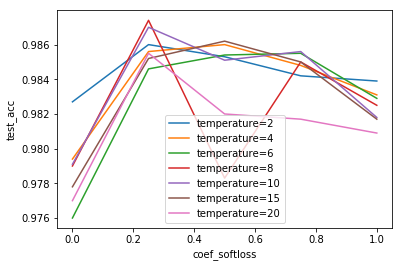

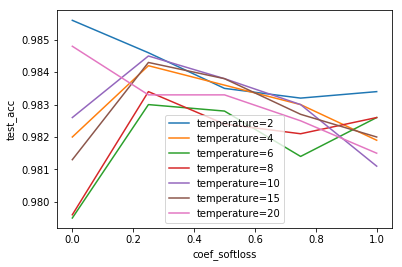

In [19]:
plot_trend(df_exp, label_x='coef_softloss', label_y='test_acc', label_line='temperature')
plot_trend(df_exp2, label_x='coef_softloss', label_y='test_acc', label_line='temperature')

In [20]:

# close_session(session)